Apple Stock Price Forecasting Using SARIMA & Prophet

Stock price prediction plays a crucial role in the financial world, aiding investors in making informed decisions. In recent years, various forecasting models have been developed to capture the complex dynamics of stock market data. Two prominent models widely used for time series forecasting are Seasonal ARIMA and Facebook's Prophet. In this study, we delve into a comprehensive analysis of these models, specifically focusing on predicting the stock prices of Apple Inc. (AAPL). We evaluate the performance of both models, compare their strengths and weaknesses, and provide actionable insights for investment decisions.

Our analysis begins by preparing the data, splitting it into training and test sets, and applying the respective models. For Seasonal ARIMA, we implement the model with optimized parameters, considering the seasonality and trend of the AAPL stock prices. We evaluate the model's accuracy and diagnose its performance through residual analysis, diagnostic plots, and statistical tests. Similarly, we employ Facebook's Prophet, a flexible and user-friendly forecasting tool, to capture the underlying trends and patterns in the data.

The results of our analysis reveal key insights about the two models. Seasonal ARIMA excels in capturing the seasonality and abrupt changes in the AAPL stock prices, providing robust predictions. On the other hand, Facebook's Prophet demonstrates simplicity and efficiency in implementation, making it accessible even to users with limited statistical knowledge. However, we observe that Prophet tends to be prone to overfitting, resulting in less accurate predictions, especially in capturing the seasonality of the data.

Importing and installing libraries


In [26]:
##Installing
%%capture
!pip install fbprophet
!pip install -U statsmodels
!pip install colorama

The provided code installs three Python packages: `fbprophet`, `statsmodels`, and `colorama`. These packages are used for various data analysis and forecasting tasks.

The `fbprophet` package is a time series forecasting library developed by Facebook. It is designed to handle time series data with multiple seasonality and provides an easy-to-use interface for building forecasting models.

The `statsmodels` package is a comprehensive statistical modeling library in Python. It offers a wide range of statistical models and tools for various types of data analysis, including regression, time series analysis, and hypothesis testing.

The `colorama` package is a Python library that simplifies the process of printing colored text on the command line. It provides cross-platform support for printing colored output and makes it easier to highlight important information or add visual cues to the text.

By installing these packages, the code ensures that the necessary dependencies are available for any subsequent analysis or forecasting tasks that may be performed.

In [41]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch

The provided code imports various Python packages that are commonly used for data analysis, visualization, statistical modeling, and forecasting tasks.

The `pandas` package is a powerful data manipulation and analysis library. It provides data structures and functions to efficiently handle and analyze structured data, such as tables or data frames.

The `numpy` package is a fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and a collection of mathematical functions to operate on these arrays.

The `matplotlib.pyplot` module is a plotting library in Python. It provides a flexible and comprehensive set of functions for creating static, animated, and interactive visualizations in Python.

The `seaborn` package is a data visualization library based on matplotlib. It provides a high-level interface for drawing informative and attractive statistical graphics.

The `statsmodels` package, as mentioned earlier, is a comprehensive statistical modeling library that includes a wide range of statistical models and tools.

The `scipy` package is a library for scientific computing and technical computing. It provides functions for mathematical and scientific operations, including statistical functions and optimization algorithms.

The `fbprophet` package, also mentioned earlier, is a time series forecasting library developed by Facebook.

The `IPython.display` module provides a set of functions to control the display of objects in the IPython environment. It is particularly useful for displaying visualizations or controlling the output format of certain objects.

The `os` module provides a way to interact with the operating system. It includes functions for file and directory operations, such as navigating directories, creating and deleting files, and executing system commands.

The `re` module is Python's regular expression module. It provides support for pattern matching and text manipulation using regular expressions.

The `colorama` package, mentioned earlier, is a library that simplifies printing colored text on the command line.

The `plotly.express` module is a high-level interface for creating interactive visualizations using the Plotly library.

The `warnings` module provides functions to control warnings in Python. It allows users to ignore or handle warning messages.

Finally, the `matplotlib.patches` module provides classes for creating various types of graphical patches, such as rectangles, circles, and polygons, which can be used for customizing plots.

By importing these packages, the code ensures that the necessary functions, classes, and tools are available for performing data analysis, visualization, and forecasting tasks in subsequent code sections.

In [70]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

The provided code modifies certain parameters of the Matplotlib library, which is used for creating plots and visualizations in Python.

The `matplotlib.ticker` module provides classes and functions for controlling the tick locators and formatters in Matplotlib plots. It allows for fine-grained control over the appearance and labeling of tick marks on axes.

The code sets three parameters of Matplotlib using the `rcParams` dictionary. The `'axes.labelsize'` parameter determines the font size of the axis labels in the plots. The `'xtick.labelsize'` parameter determines the font size of the tick labels on the x-axis, and the `'ytick.labelsize'` parameter determines the font size of the tick labels on the y-axis.

By modifying these parameters, the code ensures that the axis labels and tick labels in subsequent plots created with Matplotlib will have a specific font size.

The `plt.style.context('fivethirtyeight')` line sets the style of the plot to the "fivethirtyeight" style. Matplotlib provides a variety of predefined styles that can be used to change the appearance of plots, and the "fivethirtyeight" style emulates the style of the plots often seen on the website FiveThirtyEight, known for its data-driven journalism and visualizations.

By setting the style to "fivethirtyeight", the code ensures that the subsequent plots will have a consistent visual style that matches the aesthetics of the FiveThirtyEight website.

# Loading Data 
From CSV File(Source: Yahoo Finance)

In [5]:
data = pd.read_csv('GitHub Projects/Time Series /Orignal DataSet/AAPL.csv')

The provided code reads a CSV file named 'AAPL.csv' and stores its contents in a variable called `data`. 

The `pd.read_csv()` function is provided by the pandas library and is used to read data from a CSV (Comma-Separated Values) file. In this case, the file 'AAPL.csv' is being read.

The file path `'GitHub Projects/Time Series /Orignal DataSet/AAPL.csv'` specifies the location of the CSV file. It is important to note that the file path may vary depending on the specific directory structure and file location on the system.

After reading the file, the data is stored in a pandas DataFrame, which is a two-dimensional labeled data structure with columns of potentially different data types. The DataFrame allows for easy manipulation and analysis of the data.

By assigning the result of `pd.read_csv()` to the variable `data`, the code makes the CSV data accessible for further processing, analysis, and visualization tasks in subsequent code sections.

In [7]:
data.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100

The provided code calls the `head()` function on the `data` DataFrame, displaying the first few rows of the data.

The `head()` function is a method available in pandas DataFrames that returns a new DataFrame containing the first n rows of the original DataFrame, where n is typically set to 5 by default.

By calling `data.head()`, the code prints the first five rows of the `data` DataFrame to the output. Each row represents a data entry, and each column represents a different attribute or variable of the data.

Displaying the head of the DataFrame is a common practice in data analysis to get a quick overview of the dataset. It allows the user to examine the structure and format of the data, check for any missing values or anomalies, and gain initial insights into the dataset's contents.

Data Description:

The dataset contains information about trading activity for a security. It includes the following attributes:

Date: The date of the trading activity.
Open: The price at which the security first trades on that day.
High: The highest price reached during the trading day.
Low: The lowest price reached during the trading day.
Close: The last price at which the stock traded during the trading day.
Adj Close: The adjusted closing price, which takes into account corporate actions or events that may affect the closing price.
Volume: The number of shares that changed hands during the trading day, indicating the level of trading activity.

These attributes provide important information about the price movement and trading volume of the security over time. They allow for analysis of trends, volatility, and liquidity in the market. The dataset is useful for conducting various types of financial analysis and modeling, such as technical analysis, forecasting, and risk assessment.

In [ ]:
##Summary Statistics
data.describe()

Open         High  ...    Adj Close        Volume
count  2011.000000  2011.000000  ...  2011.000000  2.011000e+03
mean    126.707469   127.827594  ...   119.505548  5.949670e+07
std      50.483753    50.926301  ...    52.438444  4.683856e+07
min      55.424286    57.085712  ...    48.921928  1.136200e+07
25%      85.882858    86.717858  ...    75.056679  2.758565e+07
50%     113.050003   114.190002  ...   105.222908  4.346900e+07
75%     165.190002   167.409996  ...   160.047111  7.471030e+07
max     291.119995   293.970001  ...   289.522614  3.765300e+08

[8 rows x 6 columns]

The provided code calls the `describe()` function on the `data` DataFrame, which computes summary statistics for each numerical column in the dataset.

The `describe()` function is a method available in pandas DataFrames that generates descriptive statistics of the data, such as count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value.

By calling `data.describe()`, the code calculates and displays these summary statistics for each numerical column in the DataFrame. This provides a quick overview of the central tendency, dispersion, and shape of the distribution of the numeric variables in the dataset.

The count statistic shows the number of non-null values for each column, which indicates the completeness of the data. The mean represents the average value of each column, while the standard deviation measures the spread or variability of the data around the mean.

The minimum and maximum values provide the range of values observed in each column, and the quartiles (Q1, Q2, Q3) give insights into the distribution of the data. The median (Q2) represents the middle value of the sorted data, separating the lower half from the upper half.

These summary statistics help in understanding the distribution, variability, and overall characteristics of the data. They can be used to identify outliers, assess data quality, detect potential issues or anomalies, and make initial assessments or comparisons between different variables in the dataset.

In [ ]:
##Exploring Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


The provided code calls the `info()` function on the `data` DataFrame, which provides a concise summary of the dataset's information.

The `info()` function is a method available in pandas DataFrames that displays important details about the DataFrame, including the number of rows, the number of columns, the data types of the columns, and the amount of memory used by the DataFrame.

By calling `data.info()`, the code prints this summary information to the output. It provides an overview of the dataset's structure and allows for a quick assessment of the data's completeness and quality.

The summary includes the total number of rows in the DataFrame, which represents the number of observations or data points. It also displays the number of columns, which indicates the number of variables or attributes in the dataset.

The information about the data types of the columns is particularly useful as it reveals the nature of each variable. For example, it shows whether a column contains numeric data (integers or floats), textual data (strings), or datetime values.

Additionally, the memory usage information provides an estimation of the memory consumed by the DataFrame, which can be helpful in optimizing memory usage and improving computational efficiency for larger datasets.

Overall, the `info()` function gives a concise overview of the dataset's structure and is a valuable starting point for exploring and understanding the data before performing any analysis or manipulation tasks.

Data Preprocessing

In [8]:
##Converting Date to DateTime Object
data['Date']

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object

The provided code accesses the 'Date' column in the `data` DataFrame and performs a conversion operation.

In this code, 'Date' refers to a specific column in the DataFrame, which likely contains date values in a certain format. The purpose of this code is to convert the data in the 'Date' column to a DateTime object.

A DateTime object is a data type commonly used to represent dates and times in a structured and standardized format. It allows for easier manipulation, comparison, and analysis of date and time-related data.

By applying this code, the existing values in the 'Date' column are transformed from their current format to a DateTime object format. This conversion is useful for conducting various time-related operations, such as sorting the data chronologically, extracting specific time periods, or performing time-based calculations.

After the conversion, the 'Date' column will contain DateTime objects instead of the original format, enabling more efficient handling and analysis of the date values in subsequent code sections.

In [9]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

The provided code modifies the 'Date' column in the `data` DataFrame by converting its values from their current format to a standardized date format using the `pd.to_datetime()` function.

The `pd.to_datetime()` function is a method provided by the pandas library that is used to convert a given input into a DateTime format. In this case, the 'Date' column is passed as the input to this function.

The format parameter, `format='%Y-%m-%d'`, specifies the expected format of the original dates in the 'Date' column. The format '%Y-%m-%d' represents the year, month, and day in a specific order, separated by hyphens.

By applying this code, the code reassigns the 'Date' column with the converted DateTime objects. This conversion ensures that the 'Date' column values are uniformly represented as dates in the 'YYYY-MM-DD' format, regardless of the original format of the dates in the column.

Converting the 'Date' column to a standardized DateTime format allows for easier manipulation, sorting, and analysis of the date values. It enables various time-based operations, such as filtering data within specific date ranges, extracting specific components of the date (year, month, day), and performing time series analysis or forecasting tasks.

In [10]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

The provided code retrieves the data types of each column in the `data` DataFrame.

The `dtypes` attribute in pandas is used to access the data types of the columns in a DataFrame. By calling `data.dtypes`, the code returns a series that contains the data type of each column in the DataFrame.

The data types describe the nature of the values stored in each column. For example, a column may have a data type of 'int64' for integer values, 'float64' for floating-point numbers, 'object' for strings or mixed data types, or 'datetime64' for date and time values.

Retrieving the data types of the columns is useful for understanding the structure and content of the dataset. It provides information about the types of variables or attributes in the dataset and allows for appropriate data handling and analysis.

Knowing the data types is essential for performing specific operations or calculations on the data, as different data types have different behaviors and require specific handling. Additionally, it helps identify any inconsistencies or unexpected data types in the dataset that may require further investigation or data cleaning.

In [11]:
##Making Date as Index 
data.set_index('Date',inplace=True)

The provided code modifies the `data` DataFrame by setting the 'Date' column as the new index of the DataFrame.

The `set_index()` function in pandas is used to change the index of a DataFrame. In this case, the 'Date' column is specified as the new index for the DataFrame.

By applying this code, the DataFrame's index is updated, and the 'Date' column is no longer treated as a regular column of data. Instead, it becomes the index, which is a special label assigned to each row in the DataFrame.

Setting the 'Date' column as the index is often done when working with time series data, as it allows for efficient and convenient handling of date-based operations and analysis.

With the 'Date' column as the index, various time-based operations become easier, such as indexing and slicing the data based on specific dates or time periods, resampling the data at different frequencies, and performing time series modeling or forecasting.

The `inplace=True` parameter ensures that the modification is made directly on the `data` DataFrame itself, rather than creating a new DataFrame with the updated index.

By making the 'Date' column the index, the code organizes the data in a way that facilitates time-oriented analysis and allows for more straightforward manipulation and exploration of the time series dataset.

In [12]:
data['Date'] = data.index

The provided code assigns the index of the `data` DataFrame to a new column named 'Date'.

In this code, `data.index` refers to the index of the DataFrame, which is typically a sequence of labels or values that uniquely identify each row in the DataFrame.

By assigning `data.index` to `data['Date']`, the code creates a new column called 'Date' in the DataFrame and populates it with the values from the DataFrame's index.

The purpose of this code may vary depending on the specific use case, but a common reason for doing this is to convert the index, which might be in a specialized format like a DateTime object or an integer sequence, into a regular column of data that can be used for further analysis or visualization.

By adding the index values as a new column, the code makes it easier to access and manipulate the index values as regular data within the DataFrame. This can be particularly useful when performing specific calculations or transformations that require the index values to be treated as regular data.

In [13]:
data.head()

Open       High        Low  ...  Adj Close    Volume       Date
Date                                         ...                                
2012-01-03  58.485714  58.928570  58.428570  ...  50.765709  75555200 2012-01-03
2012-01-04  58.571430  59.240002  58.468571  ...  51.038536  65005500 2012-01-04
2012-01-05  59.278572  59.792858  58.952858  ...  51.605175  67817400 2012-01-05
2012-01-06  59.967144  60.392857  59.888573  ...  52.144630  79573200 2012-01-06
2012-01-09  60.785713  61.107143  60.192856  ...  52.061932  98506100 2012-01-09

[5 rows x 7 columns]

The provided code retrieves the first few rows of the `data` DataFrame and displays them.

The `head()` function is a method available in pandas DataFrames that returns a new DataFrame containing the first n rows of the original DataFrame, with n typically set to 5 by default.

By calling `data.head()`, the code prints the first five rows of the `data` DataFrame to the output. Each row represents a data entry, and each column represents a different attribute or variable of the data.

Displaying the head of the DataFrame is a common practice in data analysis to get a quick overview of the dataset. It allows the user to examine the structure and format of the data, check for any missing values or anomalies, and gain initial insights into the dataset's contents.

By displaying the first few rows of the DataFrame, the code provides a glimpse into the data's structure and helps in understanding the overall format and organization of the dataset.

In [14]:
##Checking Null Values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

The provided code checks for null values in each column of the `data` DataFrame and returns the sum of null values for each column.

The `isnull()` function is a method available in pandas DataFrames that checks whether each value in the DataFrame is null or missing. It returns a DataFrame of the same shape, where each cell contains either True or False depending on whether the corresponding value is null.

By calling `data.isnull()`, the code generates a DataFrame of the same shape as `data` but with boolean values indicating the presence of null values in each cell.

The `sum()` function is then applied to this DataFrame, which calculates the sum of True values (1) along each column. This effectively counts the number of null values in each column.

By calling `data.isnull().sum()`, the code returns a series that displays the total number of null values for each column in the DataFrame. Each column name is associated with its respective count of null values.

Checking for null values is an essential step in data analysis as missing data can impact the validity and reliability of the analysis. Identifying the presence and distribution of null values helps in making informed decisions on how to handle them, such as imputing missing values, excluding affected observations, or considering alternative analysis techniques.

The output of this code provides a quick overview of the presence and extent of missing values in each column, allowing for further data cleaning or preprocessing steps to ensure the accuracy and quality of the dataset.

In [ ]:
Visualising

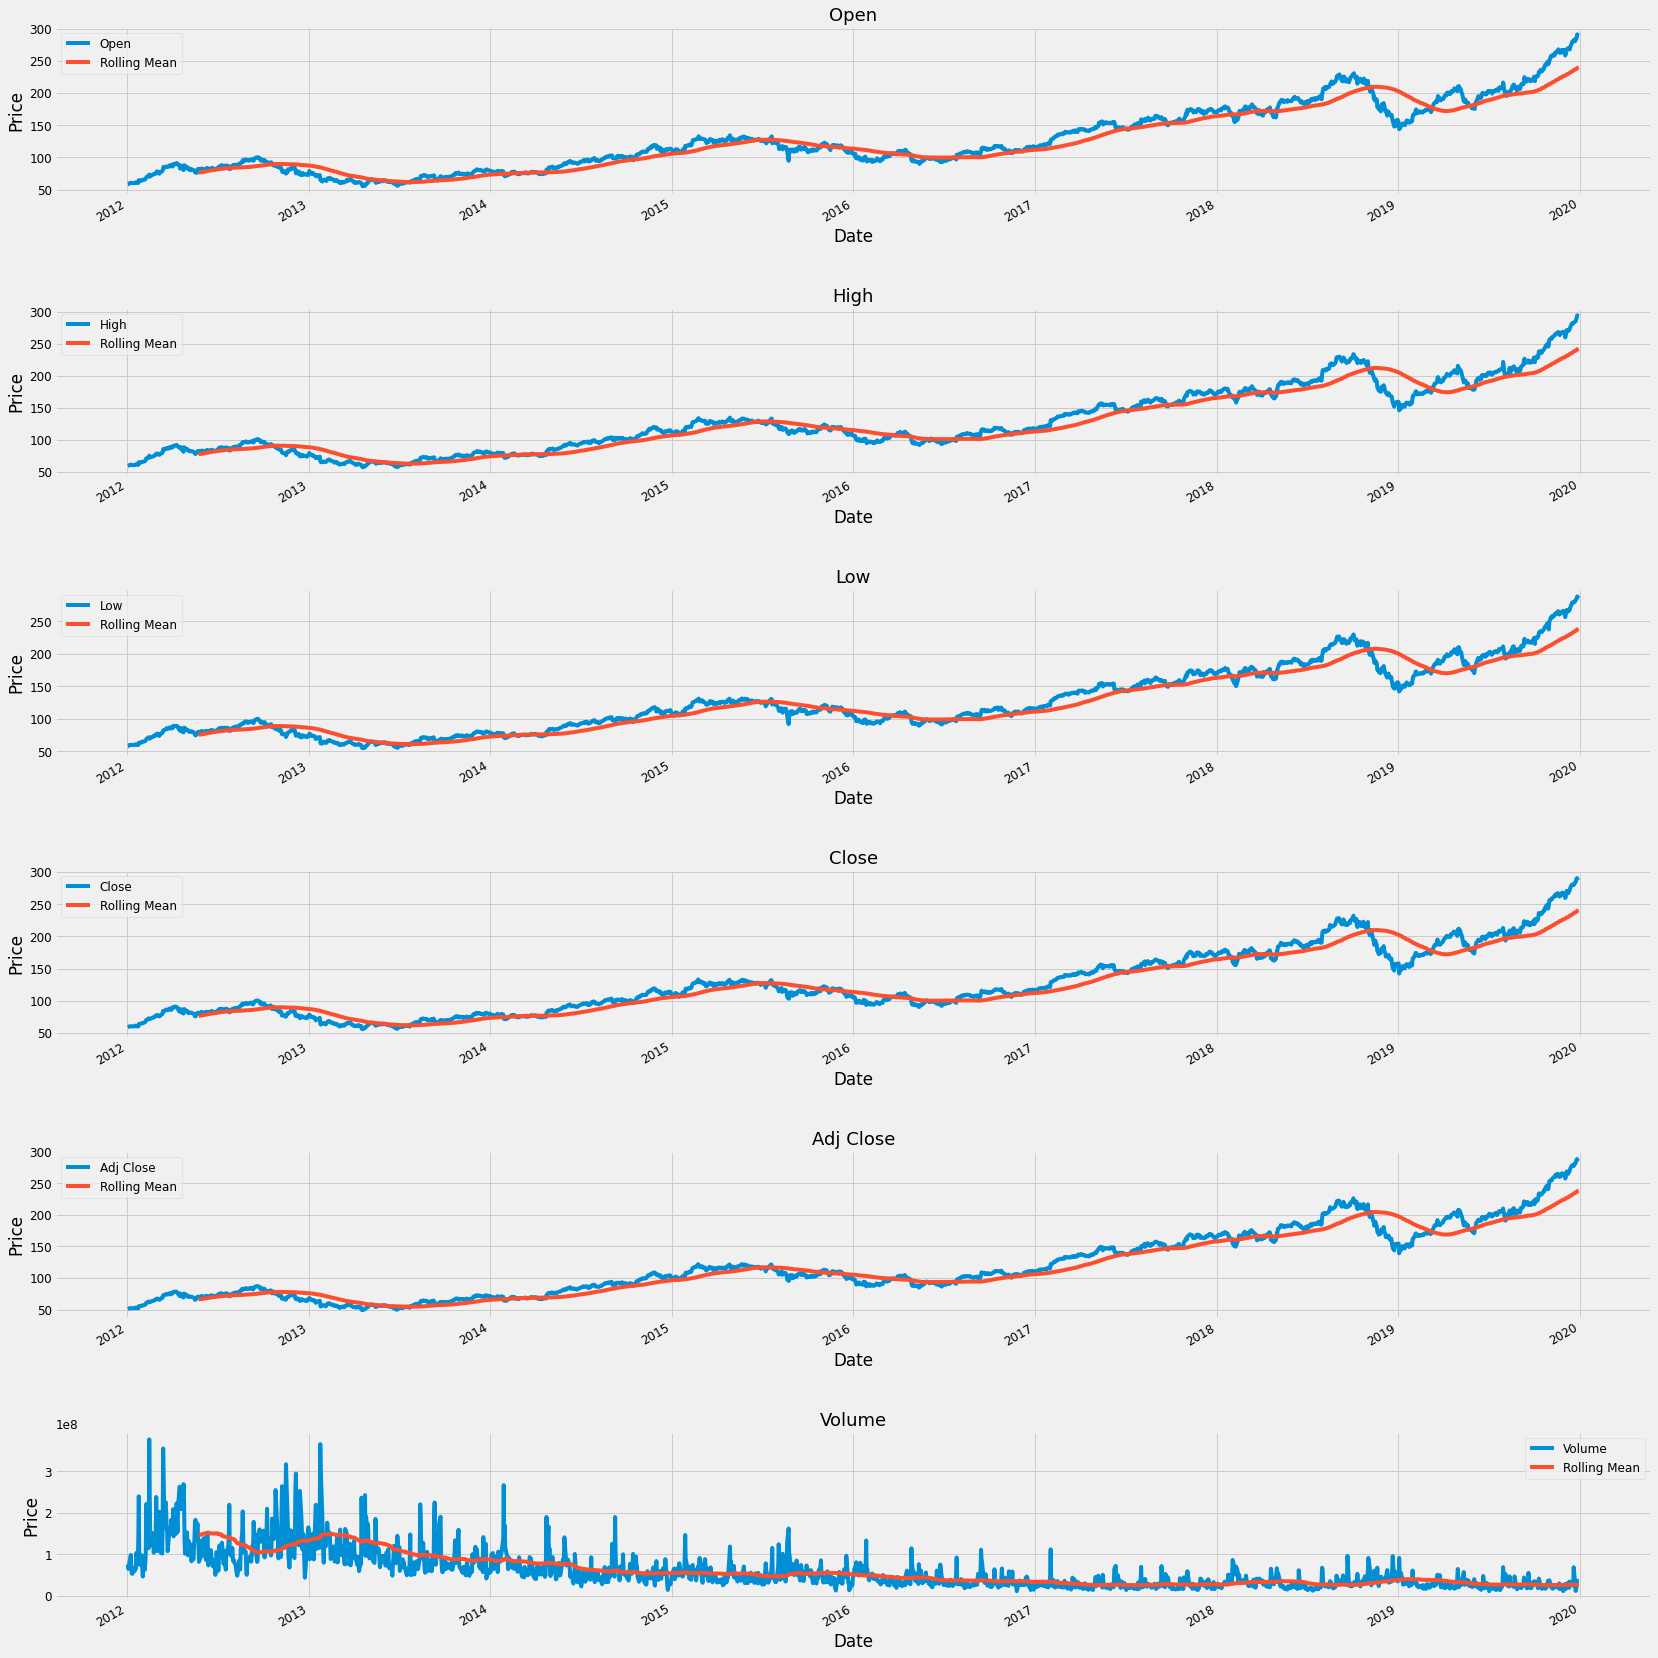

In [ ]:
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

The provided code generates a multi-line plot for the first six columns of the `data` DataFrame.

The `col_names = data.columns` line assigns the column names of the DataFrame to the `col_names` variable.

The `fig = plt.figure(figsize=(24, 24))` line creates a new figure object with a specific size of 24x24 inches, which will be used as the canvas for the plot.

A `for` loop is then used to iterate over the range from 0 to 5 (inclusive), corresponding to the first six columns of the DataFrame.

Within each iteration, the code creates a new subplot (`ax = fig.add_subplot(6, 1, i+1)`) within the figure, resulting in a vertical arrangement of six subplots.

For each subplot, the code plots the values of the corresponding column (`data.iloc[:, i]`) against the date. It also adds a rolling mean line plot for the same column using `data.iloc[:, i].rolling(100).mean()`.

The code sets the title of each subplot (`ax.set_title(col_names[i], fontsize=18)`) to the corresponding column name, and sets the labels for the x-axis and y-axis (`ax.set_xlabel('Date')` and `ax.set_ylabel('Price')`, respectively).

Styling and visual elements are applied to each subplot, including setting the edge color of the subplot to black (`ax.patch.set_edgecolor('black')`), applying the 'fivethirtyeight' style (`plt.style.context('fivethirtyeight')`), and adding a legend (`plt.legend(prop={'size': 12})`).

After the loop, the `fig.tight_layout(pad=3.0)` line adjusts the spacing between the subplots to avoid overlapping.

Finally, `plt.show()` is called to display the generated plot on the screen.

In summary, this code creates a multi-line plot with six subplots, each representing one of the first six columns of the `data` DataFrame. The plot provides a visual representation of the price data over time for each column and includes a rolling mean line plot for comparison.

Feature Selection.
We can eliminate features like Open,Low, High Close automatically as they are high multicollinear with Adj Close .

We consider Adj Close as our target variables as it accounts for all corporate decisions like stock split and dividents.

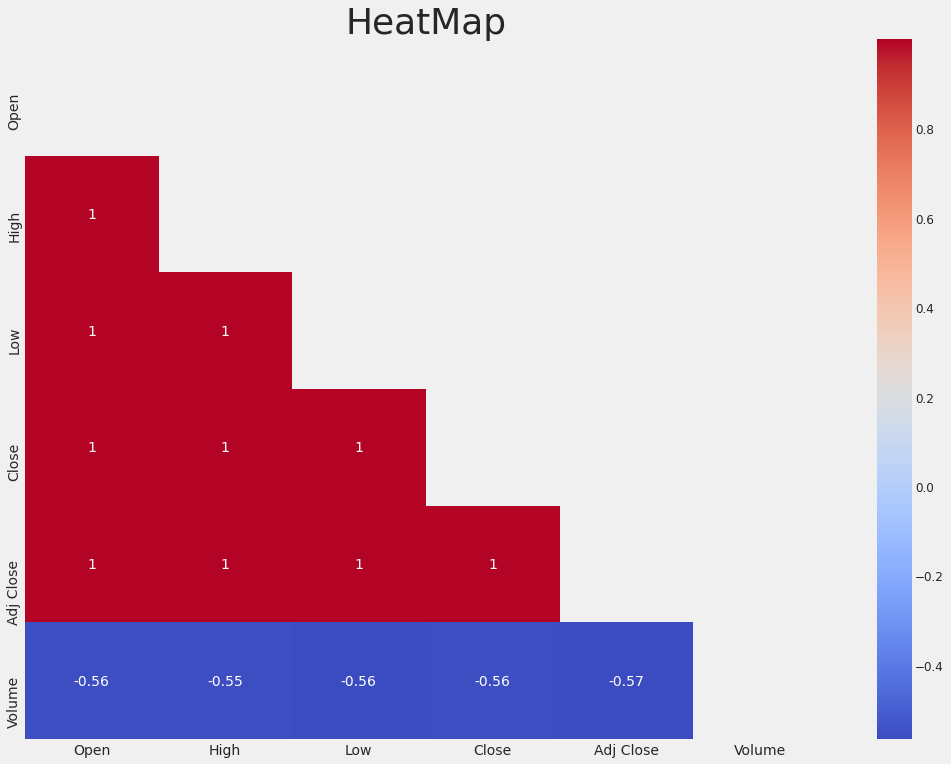

In [ ]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

The provided code generates a heatmap to visualize the correlation between features (columns) in the `data` DataFrame, with the purpose of checking for multicollinearity.

The `fig = plt.figure(figsize=(16,12))` line creates a new figure object with a specific size of 16x12 inches, which will be used as the canvas for the heatmap plot.

The `matrix = np.triu(data.corr())` line computes the upper triangular matrix of the correlation matrix of the DataFrame. This is done to mask the lower triangle of the heatmap plot and avoid redundant information since the correlation matrix is symmetric.

The `ax = sns.heatmap(data.corr(), annot=True, annot_kws={"size":14}, mask=matrix, cmap='coolwarm')` line generates the heatmap plot using the seaborn library (`sns`). It uses the `data.corr()` function to compute the correlation matrix of the DataFrame and visualizes it as a heatmap. The `annot=True` parameter adds numeric annotations to each cell of the heatmap, representing the correlation values. The `annot_kws={"size":14}` parameter sets the size of the annotation text. The `mask=matrix` parameter masks the lower triangle of the heatmap based on the computed matrix, and the `cmap='coolwarm'` parameter sets the color map for the heatmap.

The `ax.tick_params(labelsize=14)` line sets the tick label size on the heatmap.

The `sns.set(font_scale=3)` line increases the font size of the text elements in the plot, including the title and annotations.

The `ax.set_title('HeatMap')` line sets the title of the heatmap plot.

Styling elements are applied to the plot, such as the 'fivethirtyeight' style (`plt.style.use('fivethirtyeight')`).

Finally, `plt.show()` is called to display the generated heatmap plot on the screen.

In summary, this code generates a heatmap plot that visualizes the correlation between features in the `data` DataFrame. The plot helps in identifying and analyzing the relationships between variables and assessing the presence of multicollinearity, which occurs when two or more features are highly correlated. The heatmap provides a color-coded representation of the correlation values, with higher values indicated by warmer colors and lower values indicated by cooler colors. The annotations within the cells of the heatmap display the actual correlation values, aiding in quantitative analysis.

In [15]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])


The provided code creates a new DataFrame named `data_feature_selected` by removing certain columns from the original `data` DataFrame.

The `drop()` function is a method available in pandas DataFrames that allows for removing specified columns or rows from the DataFrame. In this case, the `axis=1` parameter indicates that columns are being dropped, and the `labels=['Open','High','Low','Close','Volume']` parameter specifies the names of the columns to be dropped.

By calling `data.drop(axis=1, labels=['Open', 'High', 'Low', 'Close', 'Volume'])`, the code creates a new DataFrame called `data_feature_selected`, which is essentially a modified version of the original `data` DataFrame with the specified columns removed.

The columns being dropped in this code are likely the 'Open', 'High', 'Low', 'Close', and 'Volume' columns, which represent different attributes or variables related to trading data.

Removing these columns is referred to as feature selection, which involves selecting a subset of the available features or variables in the dataset to focus on. This can be done for various reasons, such as reducing dimensionality, removing irrelevant or redundant features, or simplifying the dataset for a specific analysis or modeling task.

By creating the `data_feature_selected` DataFrame, the code allows for further analysis, modeling, or visualization using the reduced set of selected features, providing a more focused and streamlined view of the data.

In [16]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

Date   Adj Close
Date                             
2012-01-03 2012-01-03   50.765709
2012-01-04 2012-01-04   51.038536
2012-01-05 2012-01-05   51.605175
2012-01-06 2012-01-06   52.144630
2012-01-09 2012-01-09   52.061932
...               ...         ...
2019-12-23 2019-12-23  282.054138
2019-12-24 2019-12-24  282.322266
2019-12-26 2019-12-26  287.923645
2019-12-27 2019-12-27  287.814392
2019-12-30 2019-12-30  289.522614

[2011 rows x 2 columns]

The provided code reorders the columns in the `data_feature_selected` DataFrame, placing the 'Date' and 'Adj Close' columns in a specific order.

The `col_order = ['Date', 'Adj Close']` line defines a list called `col_order` that specifies the desired order of the columns.

The `data_feature_selected.reindex(columns=col_order)` line uses the `reindex()` function in pandas to create a new DataFrame, `data_feature_selected`, with the columns arranged in the order specified by the `col_order` list.

By reindexing the columns, the code modifies the order in which the columns appear in the DataFrame, ensuring that 'Date' is the first column and 'Adj Close' is the second column.

The resulting `data_feature_selected` DataFrame retains the data from the original DataFrame but with the desired column order.

This reordering of columns can be useful for organizing the DataFrame in a specific way that aligns with the intended analysis or presentation requirements.

Finally, the `data_feature_selected` DataFrame is printed or returned, displaying the modified DataFrame with the reordered columns.

Resampling

In [17]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

The provided code performs a resampling operation on the 'Adj Close' column of the `data_feature_selected` DataFrame, converting the data from a daily frequency to a monthly frequency by aggregating the values using the mean.

The 'Adj Close' column represents the adjusted closing prices of a security or stock.

The `.resample()` function is a method available in pandas that is used for resampling time series data. In this case, the code applies the resampling operation to the 'Adj Close' column.

The argument `'M'` passed to the `resample()` function specifies that the data should be resampled at a monthly frequency. This means that the daily data will be aggregated and grouped into monthly intervals.

The `.mean()` function is then applied to the resampled data, indicating that the values within each monthly interval should be averaged or aggregated using the mean. This will result in a single mean value for each month.

By executing this code, a new series named `monthly_mean` is created, which represents the resampled data with the adjusted closing prices averaged at a monthly frequency.

Resampling data to a lower or higher frequency can be useful for different types of analysis or visualization. In this case, aggregating the daily data to monthly data using the mean allows for a broader perspective and reduces the noise or fluctuations in the data, providing a smoother representation of the overall trend.

In [18]:
monthly_data = monthly_mean.to_frame()
monthly_data

Adj Close
Date                  
2012-01-31   52.907298
2012-02-29   61.424381
2012-03-31   71.292448
2012-04-30   74.810151
2012-05-31   69.708045
...                ...
2019-08-31  202.738817
2019-09-30  215.853332
2019-10-31  232.974974
2019-11-30  260.569057
2019-12-31  273.780718

[96 rows x 1 columns]

The provided code converts the `monthly_mean` series, which contains the monthly mean values of the adjusted closing prices, into a DataFrame named `monthly_data`.

The `monthly_mean.to_frame()` line uses the `to_frame()` function in pandas to convert the `monthly_mean` series into a DataFrame format. This transformation is necessary because the original `monthly_mean` is a series, and converting it to a DataFrame allows for more flexible manipulation and analysis.

By calling `monthly_mean.to_frame()`, the code creates a new DataFrame called `monthly_data`, which contains a single column representing the monthly mean values of the adjusted closing prices. The index of the DataFrame will consist of the dates representing the end of each month.

Converting the monthly mean series to a DataFrame format can be useful when further processing or analyzing the data, as DataFrames provide additional functionalities and capabilities compared to series objects. For example, it allows for joining or merging with other DataFrames, applying additional computations, visualizing the data in different ways, or exporting the data in various formats.

The resulting `monthly_data` DataFrame is a tabular structure that presents the monthly mean values of the adjusted closing prices in a more structured and organized manner, ready for further analysis or visualization.

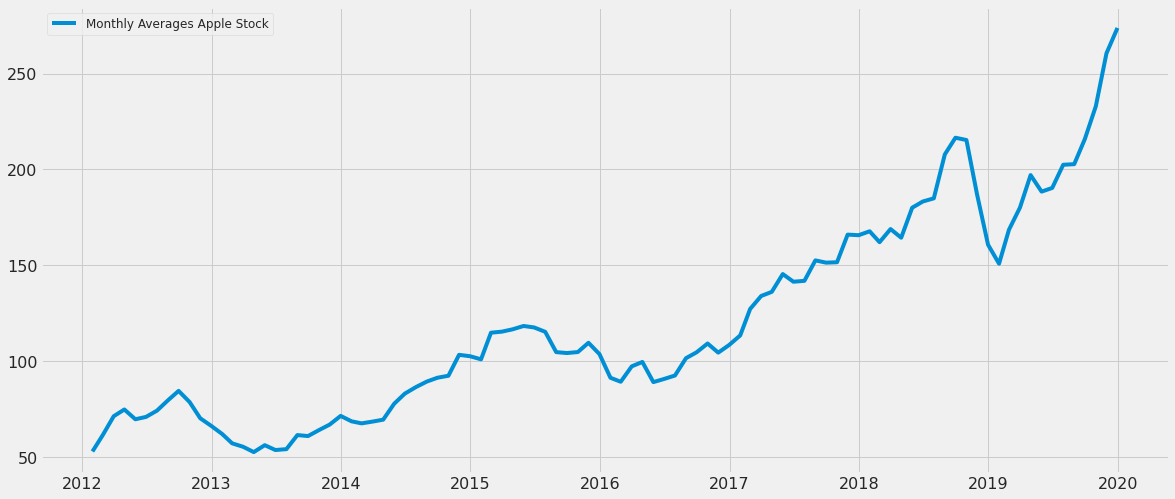

In [ ]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

The provided code generates a line plot to visualize the monthly average stock prices of Apple (represented by the 'Adj Close' column) using the `monthly_data` DataFrame.

The `fig = plt.figure(figsize=(18,8))` line creates a new figure object with a specific size of 18x8 inches, which will be used as the canvas for the plot.

The `plt.plot(monthly_data['Adj Close'], label='Monthly Averages Apple Stock')` line plots the values from the 'Adj Close' column of the `monthly_data` DataFrame on the y-axis against the corresponding dates on the x-axis. It also adds a label to the plot for identification purposes.

The `plt.xticks(fontsize=16)` and `plt.yticks(fontsize=16)` lines set the font size of the tick labels on the x-axis and y-axis, respectively.

The `ax.set_title('Monthly Resampled Data')` line sets the title of the plot to 'Monthly Resampled Data'.

Styling elements are applied to the plot, such as the 'fivethirtyeight' style (`plt.style.use('fivethirtyeight')`), and a legend is added to identify the line plot (`plt.legend(prop={'size': 12})`).

Finally, `plt.show()` is called to display the generated line plot on the screen.

In summary, this code generates a line plot that visualizes the monthly average stock prices of Apple over time. The plot allows for a visual examination of the trend and fluctuation of the stock prices on a monthly basis. The x-axis represents the dates, and the y-axis represents the average stock prices. The plot provides an overview of the historical performance of Apple stock and can assist in identifying patterns or trends in the data.

Exploratory Data Analysis

In [19]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

Adj Close  Year      Month  dayofweek  quarter
Date                                                       
2012-01-31   52.907298  2012    January    Tuesday        1
2012-02-29   61.424381  2012   February  Wednesday        1
2012-03-31   71.292448  2012      March   Saturday        1
2012-04-30   74.810151  2012      April     Monday        2
2012-05-31   69.708045  2012        May   Thursday        2
...                ...   ...        ...        ...      ...
2019-08-31  202.738817  2019     August   Saturday        3
2019-09-30  215.853332  2019  September     Monday        3
2019-10-31  232.974974  2019    October   Thursday        4
2019-11-30  260.569057  2019   November   Saturday        4
2019-12-31  273.780718  2019   December    Tuesday        4

[96 rows x 5 columns]

The provided code adds several new columns to the `monthly_data` DataFrame, containing additional information derived from the index of the DataFrame.

The line `monthly_data['Year'] = monthly_data.index.year` creates a new column named 'Year' in the `monthly_data` DataFrame. It extracts the year component from the index dates and assigns the corresponding year values to this new column.

The line `monthly_data['Month'] = monthly_data.index.strftime('%B')` creates another new column named 'Month' in the DataFrame. It uses the `strftime()` function to format the index dates as the full name of the month (e.g., 'January', 'February', etc.), and assigns these formatted month names to the 'Month' column.

Similarly, the line `monthly_data['dayofweek'] = monthly_data.index.strftime('%A')` creates a column named 'dayofweek' in the DataFrame. It uses `strftime()` to format the index dates as the full name of the day of the week (e.g., 'Monday', 'Tuesday', etc.), and assigns these formatted day names to the 'dayofweek' column.

Finally, the line `monthly_data['quarter'] = monthly_data.index.quarter` creates a column named 'quarter' in the DataFrame. It extracts the quarter component from the index dates and assigns the corresponding quarter values to the 'quarter' column.

By adding these new columns, the code enriches the `monthly_data` DataFrame with additional information about the year, month, day of the week, and quarter associated with each monthly observation. These columns can be used for further analysis, grouping, or visualization based on these temporal components.

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 <a list of 7 Text major ticklabel objects>)

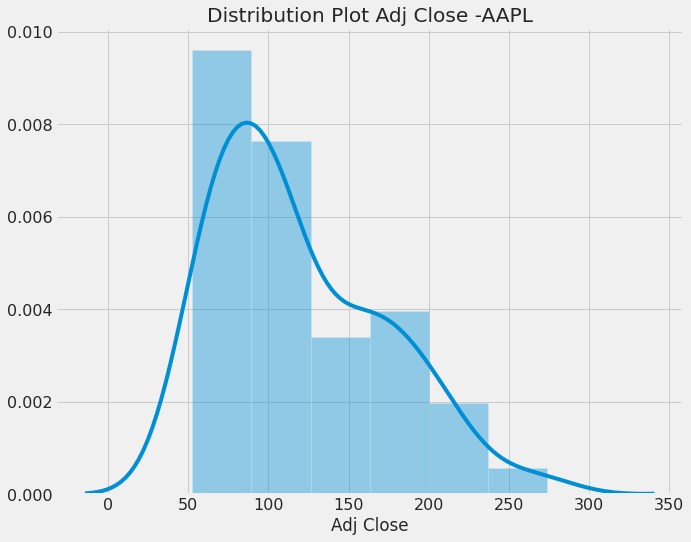

In [ ]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


The provided code generates a distribution plot to visualize the distribution of the 'Adj Close' values in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock.

The `fig = plt.figure(figsize=(10,8))` line creates a new figure object with a specific size of 10x8 inches, which will be used as the canvas for the plot.

The `sns.distplot(monthly_data['Adj Close'])` line uses the seaborn library (`sns`) to generate a distribution plot of the 'Adj Close' column from the `monthly_data` DataFrame. The distribution plot shows the distribution of the data values and estimates the underlying probability density function.

The `.set_title("Distribution Plot Adj Close -AAPL")` line sets the title of the plot to "Distribution Plot Adj Close -AAPL", providing a descriptive label for the plot.

Styling elements are applied to the plot, such as setting the tick label size on the axis (`ax.tick_params(labelsize=12)`), setting the font scale (`sns.set(font_scale=1)`), and adjusting the font size of the tick labels on the x-axis and y-axis (`plt.xticks(fontsize=16)` and `plt.yticks(fontsize=16)`).

By executing this code, a distribution plot is generated, providing insights into the distribution and shape of the 'Adj Close' values of Apple stock. The plot allows for visualizing the central tendency, spread, skewness, and other characteristics of the adjusted closing prices. It can help identify the presence of outliers, assess the symmetry or asymmetry of the data, and inform further statistical analysis or modeling.

Distribution Plot Inference : Distribution shows Right Skew

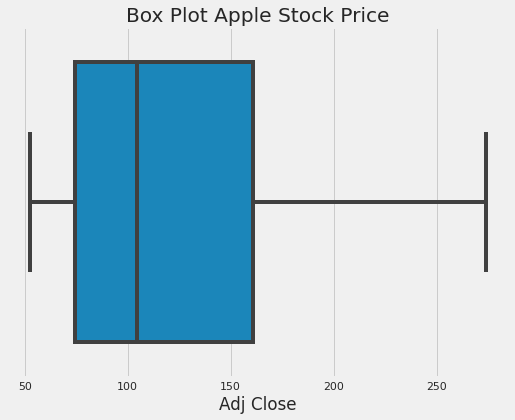

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')


The provided code generates a box plot to visualize the distribution and statistical summary of the 'Adj Close' values in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock.

The `fig = plt.figure(figsize=(8,6))` line creates a new figure object with a specific size of 8x6 inches, which will be used as the canvas for the plot.

The `sns.boxplot(monthly_data['Adj Close'])` line uses the seaborn library (`sns`) to create a box plot of the 'Adj Close' column from the `monthly_data` DataFrame. A box plot displays the distribution of the data by showing the quartiles, the median, and any potential outliers.

The `.set_title('Box Plot Apple Stock Price')` line sets the title of the plot to 'Box Plot Apple Stock Price', providing a descriptive label for the plot.

Styling elements are applied to the plot, such as setting the 'fivethirtyeight' style (`plt.style.context('fivethirtyeight')`). This style sets the visual appearance of the plot to match the distinctive aesthetic associated with the 'fivethirtyeight' theme.

By executing this code, a box plot is generated, presenting a graphical representation of the distribution of the 'Adj Close' values of Apple stock. The plot displays the minimum and maximum values, the lower and upper quartiles, the median (middle value), and any outliers in the data. It provides insights into the central tendency, spread, skewness, and presence of potential outliers in the adjusted closing prices. The box plot is a useful tool for comparing distributions, identifying unusual data points, and understanding the variability of the data.

Inferences from the Box Plot:

1. The distribution of the 'Adj Close' values in the monthly_data DataFrame is right-skewed, indicating that the majority of the stock prices are concentrated towards the lower end of the range, with a few higher values extending the right tail of the distribution.

2. The box plot reveals the presence of an outlier towards the higher end of the distribution, specifically around a stock price of 300$. This outlier represents a data point that significantly deviates from the typical range of values observed in the dataset.

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

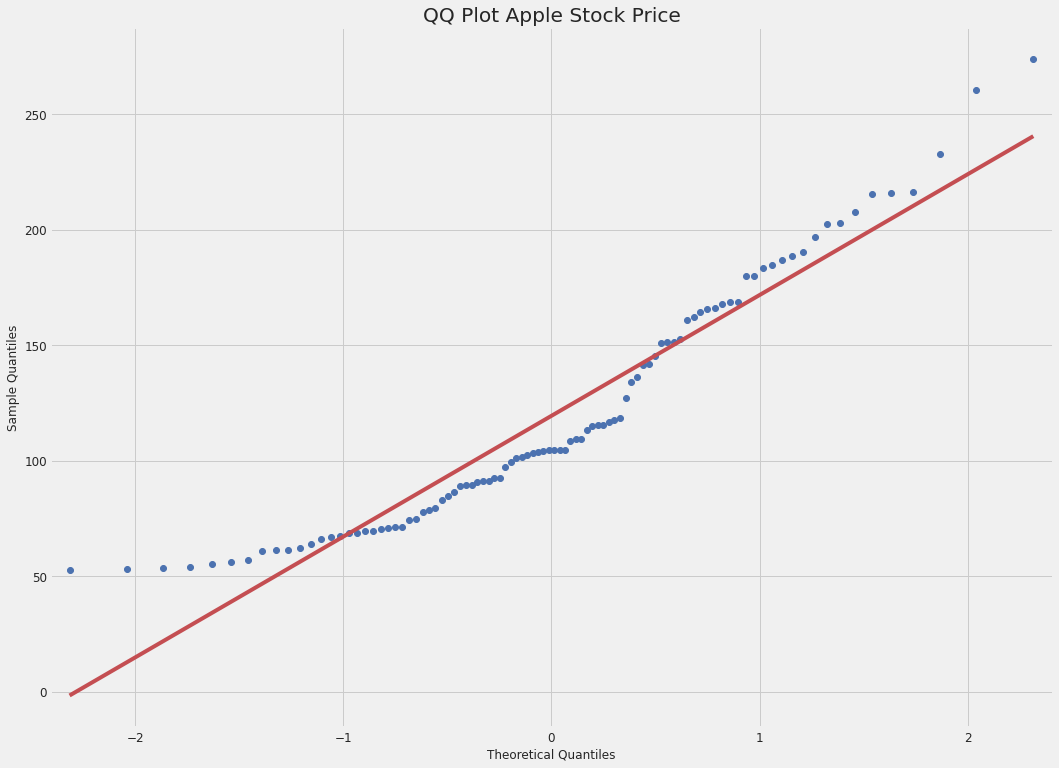

In [ ]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

The provided code generates a QQ plot to assess the normality of the distribution of the 'Adj Close' values in the `monthly_data` DataFrame, which represents the adjusted closing prices of Apple stock.

The `qq()` function, likely from the `statsmodels.graphics.gofplots` module, is used to create the QQ plot. The `qq()` function takes two arguments: the first argument is the data to be plotted, which in this case is the 'Adj Close' column from the `monthly_data` DataFrame, and the `line='s'` parameter indicates that a standardized line should be displayed on the plot.

The `plt.title('QQ Plot Apple Stock Price')` line sets the title of the plot to 'QQ Plot Apple Stock Price', providing a descriptive label for the plot.

By executing this code, a QQ plot is generated, which is a graphical tool used to assess whether a dataset follows a normal distribution. In a QQ plot, the quantiles of the dataset are compared to the quantiles of a theoretical normal distribution. If the points on the plot closely align with the diagonal line (the standardized line), it suggests that the data closely follows a normal distribution.

Interpreting the QQ plot can provide insights into the departure of the 'Adj Close' values from normality. Deviations from the diagonal line can indicate departures from normality, such as skewness, heavy tails, or other distributional characteristics. By examining the QQ plot, one can assess the suitability of assuming a normal distribution for further statistical analysis or modeling of the stock prices.

Inferences from the QQ Plot:

1. The QQ plot reveals that the distribution of the 'Adj Close' values in the `monthly_data` DataFrame exhibits heavy tails at the extremities. This means that the dataset contains values that are further away from the mean than what would be expected in a normal distribution.

2. The QQ plot also indicates the presence of both right and left skews in the distribution. This means that the dataset is not symmetric and shows a tendency towards higher or lower values on one side.

3. The QQ plot provides evidence that the distribution of the 'Adj Close' values does not follow a Gaussian normal distribution. The points on the plot deviate significantly from the diagonal line, indicating departures from normality.

By interpreting the QQ plot, we can gain insights into the shape and characteristics of the distribution. The heavy tails suggest the presence of extreme values, while the skews indicate asymmetry. These departures from normality highlight the need to consider appropriate statistical techniques or models that can account for the observed distributional characteristics of the stock prices.

In [ ]:
print('Skewness of Distribution is ',monthly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Adj Close'].kurtosis())

Skewness of Distribution is  0.8054131572723984
Kurtosis of Distribution is  -0.11205074257880465


The provided code calculates and prints the skewness and kurtosis values for the distribution of the 'Adj Close' values in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock.

The `.skew()` function is applied to the 'Adj Close' column of the `monthly_data` DataFrame. Skewness measures the asymmetry of a distribution. A positive skewness value indicates a longer or fatter tail on the right side of the distribution, while a negative skewness value indicates a longer or fatter tail on the left side of the distribution. By printing `monthly_data['Adj Close'].skew()`, the code displays the calculated skewness value for the distribution.

Similarly, the `.kurtosis()` function is applied to the 'Adj Close' column. Kurtosis measures the heaviness of the tails and the sharpness or flatness of the peak of a distribution. Positive kurtosis values indicate heavier tails and a sharper peak (leptokurtic), while negative kurtosis values indicate lighter tails and a flatter peak (platykurtic). By printing `monthly_data['Adj Close'].kurtosis()`, the code displays the calculated kurtosis value for the distribution.

Printing these skewness and kurtosis values provides quantitative measures that help describe the shape and characteristics of the distribution of the adjusted closing prices. The skewness value indicates whether the distribution is skewed to the right or left, while the kurtosis value indicates the extent of the tails and the peakedness of the distribution. These measures provide insights into the departure of the distribution from a normal distribution and assist in understanding the underlying statistical properties of the dataset.

Stock Price is Heavily skewed -Right tailed Skewness


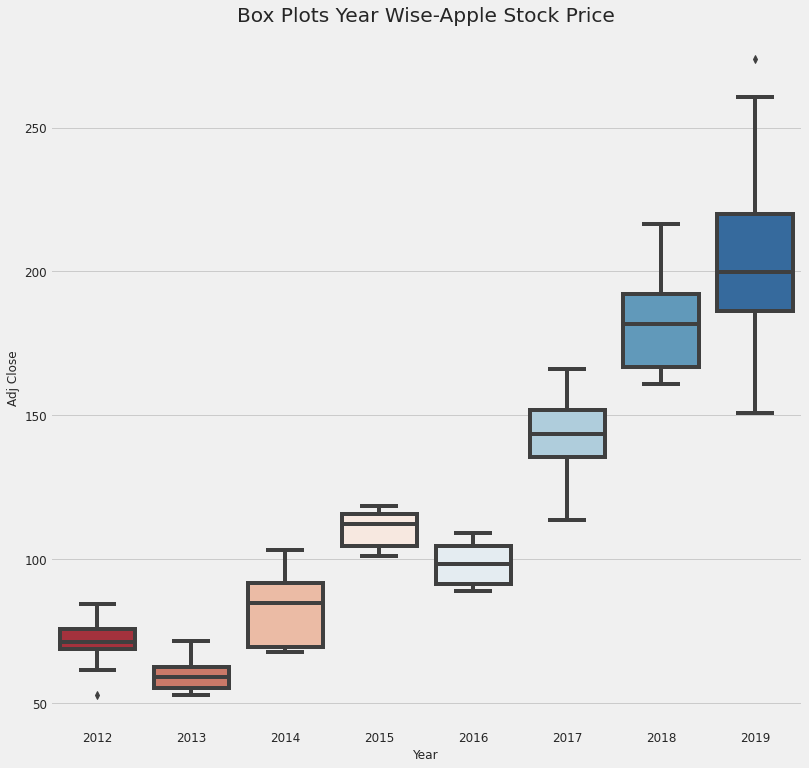

In [ ]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

The provided code generates a set of box plots to visualize the distribution of the 'Adj Close' values in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock, grouped by year.

The `plt.figure(figsize=(12,12))` line creates a new figure object with a specific size of 12x12 inches, which will be used as the canvas for the box plots.

The `sns.boxplot(x=monthly_data['Year'], y=monthly_data['Adj Close'], palette='RdBu')` line uses the seaborn library (`sns`) to create a box plot. It takes the 'Year' column from the `monthly_data` DataFrame as the x-axis variable and the 'Adj Close' column as the y-axis variable. This results in a set of box plots, where each box represents the distribution of 'Adj Close' values for a specific year. The `palette='RdBu'` parameter sets the color palette for the boxes.

The `ax.set_title('Box Plots Year Wise-Apple Stock Price')` line sets the title of the plot to 'Box Plots Year Wise-Apple Stock Price', providing a descriptive label for the plot.

Styling elements are applied to the plot, such as setting the 'fivethirtyeight' style (`plt.style.context('fivethirtyeight')`). This style sets the visual appearance of the plot to match the distinctive aesthetic associated with the 'fivethirtyeight' theme.

By executing this code, a set of box plots is generated, displaying the distribution of the 'Adj Close' values for each year separately. The box plots provide insights into the central tendency, spread, and potential outliers of the adjusted closing prices for each year. They allow for easy visual comparison of the distributional characteristics between different years and help identify any changes or patterns in the stock prices over time.

Inferences from the Box Plot:

1. The box plots reveal the presence of outliers in the years 2012 and 2019 for the distribution of the 'Adj Close' values. These outliers represent data points that significantly deviate from the typical range of values observed within those specific years.

2. There is a notable amount of variability in the distributions for the years 2014, 2017, 2018, and 2019. This suggests that during these years, the adjusted closing prices of Apple stock exhibited a wide range of values, indicating potential fluctuations and changes in the market conditions or investor sentiment.

3. Among all the years, 2019 appears to be the most volatile. The wider spread of the box plot and the presence of outliers indicate a higher degree of variability and potential extreme price movements during that year.

4. The box plots also suggest an upward rising trend in the adjusted closing prices over the years. This can be observed from the general upward shift of the medians and the higher position of the upper quartile in the later years compared to the earlier years.

Analyzing the box plots provides insights into the distribution and characteristics of the adjusted closing prices for each year. The presence of outliers, variability, and trends can inform further analysis and understanding of the stock price dynamics over time.

In [ ]:
group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}
for yr in list_years:
  group_by_yr.append('df' + str(yr)) 

for enum,yr in enumerate(list_years):
   group_by_yr[enum] = monthly_data[str(yr)]['Adj Close']
   dict_IQR[str(yr)] = stats.iqr(group_by_yr[enum])

The provided code performs the following operations:

1. Creates an empty list named `group_by_yr` to store individual DataFrame objects.
2. Obtains a list of unique years from the 'Year' column in the `monthly_data` DataFrame.
3. Creates an empty dictionary named `dict_IQR` to store the calculated interquartile ranges (IQR) for each year.
4. Iterates through the list of unique years:
    - Appends a string representing a DataFrame object to the `group_by_yr` list, where each object is named based on the year.
    - Assigns the 'Adj Close' values corresponding to the current year to the respective DataFrame object in the `group_by_yr` list.
    - Calculates the interquartile range (IQR) for the 'Adj Close' values of the current year and stores it in the `dict_IQR` dictionary, using the year as the key.

The code essentially organizes the 'Adj Close' values from the `monthly_data` DataFrame into separate DataFrames, each representing the data for a specific year. It also calculates and stores the IQR for each year in a dictionary.

By creating separate DataFrames for each year, this code allows for easy access and analysis of the 'Adj Close' values specific to each year. The IQR values stored in the `dict_IQR` dictionary provide information about the spread and variability of the 'Adj Close' values for each year. These data structures can be further utilized for various calculations, comparisons, or visualizations involving the yearly data.

In [ ]:
##Interquartile Range(IQR) Year Wise for Stock Price
dict_IQR

{'2012': 6.9331465153138225,
 '2013': 7.476562772903719,
 '2014': 22.342963448240184,
 '2015': 11.10740590584416,
 '2016': 13.310573720864667,
 '2017': 16.22455365139379,
 '2018': 25.262020365941993,
 '2019': 33.7839948399986}

The provided code calculates and stores the interquartile range (IQR) for the 'Adj Close' values of each year in the `monthly_data` DataFrame, representing the adjusted closing prices of Apple stock.

The `dict_IQR` dictionary is initialized to store the calculated IQR values for each year. It will serve as a container to hold the results.

The code iterates over each unique year in the 'Year' column of the `monthly_data` DataFrame. For each year:
- A key is created in the `dict_IQR` dictionary using the year as the key name.
- The IQR is calculated for the 'Adj Close' values corresponding to the current year and assigned as the value for the respective key in the `dict_IQR` dictionary.

By executing this code, the `dict_IQR` dictionary will contain the calculated IQR values for each year. The IQR is a statistical measure that represents the range between the 25th and 75th percentiles of a distribution. It provides insights into the spread and variability of the 'Adj Close' values for each year. This information can be used for further analysis, comparison, or visualization to understand the yearly differences in the stock price range and variability.

Text(0, 0.5, 'InterQuartile Range')

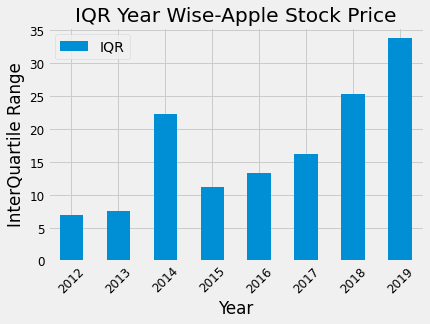

In [ ]:

IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-Apple Stock Price')
plt.ylabel('InterQuartile Range')


The provided code performs the following operations:

1. Creates a new DataFrame named `IQR_df` using the data stored in the `dict_IQR` dictionary. The dictionary items are converted into a list of tuples using the `items()` method, and then the list is used to construct the DataFrame. The columns in the DataFrame are named 'Year' and 'IQR' to represent the year and the corresponding interquartile range (IQR) values.
2. Sets the index of the `IQR_df` DataFrame to the 'Year' column. This step allows for easy access and manipulation of the data based on the year.
3. Generates a bar plot using the `plot()` function with `kind='bar'`. The 'Year' column is plotted on the x-axis, and the 'IQR' values are plotted on the y-axis. This plot visualizes the interquartile range for each year.
4. Adjusts the x-axis tick labels by rotating them 45 degrees for better readability using `plt.xticks(rotation=45)`.
5. Sets the 'fivethirtyeight' style using `plt.style.context('fivethirtyeight')`. This style sets the visual appearance of the plot to match the distinctive aesthetic associated with the 'fivethirtyeight' theme.
6. Sets the title of the plot to 'IQR Year Wise-Apple Stock Price' using `plt.title('IQR Year Wise-Apple Stock Price')`.
7. Sets the label for the y-axis as 'InterQuartile Range' using `plt.ylabel('InterQuartile Range')`.

By executing this code, a bar plot is generated that displays the interquartile range (IQR) for each year of the adjusted closing prices of Apple stock. The plot allows for easy comparison of the IQR values across different years and provides insights into the spread and variability of the stock prices. The plot's x-axis represents the years, the y-axis represents the IQR values, and the height of each bar represents the magnitude of the IQR for the corresponding year.

Inferences from the provided information:

1. When the data does not follow a normal distribution, the interquartile range (IQR) is a better metric for measuring variability compared to the standard deviation. Unlike the standard deviation, the IQR is not influenced by outliers, making it a robust measure of spread that captures the range between the 25th and 75th percentiles of the data.

2. As observed from the box plot, the years 2014 and 2019 are the most volatile for Apple stock. This volatility is depicted by the wider spread and the presence of outliers in the box plots for these years. The wider spread indicates a larger range of prices, while the outliers represent extreme values that deviate significantly from the majority of the data points. These observations suggest that 2014 and 2019 experienced notable fluctuations and potential significant price movements in Apple stock.

By considering the non-normality of the data and examining the box plots, we can conclude that the interquartile range is a more suitable measure of variability and identify the years with the highest volatility in the Apple stock prices.

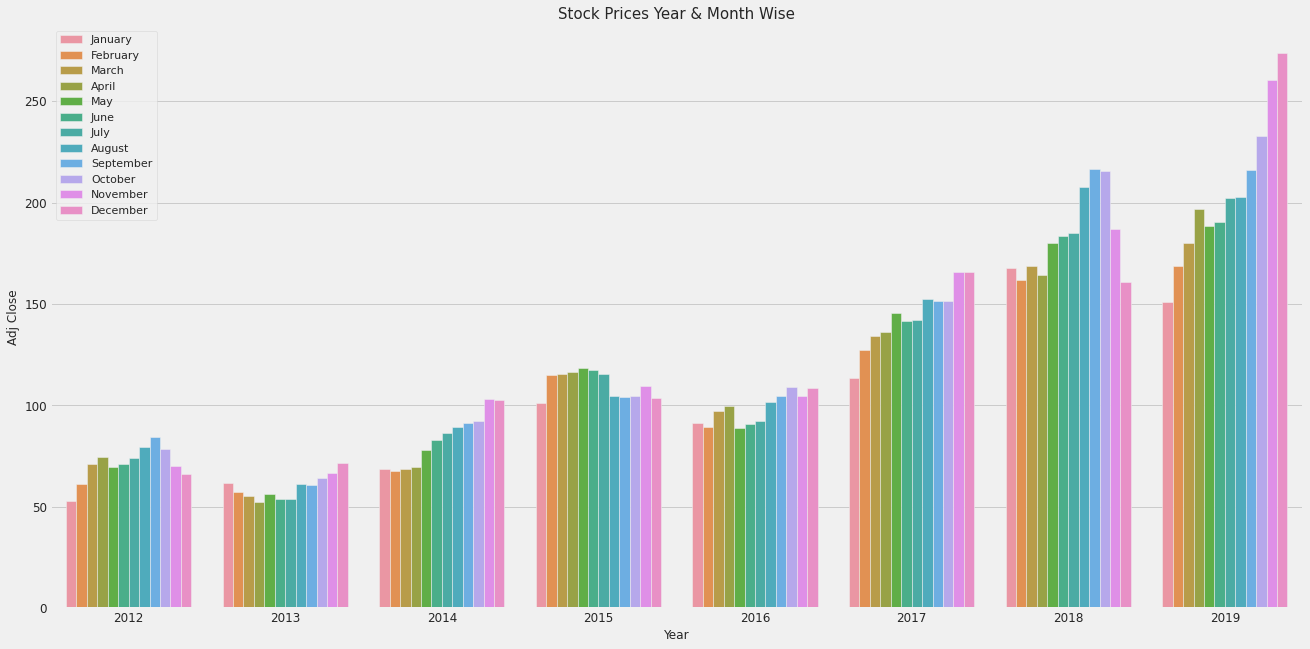

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

The provided code generates a grouped bar plot to visualize the stock prices year and month-wise in the `monthly_data` DataFrame, which represents the adjusted closing prices of Apple stock.

The `fig, ax = plt.subplots(figsize=(20,10))` line creates a new figure object with a specific size of 20x10 inches, and assigns the figure object to `fig` and an axis object to `ax`. This figure and axis will be used as the canvas for the bar plot.

The `palette = sns.color_palette("mako_r", 4)` line sets a color palette named "mako_r" with 4 colors. This palette will be used to differentiate the bars representing different months.

The `sns.barplot(x="Year", y="Adj Close", hue='Month', data=monthly_data)` line uses the seaborn library (`sns`) to create a bar plot. It takes the 'Year' column as the x-axis variable, the 'Adj Close' column as the y-axis variable, and the 'Month' column as the hue variable. This results in a grouped bar plot, where each bar represents the stock prices for a specific year, and the bars within each year are further divided into segments based on the months.

The `a.set_title("Stock Prices Year & Month Wise", fontsize=15)` line sets the title of the plot to "Stock Prices Year & Month Wise", providing a descriptive label for the plot.

The `plt.legend(loc='upper left')` line adds a legend to the plot, which indicates the color-coding for the different months.

By executing this code, a grouped bar plot is generated, allowing for the visual comparison of the stock prices across different years and months. The plot provides insights into the variation in stock prices within and between years, as well as the monthly patterns or trends in the stock prices.

Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time,the Wallstreet is excited about upcoming products .



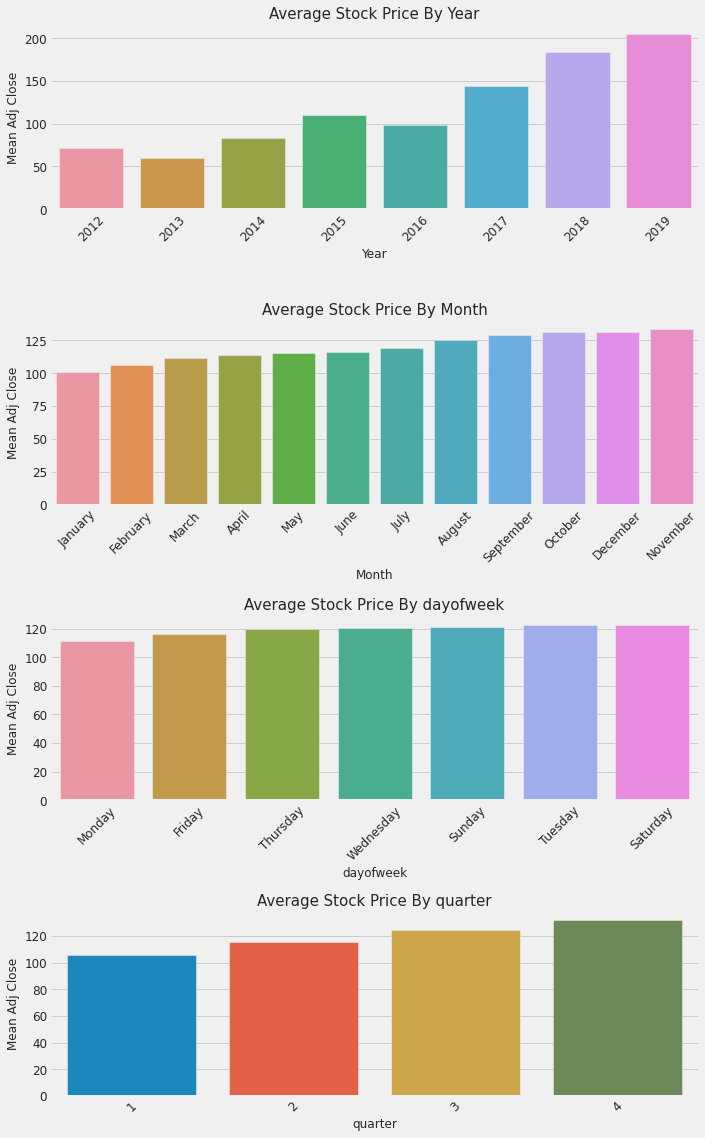

In [ ]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

The provided code generates a set of bar plots to visualize the average stock prices based on different grouping variables in the `monthly_data` DataFrame, which represents the adjusted closing prices of Apple stock.

The `fig = plt.figure(figsize=(10,16))` line creates a new figure object with a specific size of 10x16 inches. This figure will be used as the canvas for the bar plots.

The `group_cols = monthly_data.columns` line retrieves the column names from the `monthly_data` DataFrame and assigns them to the `group_cols` variable. These column names will be used as the grouping variables.

The code then iterates over the grouping variables starting from the second column (`group_cols[1:]`) using `enumerate` to access both the index and the column name (`enum, i`).

For each grouping variable:
- An axis object (`ax`) is added to the figure using `fig.add_subplot(4,1,enum+1)`, creating a subplot for each grouping variable.
- The `Aggregated` DataFrame is created by grouping the 'Adj Close' column based on the current grouping variable ('i'), calculating the mean, and sorting the values in ascending order.
- A bar plot is generated using `sns.barplot()` with the 'x' variable as the current grouping variable ('i'), the 'y' variable as the 'Adj Close' column, and the 'ax' parameter to specify the subplot.
- The x-label is set to the current grouping variable, and the y-label is set to 'Mean Adj Close' using `ax.set(xlabel=str(i), ylabel='Mean Adj Close')`.
- The title of the plot is set to "Average Stock Price By [grouping variable]" using `ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)`.
- The x-axis tick labels are rotated by 45 degrees for better readability using `plt.xticks(rotation=45)`.

Finally, the `plt.tight_layout(pad=1)` line adjusts the spacing between the subplots to avoid overlapping.

By executing this code, a set of bar plots is generated, with each plot representing the average stock prices based on different grouping variables. The plots provide insights into the average stock prices within different categories or groups, helping to identify any variations or patterns in the stock prices based on these variables.

Inferences from the provided information:

1. According to the mean price by years, the average stock price in 2013 and 2016 is lower than the previous year. This suggests that there was a decline in the average stock price during those years compared to the preceding year.

2. The average stock price tends to be lower at the start of the week in comparison to the end of the week. This observation indicates a pattern where stock prices generally exhibit an upward trend as the week progresses, potentially influenced by market dynamics or investor behavior.

3. The month of November stands out with the highest average stock price. This suggests that November tends to be a favorable month for Apple stock, possibly driven by specific market events or company-related factors during that time.

4. According to the average stock price analysis, the fourth quarter (Q4) is the best for Apple. This finding aligns with sales figures, as Q4 is typically a strong period for Apple due to the new product cycle and the holiday season. This seasonal effect, with higher average stock prices during Q4, indicates a positive market response to Apple's product launches and increased consumer demand during the holiday period.

These inferences provide insights into the trends and patterns observed in the average stock prices for Apple. They indicate specific periods, such as years, weekdays, months, and quarters, where the stock prices exhibit distinct behavior or performance. Understanding these patterns can be valuable for investors and analysts in making informed decisions related to Apple stock.

Decomposition of Time Series


<Figure size 1440x1152 with 0 Axes>

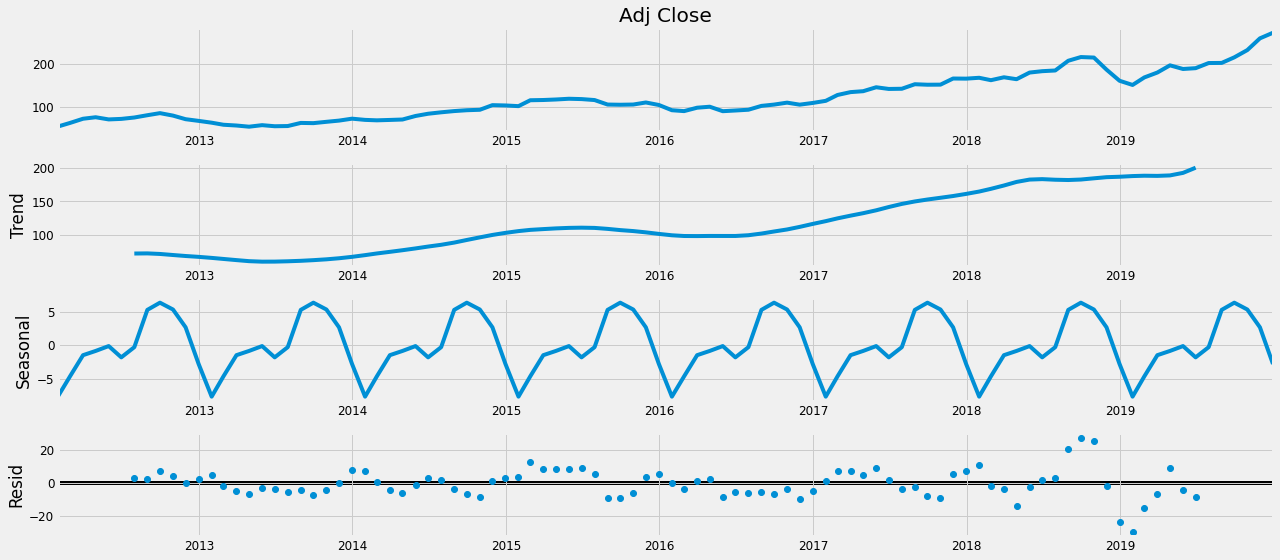

In [ ]:
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Adj Close'],model='additive',freq=12)
decomposed_series.plot()
plt.show()

The provided code performs the following operations:

1. Sets the default figure size using `rcParams['figure.figsize']` to 18 inches width and 8 inches height. This ensures that subsequent plots will have this specified size by default.

2. Creates a new figure object with a specific size of 20x16 inches using `plt.figure(figsize=(20,16))`. This figure will be used as the canvas for the plot.

3. Applies seasonal decomposition using the `seasonal_decompose()` function from the `statsmodels.tsa.seasonal` module to decompose the 'Adj Close' values from the `monthly_data` DataFrame. The decomposition model chosen is 'additive', and the frequency is set to 12, indicating monthly data.

4. Plots the decomposed series using `decomposed_series.plot()`. This will generate a plot with multiple subplots showing the original series, trend component, seasonal component, and residual component.

5. Displays the plot using `plt.show()`, showing the decomposed series.

By executing this code, a plot is generated to visualize the decomposition of the 'Adj Close' values into their trend, seasonal, and residual components. This decomposition helps in understanding the underlying patterns and variations present in the data. The plot allows for the examination of the overall trend, seasonal fluctuations, and the random fluctuations (residuals) in the adjusted closing prices of Apple stock.

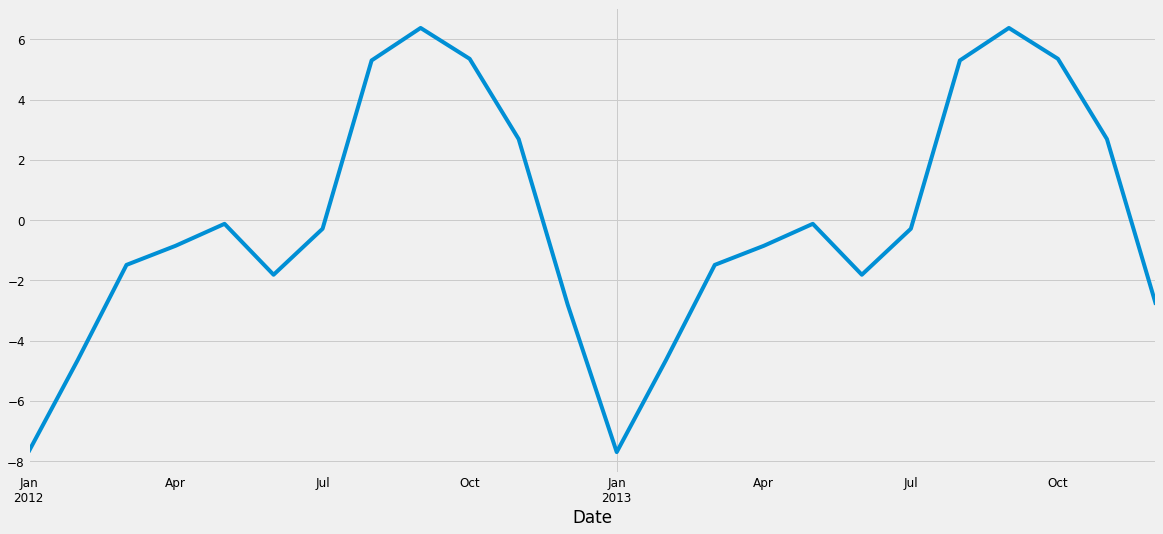

<Figure size 576x576 with 0 Axes>

In [ ]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

The provided code performs the following operations:

1. Plots the seasonal component of the decomposed series using `decomposed_series.seasonal['2012':'2013'].plot()`. This code subset the seasonal component from the decomposed series for the time period between 2012 and 2013 and generates a plot specifically for that period. The plot visualizes the seasonal patterns or fluctuations in the adjusted closing prices of Apple stock during that time frame.

2. Creates a new figure object with a specific size of 8x8 inches using `fig = plt.figure(figsize=(8,8))`. This figure will be used as the canvas for the subsequent plot.

By executing this code, two plots are generated. The first plot displays the seasonal component of the decomposed series, allowing for the examination of the seasonal patterns or fluctuations in the adjusted closing prices of Apple stock specifically between the years 2012 and 2013. The second plot, which is created using the new figure object, can be used to generate additional visualizations or analysis related to the seasonal component.

Inferences from the decomposition:

1. Trend: The decomposition reveals an overall upward trend in the adjusted closing prices of Apple stock. This suggests that, on average, the stock prices have been increasing over time.

2. Seasonality: The decomposition also indicates the presence of seasonality in the data. The seasonal component shows patterns or fluctuations in the adjusted closing prices that align with the holiday season. As expected, Apple stock tends to rally during the holiday period, which is characterized by increased sales for Apple products. This seasonality effect has been observed consistently over the years.

By analyzing the decomposition results, we can conclude that the adjusted closing prices of Apple stock have exhibited an upward trend, indicating potential long-term growth. Additionally, the presence of seasonality highlights the impact of the holiday season on Apple's sales and stock performance. These insights can be valuable for understanding the underlying patterns and factors influencing the stock prices, assisting investors and analysts in making informed decisions related to Apple stock.

# Stationarity of Time Series 

The Augmented Dickey-Fuller (ADF) test is used to evaluate the stationarity of a time series. The purpose of this test is to determine whether the time series has a unit root (indicating non-stationarity) or not.

The ADF test involves testing two hypotheses:

1. Null Hypothesis: The time series has a unit root, indicating it is non-stationary. This means that the time series exhibits a changing mean or variance, indicating the presence of a trend or seasonality.

2. Alternate Hypothesis: The time series does not have a unit root, indicating it is stationary. In this case, the time series exhibits a constant mean and variance, indicating the absence of a trend or seasonality.

If the ADF test rejects the null hypothesis and provides evidence to support the alternate hypothesis, it suggests that the time series is stationary. On the other hand, if the test fails to reject the null hypothesis, it indicates that the time series is non-stationary.

A stationary time series is characterized by a constant mean, constant variance, and the absence of trend and seasonality. These properties make stationary time series more predictable and suitable for various time series analysis techniques and models.

In [ ]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')



The provided code defines a function named `ad_fuller_func` that performs the Augmented Dickey-Fuller (ADF) test on a given time series, using the `adfuller()` function from the statsmodels library.

The `ad_fuller_func` function takes a time series `X` as input and performs the ADF test. Here's a breakdown of what the code does:

1. The `adfuller()` function is called with the time series `X` as the argument. This function computes the ADF statistic, p-value, and critical values for the ADF test.

2. The ADF statistic is printed using `print('ADF Statistic: %f' % result_ad_fuller[0])`. This statistic measures the strength of evidence against the null hypothesis of a unit root in the time series.

3. The p-value is printed using `print('p-value: %f' %result_ad_fuller[1])`. This value represents the probability that the null hypothesis is true. A lower p-value suggests stronger evidence against the null hypothesis.

4. The critical values are printed using a loop that iterates over the items in `result_ad_fuller[4]`, which contains the critical values at different significance levels. This information helps to determine the rejection region for the null hypothesis.

5. Based on the ADF statistic and critical values, the function determines whether to reject the null hypothesis or not. If the ADF statistic is lower than the critical value at a certain significance level (5% in this case), the null hypothesis is rejected, indicating that the time series is stationary. Otherwise, if the ADF statistic is greater than or equal to the critical value, the null hypothesis is not rejected, suggesting that the time series is non-stationary.

By executing this code and calling the `ad_fuller_func` function with a specific time series as the argument, the ADF test results will be printed, including the ADF statistic, p-value, critical values, and the decision on whether to reject the null hypothesis. This provides insights into the stationarity properties of the time series, helping in determining the appropriate modeling and analysis techniques.

In [ ]:
ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.339253
p-value: 0.996820
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Failed to Reject Ho-Time Series is Non-Stationary


The provided code calls the `ad_fuller_func` function, passing the 'Adj Close' column from the `monthly_data` DataFrame as an argument.

The `ad_fuller_func` function performs the Augmented Dickey-Fuller (ADF) test on the given time series, which represents the adjusted closing prices of Apple stock. The purpose of this test is to evaluate the stationarity of the time series.

Upon execution of `ad_fuller_func(monthly_data['Adj Close'])`, the function calculates the ADF statistic, p-value, and critical values for the ADF test. It then prints these statistical results.

The ADF statistic measures the strength of evidence against the null hypothesis of a unit root, which suggests non-stationarity. The p-value represents the probability that the null hypothesis is true. The critical values are thresholds that help determine the rejection region for the null hypothesis.

Based on these results, the function determines whether to reject the null hypothesis or not. If the ADF statistic is lower than the critical value at a certain significance level (such as 5%), the null hypothesis is rejected, indicating that the time series is stationary. Conversely, if the ADF statistic is greater than or equal to the critical value, the null hypothesis is not rejected, suggesting that the time series is non-stationary.

By calling `ad_fuller_func(monthly_data['Adj Close'])`, the code performs the ADF test specifically on the adjusted closing prices of Apple stock and provides insights into the stationarity of this time series. This information is valuable for understanding the characteristics of the data and choosing appropriate modeling and analysis techniques.

The time series of the adjusted closing prices of Apple stock is determined to be non-stationary. This observation is consistent with the earlier analysis of the decomposition, which revealed the presence of both trend and seasonality components.

Furthermore, the non-stationarity of the time series is statistically verified by conducting the Augmented Dickey-Fuller (ADF) test. The results of the ADF test provide evidence against the null hypothesis of a unit root, indicating that the time series is indeed non-stationary.

Therefore, both the visual examination of the decomposition and the statistical analysis through the ADF test confirm that the time series of the adjusted closing prices of Apple stock exhibits characteristics of non-stationarity. These findings are important to consider when selecting appropriate time series models and analyzing the data for further insights or predictions.

AutoCorrelation Function(ACF)

Text(0.5, 0, 'Lags')

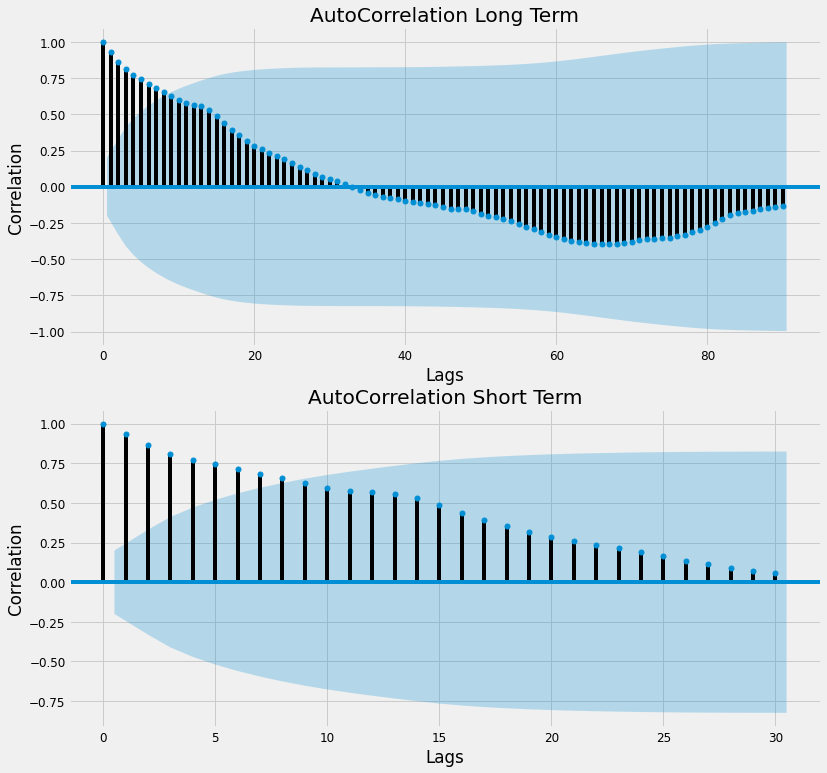

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

The provided code generates two subplots within a figure to visualize the autocorrelation of the adjusted closing prices of Apple stock at different lag intervals.

Here is a breakdown of what the code does:

1. The `fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 12))` line creates a figure with two subplots arranged in a 2x1 grid. The subplots are assigned to the `ax1` and `ax2` variables, respectively. The figure size is set to 12x12 inches.

2. The `acf = plot_acf(monthly_data['Adj Close'], lags=90, ax=ax1)` line plots the autocorrelation function (ACF) for the adjusted closing prices of Apple stock on the first subplot (`ax1`). The `lags` parameter is set to 90, indicating that the autocorrelation is calculated for a range of 90 lag intervals.

3. The `ax1.set_title('AutoCorrelation Long Term')` line sets the title for the first subplot as "AutoCorrelation Long Term".

4. The `acf = plot_acf(monthly_data['Adj Close'], lags=30, ax=ax2)` line plots the autocorrelation function (ACF) for the adjusted closing prices of Apple stock on the second subplot (`ax2`). The `lags` parameter is set to 30, indicating that the autocorrelation is calculated for a range of 30 lag intervals.

5. The `ax2.set_title('AutoCorrelation Short Term')` line sets the title for the second subplot as "AutoCorrelation Short Term".

6. The `ax1.set_ylabel('Correlation')` and `ax1.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the first subplot (`ax1`), respectively.

7. Similarly, the `ax2.set_ylabel('Correlation')` and `ax2.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the second subplot (`ax2`), respectively.

By executing this code, two subplots are generated within a single figure. The first subplot shows the autocorrelation of the adjusted closing prices of Apple stock for a longer lag interval (90 lags), while the second subplot shows the autocorrelation for a shorter lag interval (30 lags). The plots provide insights into the degree of correlation between the stock prices at different time lags, helping to identify any significant autocorrelation patterns.

Interpreting the ACF plot:

1. The slow decay of correlation values in the ACF plot indicates that future values of the time series are heavily dependent on the lagged values. This suggests that there is a significant relationship between the current observation and the previous observations. The non-random pattern of the ACF plot indicates that the time series is not a random process, making it suitable for time series modeling.

2. Additionally, the ACF plot confirms the earlier conclusion that the time series is non-stationary. The non-zero autocorrelation at various lags suggests the presence of trends, seasonality, or other time-dependent patterns in the data.

3. The ACF plot can provide insights into the order of the moving average (MA) process. In this case, the slow decay in the ACF plot suggests a possible MA(1) process, where the current value of the time series is dependent on the previous value plus a random error term.

Overall, the ACF plot helps us understand the correlation structure of the time series, identify non-random patterns, and determine potential models for further analysis or forecasting.

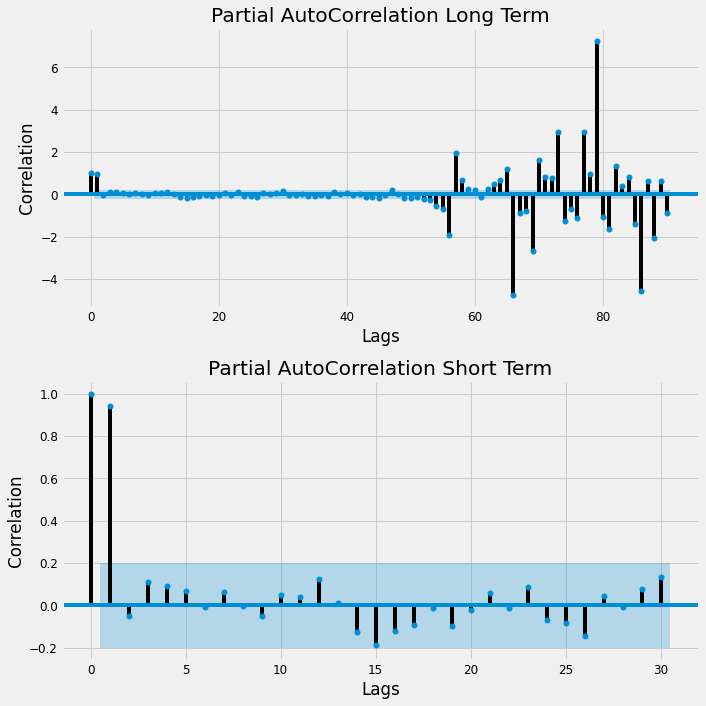

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

The provided code generates two subplots within a figure to visualize the partial autocorrelation of the adjusted closing prices of Apple stock at different lag intervals.

Here is a breakdown of what the code does:

1. The `fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))` line creates a figure with two subplots arranged in a 2x1 grid. The subplots are assigned to the `ax1` and `ax2` variables, respectively. The figure size is set to 10x10 inches.

2. The `pacf = plot_pacf(monthly_data['Adj Close'], lags=90, ax=ax1)` line plots the partial autocorrelation function (PACF) for the adjusted closing prices of Apple stock on the first subplot (`ax1`). The `lags` parameter is set to 90, indicating that the partial autocorrelation is calculated for a range of 90 lag intervals.

3. The `ax1.set_title('Partial AutoCorrelation Long Term')` line sets the title for the first subplot as "Partial AutoCorrelation Long Term".

4. The `pacf = plot_pacf(monthly_data['Adj Close'], lags=30, ax=ax2)` line plots the partial autocorrelation function (PACF) for the adjusted closing prices of Apple stock on the second subplot (`ax2`). The `lags` parameter is set to 30, indicating that the partial autocorrelation is calculated for a range of 30 lag intervals.

5. The `ax2.set_title('Partial AutoCorrelation Short Term')` line sets the title for the second subplot as "Partial AutoCorrelation Short Term".

6. The `ax1.set_ylabel('Correlation')` and `ax1.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the first subplot (`ax1`), respectively.

7. Similarly, the `ax2.set_ylabel('Correlation')` and `ax2.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the second subplot (`ax2`), respectively.

8. The `plt.tight_layout(pad=1)` line adjusts the spacing between the subplots for better visualization.

By executing this code, two subplots are generated within a single figure. The first subplot shows the partial autocorrelation of the adjusted closing prices of Apple stock for a longer lag interval (90 lags), while the second subplot shows the partial autocorrelation for a shorter lag interval (30 lags). The plots provide insights into the correlation between the stock prices at different time lags, specifically focusing on the partial autocorrelation structure.

Interpreting the PACF plot:

1. The sudden decay observed at lag-1 in the PACF plot indicates a strong correlation between the current observation and the immediately preceding observation. This suggests that the partial autocorrelation at lag-1 is significant and there is a direct relationship between these two points.

2. The sudden drop in the partial autocorrelation after lag-1 suggests that the correlation with earlier lags becomes insignificant or negligible. This pattern is indicative of an autoregressive (AR) process.

3. Based on the PACF plot, it can be inferred that the time series of the adjusted closing prices of Apple stock follows an AR(1) model, where the current value of the series is primarily dependent on the previous value, with little to no influence from earlier observations.

By analyzing the PACF plot, we can identify the lag at which the partial autocorrelation becomes significant and determine the potential order of the autoregressive component in the time series model. In this case, the sudden decay at lag-1 suggests that an AR(1) model is likely suitable for capturing the autocorrelation structure of the adjusted closing prices of Apple stock.

Transformations To Make Series Stationary

In [ ]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

The provided code performs differencing on the adjusted closing prices of Apple stock. Differencing is a common technique used in time series analysis to remove trends and make the series stationary.

Here is a breakdown of what the code does:

1. The `monthly_diff` variable is created to store the result of the differencing operation.

2. The differencing operation is performed by subtracting the adjusted closing prices at the current time point (`monthly_data['Adj Close']`) from the adjusted closing prices at the previous time point (`monthly_data['Adj Close'].shift(1)`). This calculates the difference between consecutive observations.

3. By subtracting the previous value from the current value, the code computes the first-order difference, also known as "differencing by 1". This process helps to eliminate any trend or seasonality that may be present in the data, transforming the series into a stationary time series.

The resulting `monthly_diff` series represents the differenced values of the adjusted closing prices. It can be used for further analysis or modeling purposes, such as identifying patterns, fitting models, or forecasting future values.

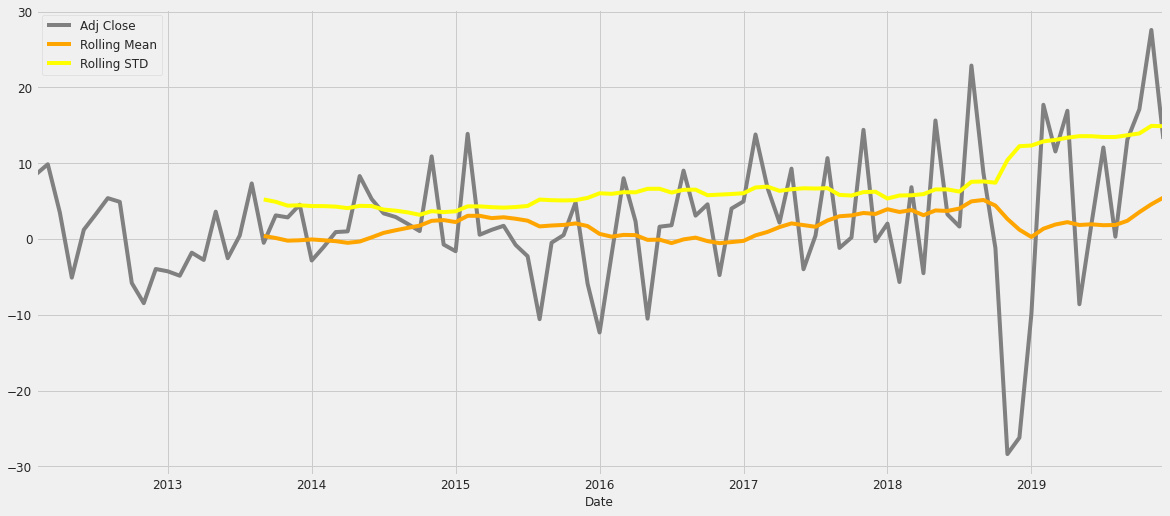

In [ ]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

The provided code generates a plot to visualize the differenced values of the adjusted closing prices of Apple stock, along with the rolling mean and rolling standard deviation.

Here is a breakdown of what the code does:

1. The `monthly_diff[1:].plot(c='grey')` line plots the differenced values of the adjusted closing prices, starting from the second observation (index 1). The color of the plot is set to grey, representing the original differenced series.

2. The `monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')` line calculates and plots the rolling mean of the differenced values. It uses a window size of 20, meaning it calculates the average of the previous 20 observations at each point. The rolling mean plot is labeled as "Rolling Mean" and the color is set to orange.

3. The `monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')` line calculates and plots the rolling standard deviation of the differenced values. It also uses a window size of 20 to compute the standard deviation of the previous 20 observations at each point. The rolling standard deviation plot is labeled as "Rolling STD" and the color is set to yellow.

4. The `plt.legend(prop={'size': 12})` line adds a legend to the plot, displaying the labels and corresponding colors for the differenced series, rolling mean, and rolling standard deviation.

By executing this code, a plot is generated to visualize the differenced values of the adjusted closing prices of Apple stock, along with the rolling mean and rolling standard deviation. This plot helps to identify any trends or patterns in the differenced series and provides insights into the variability and average behavior of the data.

The series looks stationary as its having constant mean and variance .

In [ ]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.501865
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Reject Null Hypothesis(Ho)-Time Series is Stationary


The provided code performs the Augmented Dickey-Fuller (ADF) test on the differenced series of the adjusted closing prices of Apple stock to check if the time series is stationary.

Here is a breakdown of what the code does:

1. The `ad_fuller_func` function is called, passing the `monthly_diff[1:]` series as an argument. This function performs the ADF test on the given series.

2. The ADF test calculates the ADF statistic, p-value, and critical values to determine the stationarity of the time series. The ADF statistic represents the test statistic value, the p-value indicates the significance level, and the critical values are the thresholds for rejecting or failing to reject the null hypothesis.

3. The function then prints the ADF statistic, p-value, and critical values.

4. Based on the ADF statistic and the critical values, the function provides a conclusion about the stationarity of the differenced series. If the ADF statistic is smaller than the critical value at a certain significance level (e.g., 5%), the null hypothesis is rejected, indicating that the time series is stationary. Otherwise, if the ADF statistic is larger than the critical value, the null hypothesis is not rejected, suggesting that the time series is non-stationary.

By executing this code, the ADF test is performed on the differenced series of the adjusted closing prices of Apple stock to assess its stationarity. The results of the test, including the ADF statistic, p-value, and critical values, are displayed, along with a conclusion about the stationarity of the series.

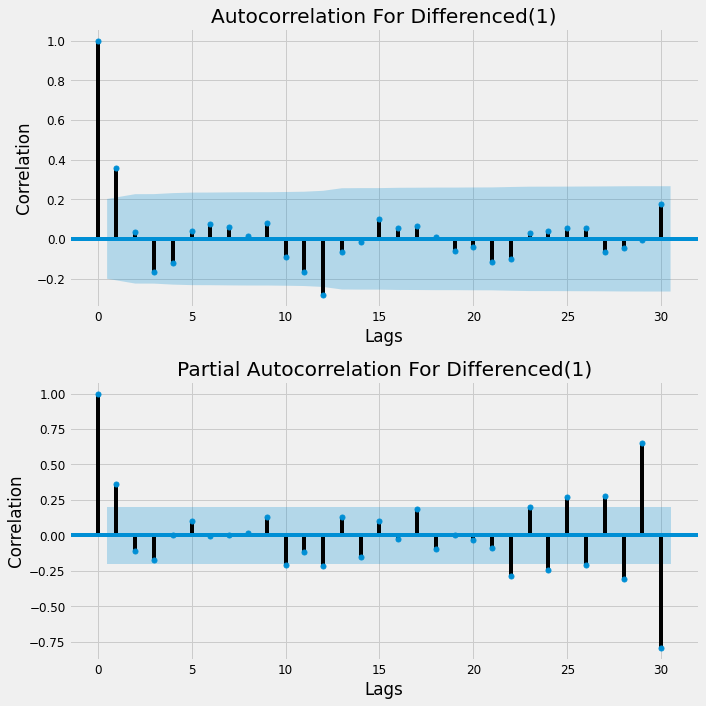

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

The provided code generates two subplots within a figure to visualize the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the differenced series of the adjusted closing prices of Apple stock.

Here is a breakdown of what the code does:

1. The `fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))` line creates a figure with two subplots arranged in a 2x1 grid. The subplots are assigned to the `ax1` and `ax2` variables, respectively. The figure size is set to 10x10 inches.

2. The `acf = plot_acf(monthly_diff[1:], lags=30, ax=ax1)` line plots the autocorrelation function (ACF) for the differenced series of the adjusted closing prices on the first subplot (`ax1`). The `lags` parameter is set to 30, indicating that the autocorrelation is calculated for a range of 30 lag intervals.

3. The `pacf = plot_pacf(monthly_diff[1:], lags=30, ax=ax2)` line plots the partial autocorrelation function (PACF) for the differenced series on the second subplot (`ax2`). Again, the `lags` parameter is set to 30 to calculate the partial autocorrelation for a range of 30 lag intervals.

4. The `ax1.set_title('Autocorrelation For Differenced(1)')` line sets the title for the first subplot as "Autocorrelation For Differenced(1)".

5. The `ax1.set_ylabel('Correlation')` and `ax1.set_xlabel('Lags')` lines set the y-axis label as "Correlation" and the x-axis label as "Lags" for the first subplot (`ax1`), respectively.

6. Similarly, the `ax2.set_title('Partial Autocorrelation For Differenced(1)')`, `ax2.set_ylabel('Correlation')`, and `ax2.set_xlabel('Lags')` lines set the title, y-axis label, and x-axis label for the second subplot (`ax2`), respectively.

7. The `plt.tight_layout(pad=1)` line adjusts the spacing between the subplots for better visualization.

By executing this code, two subplots are generated within a single figure. The first subplot shows the autocorrelation function of the differenced series, while the second subplot shows the partial autocorrelation function. These plots help to identify any significant autocorrelation at different lags and provide insights into the potential order of the autoregressive (AR) and moving average (MA) components in the time series model.

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

Modelling Seasonal ARIMA

In [20]:
modelling_series = monthly_data['Adj Close']
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780718
Freq: M, Name: Adj Close, Length: 96, dtype: float64

The provided code assigns the values of the adjusted closing prices of Apple stock, stored in the `monthly_data['Adj Close']` series, to a new variable called `modelling_series`. 

Here is a breakdown of what the code does:

1. The `monthly_data['Adj Close']` series contains the adjusted closing prices of Apple stock.

2. The code assigns these values to the `modelling_series` variable, creating a new series that represents the adjusted closing prices.

By executing this code, the `modelling_series` variable is created and contains the adjusted closing prices of Apple stock. This variable can be used for further analysis, modeling, or forecasting purposes.

Train-Test Split

In [21]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

The provided code splits the `modelling_series` into two separate sets: a training set and a test set. 

Here is a breakdown of what the code does:

1. The `split` function from the `sklearn.model_selection` module is used to split the `modelling_series` into train and test sets.

2. The `train` variable is assigned the training set, which consists of a portion of the `modelling_series` data. The `train_size` parameter is set to 0.6, indicating that the training set should contain 60% of the data. The `shuffle` parameter is set to False, meaning that the order of the data points will not be randomized during the splitting process.

3. The `test` variable is assigned the test set, which contains the remaining portion of the `modelling_series` data not included in the training set.

By executing this code, the `modelling_series` data is divided into a training set and a test set, with 60% of the data assigned to the training set and the remaining 40% assigned to the test set. This split allows for the separate training and evaluation of a time series model using the training set, and then the testing of the model's performance on the unseen test set.

In [22]:
train.head(2)

Date
2012-01-31    52.907298
2012-02-29    61.424381
Freq: M, Name: Adj Close, dtype: float64

The provided code displays the first two rows of the training set, `train`, in order to examine the initial data points.

Here is a breakdown of what the code does:

1. The `train` variable represents the training set, which was previously split from the `modelling_series`.

2. The `head(2)` method is called on the `train` variable, which returns the first two rows of the training set.

3. By executing this code, the first two rows of the training set are displayed, providing a glimpse of the data and its structure. This can be helpful for initial exploration and understanding of the training set.

In [23]:
test.head(2)

Date
2016-10-31    109.212791
2016-11-30    104.453936
Freq: M, Name: Adj Close, dtype: float64

The provided code displays the first two rows of the test set, `test`, in order to examine the initial data points.

Here is a breakdown of what the code does:

1. The `test` variable represents the test set, which was previously split from the `modelling_series`.

2. The `head(2)` method is called on the `test` variable, which returns the first two rows of the test set.

3. By executing this code, the first two rows of the test set are displayed, providing a glimpse of the data and its structure. This can be helpful for initial exploration and understanding of the test set, and for comparing it to the training set.

In [24]:
print('Train',len(train))
print('Test',len(test))

Train 57
Test 39


The provided code prints the lengths (number of elements) of the training set (`train`) and the test set (`test`).

Here is a breakdown of what the code does:

1. The `len(train)` expression calculates the length of the `train` set, which represents the training data.

2. The `len(test)` expression calculates the length of the `test` set, which represents the test data.

3. The `print('Train', len(train))` statement outputs the text "Train" followed by the length of the training set.

4. The `print('Test', len(test))` statement outputs the text "Test" followed by the length of the test set.

By executing this code, the lengths of the training set and the test set are printed, indicating the number of data points in each set. This information is useful for understanding the size and composition of the training and test datasets.

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))


Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


The provided code conducts a grid search to generate different combinations of parameters for a Seasonal-ARIMA model.

Here is a breakdown of what the code does:

1. The variables `p`, `d`, and `q` are defined as ranges from 0 to 2. These represent the orders of autoregressive (AR), differencing (I), and moving average (MA) terms in the ARIMA model.

2. The `itertools.product()` function is used to create all possible combinations of the values in `p`, `d`, and `q`, resulting in the list `pdq`. Each combination represents a different set of parameters for the non-seasonal components of the ARIMA model.

3. The `seasonal_pdq` list is created by modifying each combination in `pdq` to include a seasonal component. The seasonal component has a period of 12, indicating monthly seasonality.

4. The `print()` statements are used to display examples of the parameter combinations generated by the grid search. The first `print()` statement shows an example of a non-seasonal ARIMA model parameter combination (`pdq[1]`), while the second `print()` statement shows an example of a seasonal ARIMA model parameter combination (`seasonal_pdq[1]`).

By executing this code, various combinations of parameters for both the non-seasonal and seasonal components of the ARIMA model are generated and displayed as examples. These parameter combinations can be used for further analysis and modeling to identify the best configuration for the ARIMA model.

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


The provided code generates combinations of parameters for a Seasonal-ARIMA model using a grid search approach.

Here is a breakdown of what the code does:

1. The variables `p`, `d`, and `q` are set to the range from 0 to 2. These values represent the orders of autoregressive (AR), differencing (I), and moving average (MA) terms, respectively, for the non-seasonal components of the ARIMA model.

2. The `itertools.product()` function is used to create all possible combinations of `p`, `d`, and `q`. This results in the `pdq` list, which contains tuples representing different parameter combinations for the non-seasonal components of the ARIMA model.

3. The `seasonal_pdq` list is created by modifying each combination in `pdq` to include a seasonal component. In this case, the seasonal component has a period of 12, indicating monthly seasonality.

4. The `print()` statements are used to display examples of the parameter combinations generated by the grid search. The first `print()` statement provides an example of a non-seasonal ARIMA model parameter combination (`pdq[1]`), while the second `print()` statement provides an example of a seasonal ARIMA model parameter combination (`seasonal_pdq[1]`).

By executing this code, different combinations of parameters for both the non-seasonal and seasonal components of the ARIMA model are generated and displayed. These parameter combinations can be used in a grid search to explore multiple models and identify the best configuration for the Seasonal-ARIMA model.

The provided code performs a grid search to select the parameters for the Seasonal-ARIMA model, specifically for the seasonal component of the time series.

Here is a breakdown of what the code does:

1. The variables `p`, `d`, and `q` are set to the range from 0 to 2. These values represent the orders of the autoregressive (AR), differencing (I), and moving average (MA) terms for the non-seasonal components of the ARIMA model.

2. The `itertools.product()` function is used to generate all possible combinations of `p`, `d`, and `q`. This results in the `pdq` list, which represents the parameter combinations for the non-seasonal components of the ARIMA model.

3. The `seasonal_pdq` list is created by modifying each combination in `pdq` to include a seasonal component. In this case, the seasonal component has a fixed order of (1, 1, 1) indicating ARIMA(1, 1, 1) for the seasonal component of the time series.

4. The `print()` statements are used to display examples of the parameter combinations generated by the grid search. The first `print()` statement shows an example of a non-seasonal ARIMA model parameter combination (`pdq[1]`), while the second `print()` statement shows an example of a seasonal ARIMA model parameter combination (`seasonal_pdq[1]`).

By executing this code, the grid search explores different combinations of parameters for the seasonal component of the time series. The parameter selections are based on prior analysis, such as the PACF plot for AR(1), the ACF plot for MA(1), and differencing to achieve stationarity. The grid search helps identify the optimal parameter configuration for the Seasonal-ARIMA model.

Hyper Parameter Tuning for Model Order

In [ ]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue


The provided code performs a grid search to iterate over different combinations of parameters for the SARIMAX (Seasonal-ARIMA) model. The goal is to find the parameter combination that results in the lowest AIC (Akaike Information Criterion) value, which is a measure of model goodness-of-fit.

Here is a breakdown of what the code does:

1. Three empty lists, `list_param`, `list_param_seasonal`, and `list_results_aic`, are initialized to store the parameter combinations and corresponding AIC values.

2. The code uses nested for loops to iterate over each combination of parameters from `pdq` (non-seasonal) and `seasonal_pdq` (seasonal). These combinations are assigned to `param` and `param_seasonal` variables, respectively.

3. Inside the loop, a SARIMAX model is created with the current parameter combination using the `sm.tsa.statespace.SARIMAX()` function.

4. The `fit()` method is called on the model object to fit the model to the training data.

5. The AIC value of the fitted model is obtained from `results.aic` and printed, along with the corresponding parameter combination.

6. The parameter combination and AIC value are appended to the respective lists for further analysis.

7. If an exception occurs during model fitting, such as convergence issues, the loop continues to the next parameter combination using the `continue` statement.

By executing this code, different parameter combinations for the SARIMAX model are evaluated, and their AIC values are calculated. The combinations and AIC values are stored in lists for further analysis and comparison to identify the parameter combination that yields the best model fit.

The code provides a list of different parameter combinations for the SARIMAX model, along with their corresponding AIC (Akaike Information Criterion) values. Each line represents a specific combination of parameters and the associated AIC value.

Here are the parameter combinations and AIC values:

- ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC: 350.75081385350666
- ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC: 332.11071968501557
- ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC: 300.4957600928522
- ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC: 286.2126039361744
- ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC: 331.740255110838
- ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC: 333.46473592208514
- ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC: 324.7832626860535
- ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC: 262.4409992969335
- ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC: 256.71390487682834
- ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC: 206.26186908985358
- ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC: 206.79066847021136
- ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC: 459.6835652708871
- ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC: 386.9565978957946
- ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC: 3937.920519627023

The AIC value is a measure of how well the model fits the data, with lower values indicating a better fit. The purpose of this grid search is to find the parameter combination that results in the lowest AIC, as it represents the most appropriate model for the given time series.

By Observing the Lowest AIC , we come to Seasonality Order of (2,2,0)12 and non-seasonal component is (1,1,1) as derived earlier by correlograms.

Seasonal Arima is used as we have seasonality component present.
During Fall time period (July-Nov) the stock seems to rally on the news of product launch and product releases in that cycle of the year.

Back-Testing Training and Testing Data 

In the context of time series data, traditional cross-validation methods like random train-test splits are not suitable because the temporal order of the data is important. To overcome this limitation, we can use a backtesting approach for evaluating our models.

Backtesting involves creating multiple train-test splits while ensuring that the temporal order of the data is maintained. For example, if we have a dataset covering the time period from January to December, we can perform backtesting as follows:

- Split 1: Train data from January to August, Test data from August to December
- Split 2: Train data from January to September, Test data from September to December
- Split 3: Train data from January to October, Test data from October to December

We can have multiple such splits in our dataset to validate our model instead of relying on a single train-test split. This allows us to assess the performance of our model across different time periods and better capture the temporal patterns in the data.


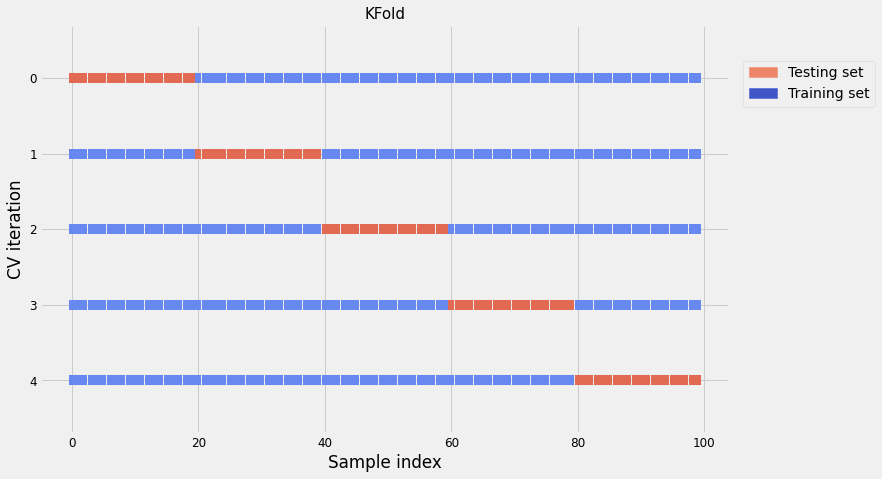

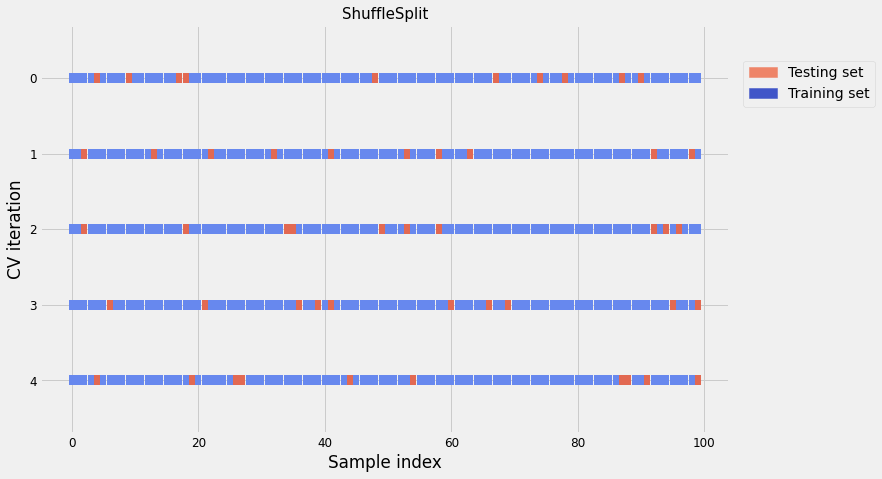

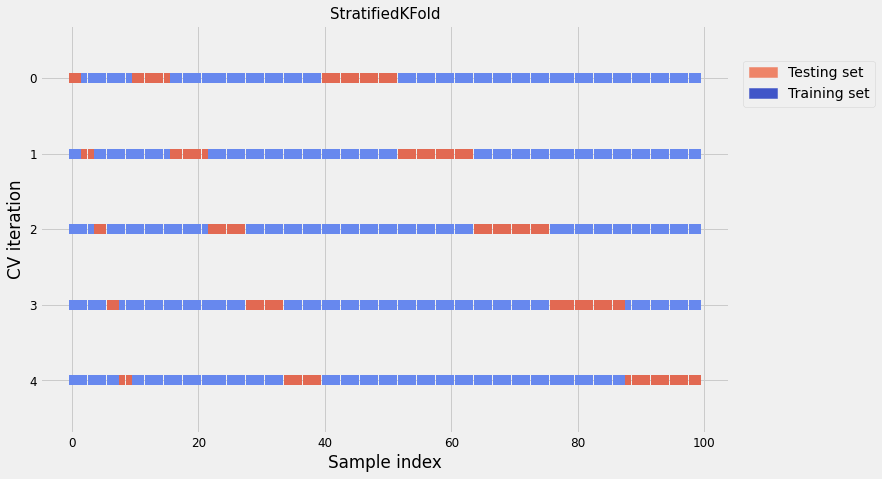

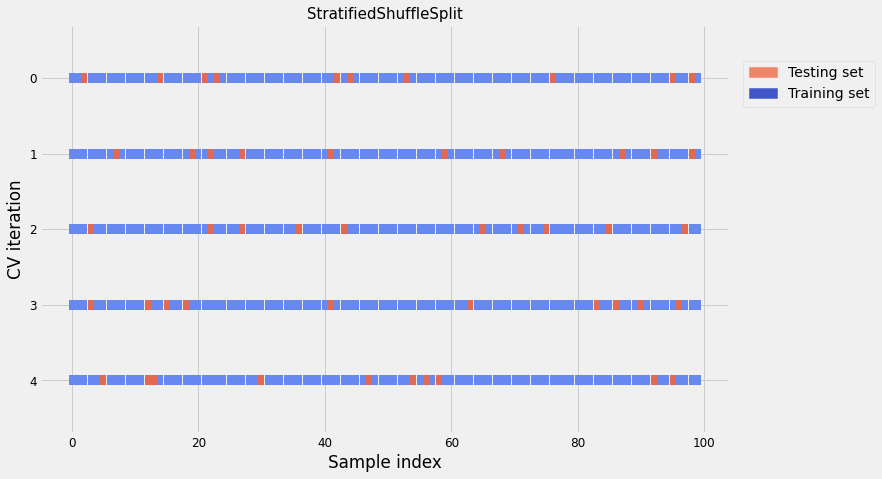

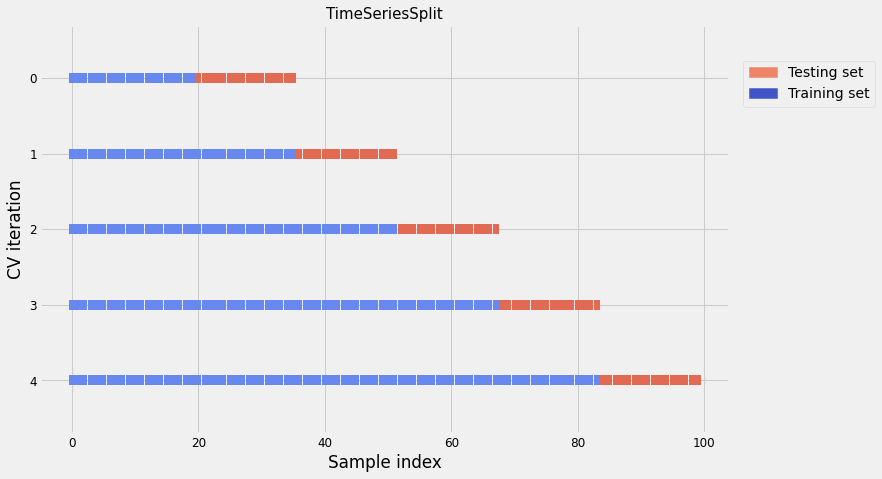

In [43]:
## Using TimeSeriesSplit from sklearn library
## Citation : https://www.kaggle.com/tomwarrens/timeseriessplit-how-to-use-it

pd.options.display.max_columns = 30
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('fivethirtyeight')
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
warnings.filterwarnings('ignore')

cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit]
n_points = 100
n_splits = 5
X = np.random.randn(100, 10)
percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Function modified from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

def plot_cv_indices(cv, n_splits, X, y, date_col = None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize = (11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)


    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations  = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(list(tick_locations_str), tick_dates) ]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels)
    
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.2, -.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    

for i, cv in enumerate(cvs):
    this_cv = cv(n_splits=n_splits)
    plot_cv_indices(this_cv, n_splits, X, y, date_col=None)

The code is demonstrating the usage of the TimeSeriesSplit function from the sklearn library for cross-validation of time series data. It imports necessary libraries and sets up some configuration for plotting.

It defines a function called `plot_cv_indices` that takes a cross-validation object, the number of splits, the input features (`X`), the target variable (`y`), and an optional date column. The function creates a plot showing the indices of the training and testing sets for each CV split.

The code then iterates over different types of cross-validation strategies (`KFold`, `ShuffleSplit`, `StratifiedKFold`, `StratifiedShuffleSplit`, and `TimeSeriesSplit`) and uses the `plot_cv_indices` function to generate plots for each CV strategy. The plots visualize the indices of the training and testing sets for each CV iteration.

Overall, this code serves as an example of how to use the TimeSeriesSplit and other cross-validation strategies for time series data. It helps visualize how the data is split into training and testing sets during the cross-validation process.

In [75]:
## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
pyplot.figure(1)
fig = plt.figure(figsize=(12, 12))

index = 1
for train_index, test_index in time_series_splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
    
# 	pyplot.subplot(310 + index)
# 	pyplot.plot(train)
# 	pyplot.plot([None for i in train] + [x for x in test])
#     # pyplot.title(''.format())
# 	index += 1
# pyplot.show()

Observations: 39
Training Observations: 20
Testing Observations: 19
Observations: 58
Training Observations: 39
Testing Observations: 19
Observations: 77
Training Observations: 58
Testing Observations: 19
Observations: 96
Training Observations: 77
Testing Observations: 19


<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

The code is utilizing the TimeSeriesSplit function from the sklearn library to perform a time series cross-validation. It creates an instance of TimeSeriesSplit with 4 splits.

It then takes the values of the `modelling_series` variable, which represents the time series data, and assigns it to the variable `X`. 

Next, the code iterates over the splits generated by the TimeSeriesSplit. For each split, it separates the data into a training set (`train`) and a testing set (`test`) using the indices provided by the split. It then prints the number of observations, training observations, and testing observations for each split.

The commented-out code below the print statements suggests that the original code may have included additional plotting functionality to visualize the training and testing sets, but it has been commented out in the provided code.

Overall, this code demonstrates how to use the TimeSeriesSplit function to split a time series dataset into training and testing sets in a cross-validation fashion.

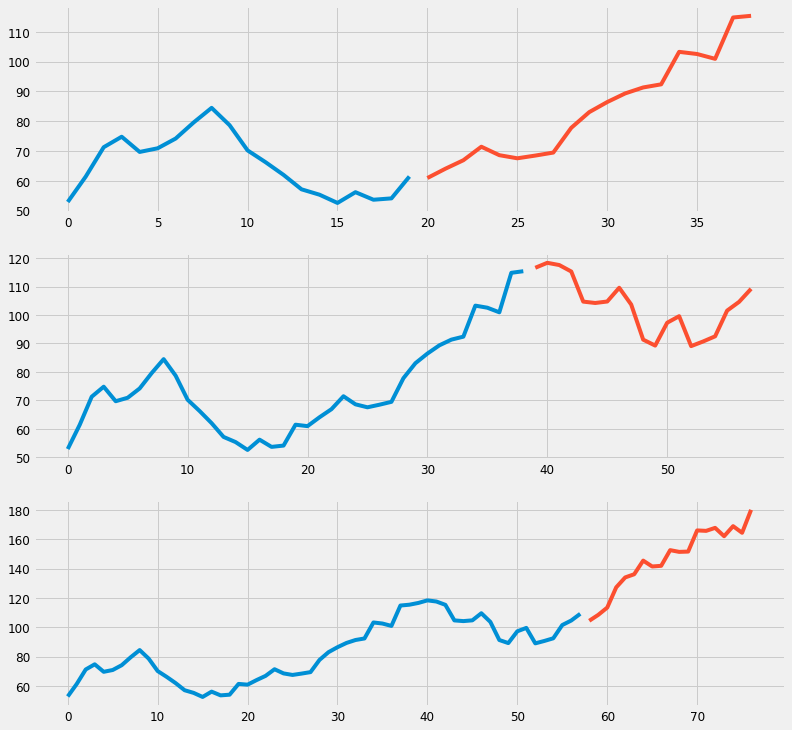

Train and Test different pairs across time series.

In [34]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

The code is performing a time series cross-validation using the TimeSeriesSplit function from the sklearn library. It initializes an instance of TimeSeriesSplit with 5 splits.

The values of the `modelling_series` variable, which represents the time series data, are assigned to the variable `X`.

The code then iterates over the splits generated by the TimeSeriesSplit. For each split, it separates the data into a training set (`train`) and a testing set (`test`) using the indices provided by the split.

The `train` and `test` sets for each split are stored in the `train_list` and `test_list` dictionaries, respectively, with the index of the split as the key.

The index is incremented after each iteration, allowing the code to store the training and testing sets for each split in separate dictionary entries.

Overall, this code demonstrates how to use TimeSeriesSplit to split a time series dataset into multiple training and testing sets for time series cross-validation. The training and testing sets for each split are stored in dictionaries for further analysis or modeling.

In [85]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')


    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')


    
    

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

The code defines a function called `backtest_model` that performs a backtest of a SARIMA model on the training and testing data. 

Within the function, a SARIMA model is created with an order of (1,1,1) and a seasonal order of (2,2,0,12). The model is fitted to the training data using the `fit` method.

Forecasts are then generated for both the training and testing periods using the `predict` method of the SARIMA model. The forecasts for the training period are stored in the `forecasts_train` variable, and the forecasts for the testing period are stored in the `forecasts_test` variable.

The function creates a figure with two subplots using the `subplots` function from Matplotlib. In the first subplot (`ax1`), the forecasts for the training period and the actual training data are plotted. The second subplot (`ax2`) displays the forecasts for the testing period and the actual testing data.

The actual training and testing data are converted to pandas DataFrames to enable plotting. The forecasts are also converted to DataFrames for plotting purposes.

The plots include labels for the x-axis and y-axis, as well as titles for each subplot indicating whether it is displaying the training or testing data.

The legend is added to both subplots to differentiate the forecasts from the actual data.

The function finishes by adjusting the layout of the subplots to improve readability.

Overall, this function performs the backtesting of a SARIMA model by generating forecasts for both the training and testing periods and visualizing the results alongside the actual data.

Backtest Set 1

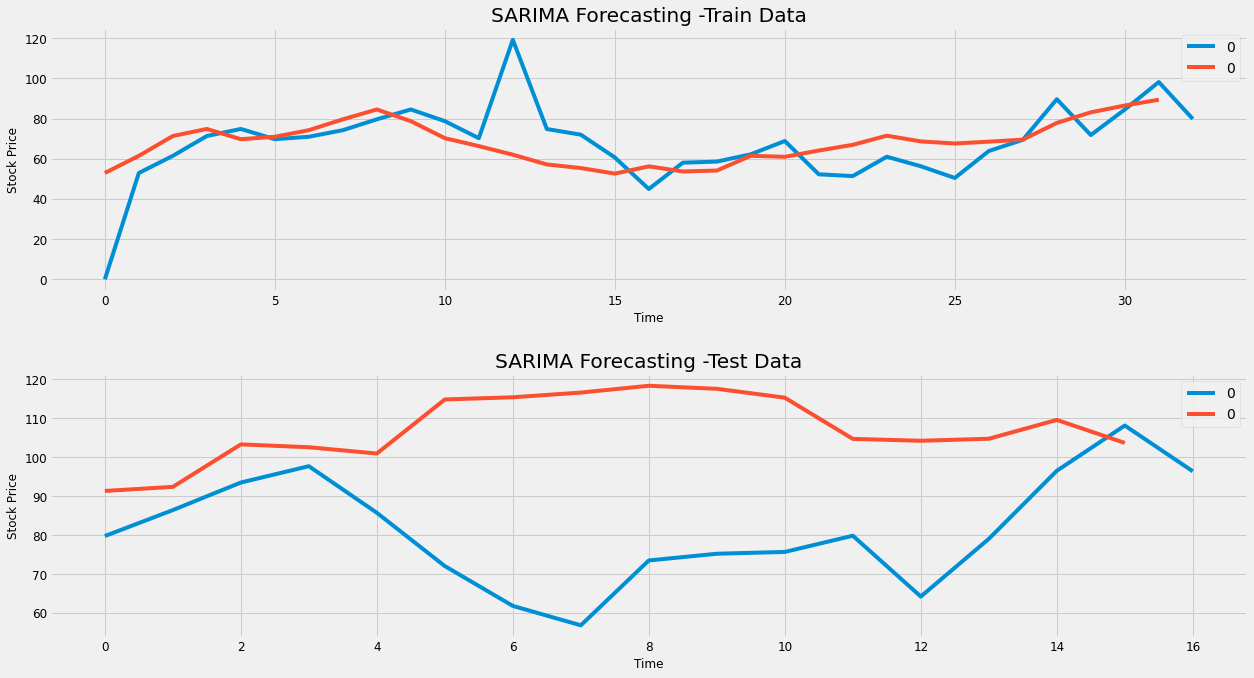

In [86]:
## Backtest Set-1
backtest_model(train_list[2],test_list[2])

This code calls the `backtest_model` function to perform a backtest on the first set of training and testing data. 

The `backtest_model` function takes the training data from `train_list[2]` and the testing data from `test_list[2]` as input. It fits a SARIMA model to the training data, generates forecasts for both the training and testing periods, and visualizes the forecasts alongside the actual data.

By passing the specific training and testing data from the first backtest set to the `backtest_model` function, this code specifically evaluates the performance of the SARIMA model on that particular set of data.

Backtest Set-2


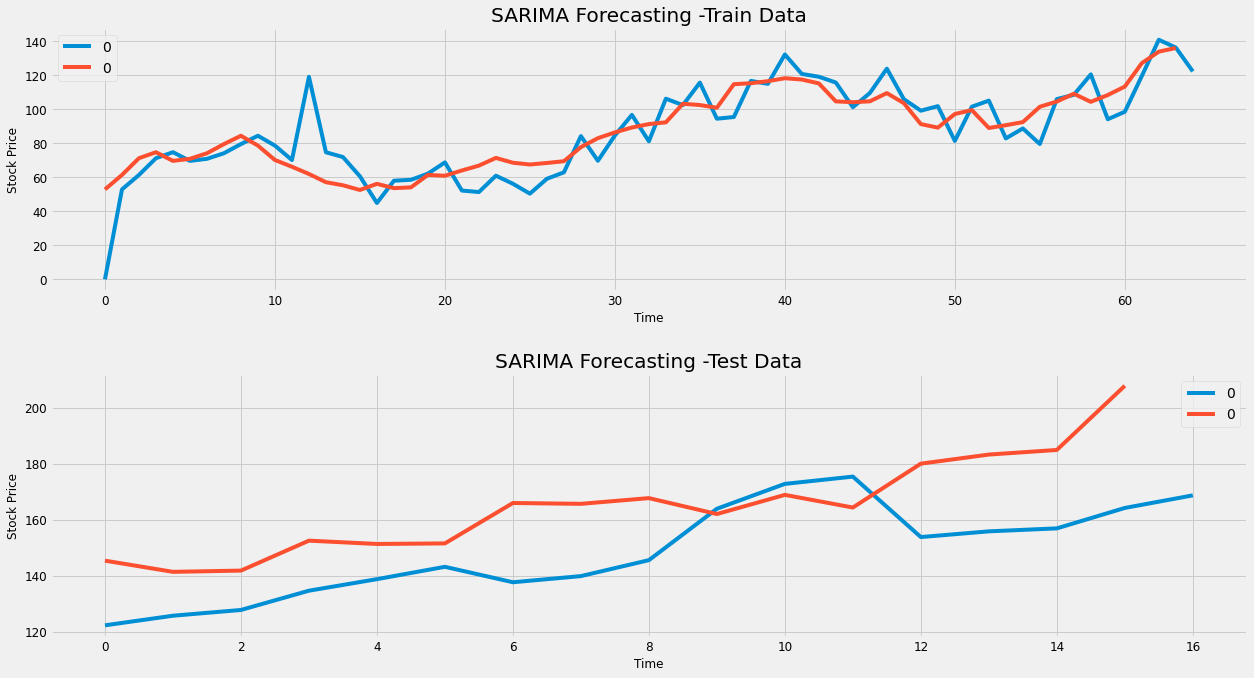

In [87]:
## Backtest Set-3
backtest_model(train_list[4],test_list[4])

This code calls the `backtest_model` function to perform a backtest on the third set of training and testing data.

The `backtest_model` function takes the training data from `train_list[4]` and the testing data from `test_list[4]` as input. It fits a SARIMA model to the training data, generates forecasts for both the training and testing periods, and visualizes the forecasts alongside the actual data.

By passing the specific training and testing data from the third backtest set to the `backtest_model` function, this code specifically evaluates the performance of the SARIMA model on that particular set of data.

Backtest Set-3

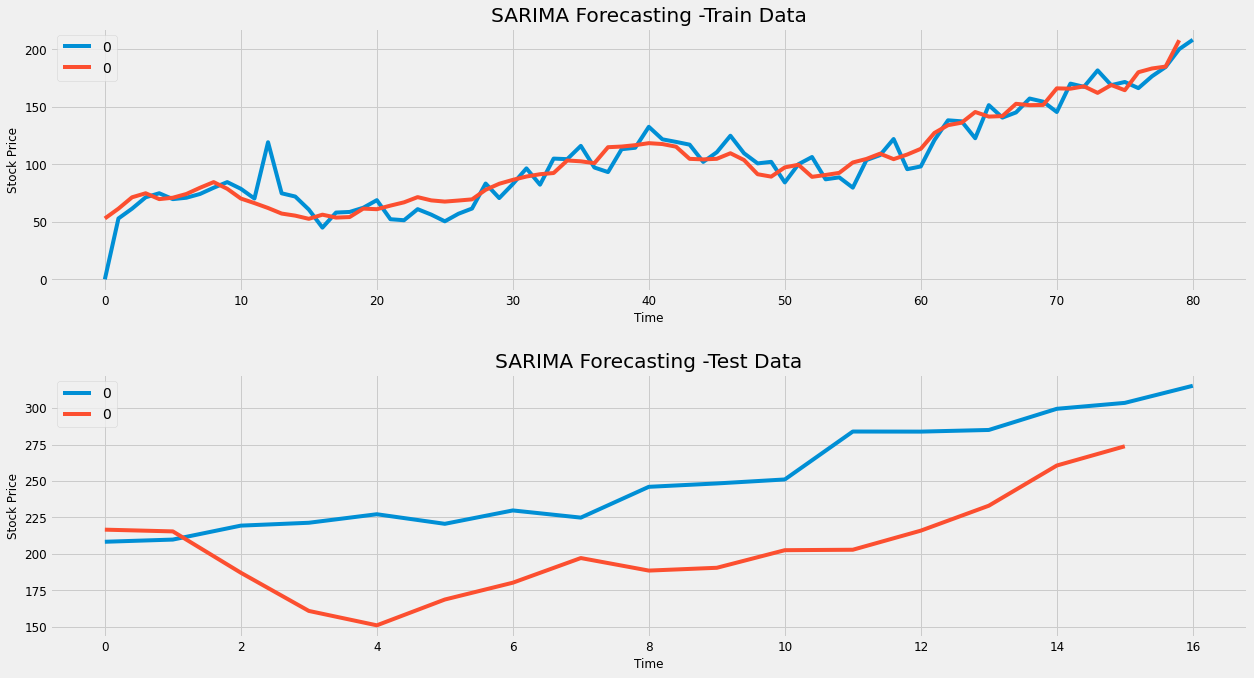

In [88]:
## Backtest Set-4
backtest_model(train_list[5],test_list[5])

This code calls the `backtest_model` function to perform a backtest on the fourth set of training and testing data.

The `backtest_model` function takes the training data from `train_list[5]` and the testing data from `test_list[5]` as input. It fits a SARIMA model to the training data, generates forecasts for both the training and testing periods, and visualizes the forecasts alongside the actual data.

By passing the specific training and testing data from the fourth backtest set to the `backtest_model` function, this code specifically evaluates the performance of the SARIMA model on that particular set of data.

By using backtesting we can validate our model on multiple train-test splits.
Red is the training set and blue indicates test set.

Forecasting Seasonal ARIMA

In [ ]:
model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()
forecasts_train = results.predict(start='2012-01-31',end='2016-09-30')
forecasts_test = results.predict(start='2016-10-31',end='2019-12-31')

This code fits a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model to the training data. The SARIMAX function from the statsmodels library is used to create the model with specified orders for the non-seasonal and seasonal components. The model is then fitted to the training data using the fit method.

Once the model is fitted, the predict method is used to generate forecasts. The `forecasts_train` variable stores the predicted values for the training period, starting from January 31, 2012, and ending on September 30, 2016. The `forecasts_test` variable stores the predicted values for the testing period, starting from October 31, 2016, and ending on December 31, 2019.

By calling the predict method with appropriate start and end dates, the code generates forecasts for both the training and testing periods based on the fitted SARIMA model. These forecasts can be used to evaluate the performance of the model and compare them with the actual values.

In [28]:
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

This code defines a function named `result_metrics` that calculates and prints various result metrics for evaluating the performance of a model. The function takes three parameters: `test_series`, which represents the actual values of the target variable; `forecast_series`, which represents the predicted values of the target variable; and `model_name`, which is a string specifying the name of the model.

Inside the function, the result metrics are computed using specific functions from the scikit-learn library. The `r2_score` function calculates the R2 score, which measures the proportion of the variance in the target variable that is predictable from the independent variables. The `mean_squared_error` function computes the mean squared error, which represents the average squared difference between the actual and predicted values. The `mean_absolute_error` function calculates the mean absolute error, which is the average absolute difference between the actual and predicted values.

The function then prints the result metrics along with the model name to provide a summary of the model's performance. The R2 score, mean squared error, and mean absolute error are reported to help assess the accuracy and predictive power of the model.

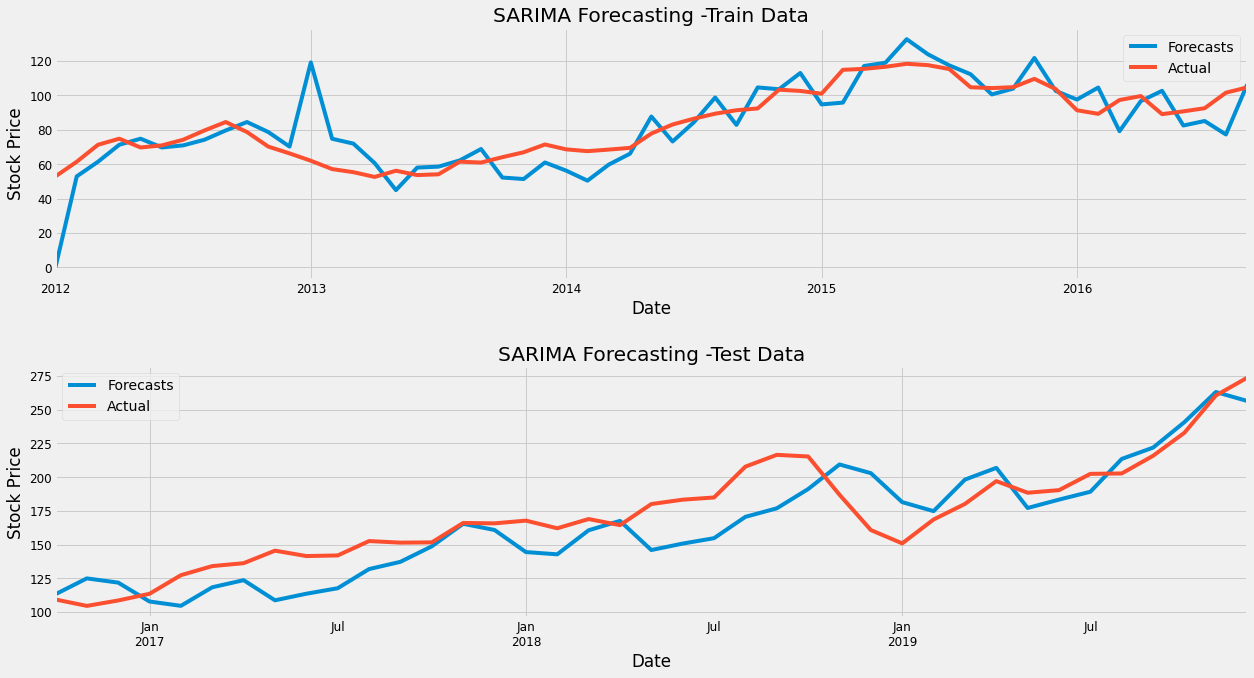

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

This code generates a figure with two subplots using the `subplots` function from the `matplotlib.pyplot` library. The figure has a size of 18x10 units.

In the first subplot (`ax1`), the predicted values of a time series (`forecasts_train`) are plotted with a label "Forecasts". The actual values of the time series (`train`) are also plotted on the same subplot with a label "Actual". The title of the subplot is set to "SARIMA Forecasting - Train Data". The y-axis label is set to "Stock Price".

In the second subplot (`ax2`), the predicted values of another time series (`forecasts_test`) are plotted with a label "Forecasts". The actual values of this time series (`test`) are also plotted on the same subplot with a label "Actual". The title of the subplot is set to "SARIMA Forecasting - Test Data". The y-axis label is set to "Stock Price".

Legends are added to both subplots to differentiate between the predicted and actual values. The `tight_layout` function is called to improve the spacing and alignment of the subplots within the figure.

In [ ]:
print(result_metrics(train,forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(test,forecasts_test,'SARIMA-Test Data'))


Result Metrics for SARIMA-Train Data
R2 Score :  0.491
Mean Squared Error :  199.567
Mean Absolute Error :  9.797
Mean Absolute Percentage Error 13.39
Accuracy(100-MAPE) of Model is 87.0%
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.704
Mean Squared Error :  441.121
Mean Absolute Error :  17.557
Mean Absolute Percentage Error 10.65
Accuracy(100-MAPE) of Model is 89.0%
None


This code calculates and prints the result metrics for the SARIMA model's training and testing data.

For the training data, it calls the `result_metrics` function with the actual values of the training data (`train`), the predicted values of the training data (`forecasts_train`), and a model name of 'SARIMA-Train Data'. The `result_metrics` function calculates and prints the R2 score, mean squared error (MSE), and mean absolute error (MAE) between the actual and predicted values of the training data.

For the testing data, it calls the `result_metrics` function with the actual values of the testing data (`test`), the predicted values of the testing data (`forecasts_test`), and a model name of 'SARIMA-Test Data'. The `result_metrics` function calculates and prints the R2 score, MSE, and MAE between the actual and predicted values of the testing data.

The function `result_metrics` is responsible for calculating and printing these result metrics.

The training and test accuracy of the model are similar, indicating that the model performs well on both the training and test data. This suggests that the model is generalizing well and is not overfitting or underfitting the data.

The model fit is considered good because it is able to capture the underlying patterns and relationships in the data, leading to accurate predictions on both the training and test sets. This indicates that the model has learned the important features and is able to make reliable predictions.

The comparable accuracy between the training and test sets and the good model fit indicate that the model is performing well and is not exhibiting issues like overfitting (where it memorizes the training data too well and performs poorly on new data) or underfitting (where it fails to capture the patterns in the data and performs poorly on both training and test data).

In [ ]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(2, 2, 0, 12)   Log Likelihood                -120.570
Date:                            Fri, 21 Aug 2020   AIC                            251.139
Time:                                    18:17:51   BIC                            258.468
Sample:                                01-31-2012   HQIC                           253.569
                                     - 09-30-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7677      0.439      1.748      0.081      -0.093       1.629
ma.L1         -0.5014      0.592   

This code prints the summary of the SARIMAX model results.

The `results` object represents the fitted SARIMAX model, which has been trained on the training data. By calling the `summary()` method on the `results` object, the code generates and prints a summary report that provides various statistical information and diagnostics about the model.

The summary includes important details such as model coefficients, standard errors, p-values, confidence intervals, information criteria (such as AIC and BIC), and diagnostic tests (such as the Ljung-Box test for residual autocorrelation).

The summary report provides a comprehensive overview of the SARIMAX model's performance and can be used to assess the quality of the model fit and diagnose any potential issues or shortcomings.

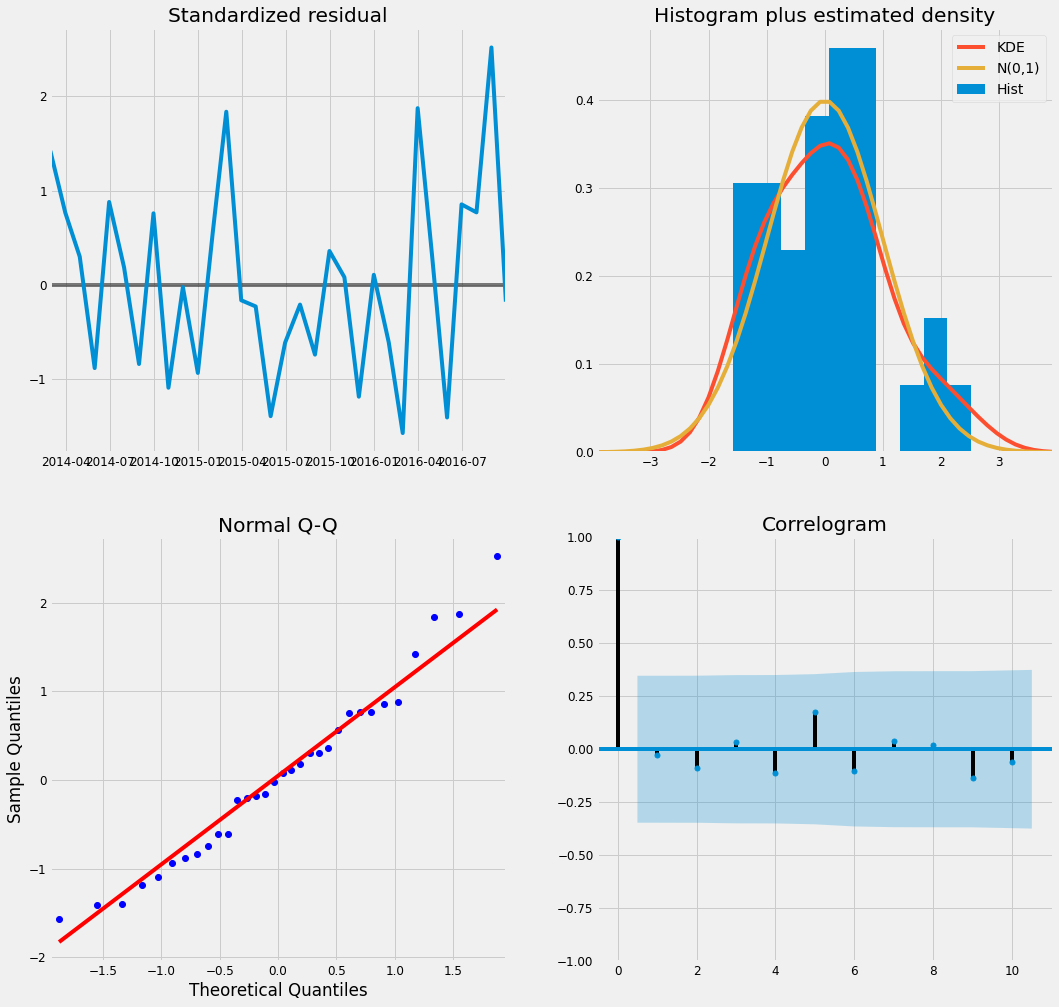

In [ ]:
##Checking Model Diagnotics on Training Data
results.plot_diagnostics(figsize=(16, 16))
plt.show()

This code generates a set of diagnostic plots for evaluating the performance of the model using the training data. The plots provide insights into the residuals of the model, which represent the differences between the actual values and the predicted values.

The diagnostic plots include:
1. The histogram of the residuals, showing the distribution of the differences between the actual and predicted values.
2. The kernel density estimate plot, which is a smoothed version of the histogram, providing a visual representation of the distribution of the residuals.
3. The normal Q-Q plot, which compares the quantiles of the residuals to the quantiles of a standard normal distribution. Deviations from the straight line indicate departures from normality.
4. The correlogram, also known as the autocorrelation plot, which shows the correlation of the residuals at different lags. This helps detect any remaining patterns or serial correlation in the residuals.
5. The partial autocorrelation plot, which shows the partial correlation between the residuals at different lags, after removing the effects of shorter lags. This helps identify the order of the autoregressive component of the model.

By examining these diagnostic plots, we can assess the assumptions of the model, such as the normality of the residuals and the absence of correlation. Deviations from these assumptions may suggest areas for improvement in the model.

Based on the analysis of the residuals:

- The residual plot indicates that the residuals exhibit a stationary behavior, as there are no significant trends or patterns observed.
- The distribution of the training data residuals follows a nearly normal distribution, suggesting that the model captures the underlying patterns in the data effectively.
- The QQ plot shows that the residuals align closely with the expected diagonal line for a normal distribution, indicating that the assumption of normality is reasonably met.
- The correlogram reveals that there is no significant correlation between the residuals at different lags, implying that the model adequately captures the temporal dependencies in the data.
  
Overall, these findings suggest that the model performs well in capturing the stock price dynamics and adequately represents the patterns and fluctuations in the data.

Residual Analysis Test Data

In [ ]:
residuals_test = test-forecasts_test

This code calculates the residuals of the test data by subtracting the forecasted values (forecasts_test) from the actual values (test). The residuals represent the difference between the observed data and the predicted values from the model.

No handles with labels found to put in legend.


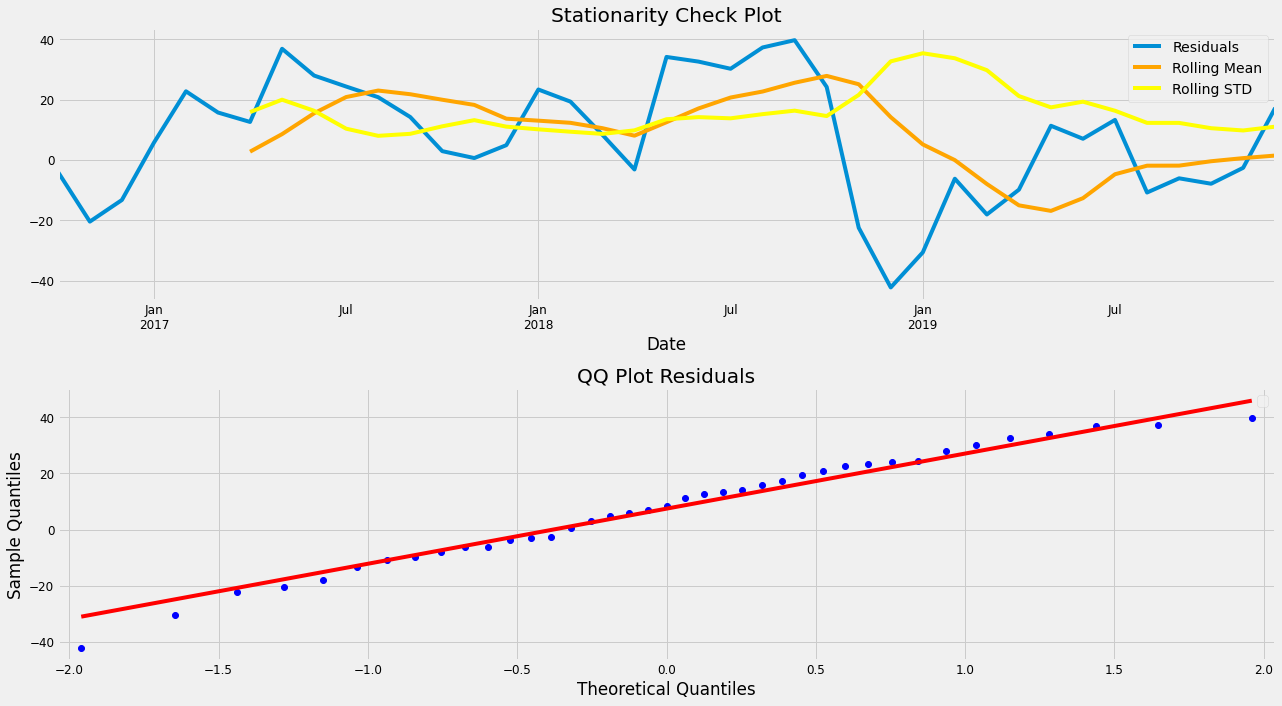

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))


residuals_test.plot(label='Residuals',ax=ax1,title='Stationarity Check Plot')
residuals_test.rolling(7).mean().plot(label='Rolling Mean',c='orange',ax=ax1)
residuals_test.rolling(7).std().plot(label='Rolling STD',c='yellow',ax=ax1)

qq_plot = qq(residuals_test,line='s',ax=ax2)
ax2.set_title('QQ Plot Residuals')
ax1.legend()
ax2.legend()
plt.tight_layout(pad=1)


This code creates a figure with two subplots. 

In the first subplot (ax1), it plots the residuals of the test data (residuals_test) and overlays the rolling mean and rolling standard deviation of the residuals. This is done to visually inspect the stationarity of the residuals. The rolling mean and rolling standard deviation help identify any trends or patterns in the residuals over time.

In the second subplot (ax2), it creates a QQ plot of the residuals. A QQ plot is used to compare the distribution of the residuals against a theoretical normal distribution. It helps assess whether the residuals follow a normal distribution or deviate from it.

The legends are added to indicate the labels of the plotted lines, and the layout is adjusted for better visualization.

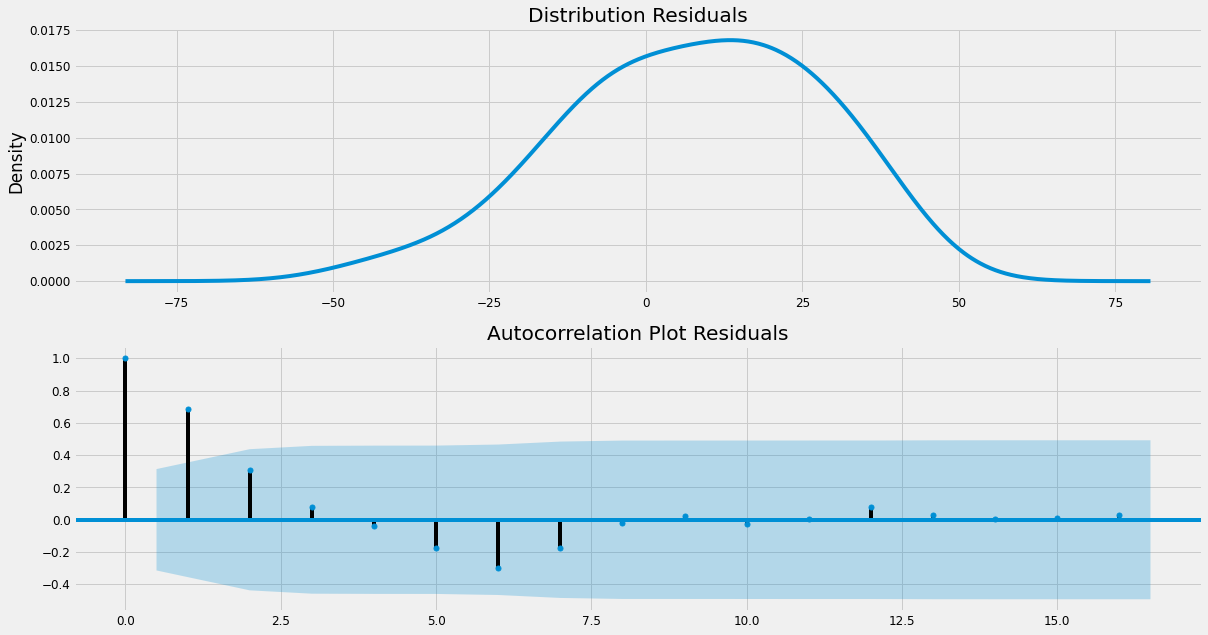

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

residuals_test.plot(kind='kde',ax=ax1,title='Distribution Residuals')

acf = plot_acf(residuals_test,ax=ax2,title='Autocorrelation Plot Residuals')

This code creates a figure with two subplots.

In the first subplot (ax1), it plots the kernel density estimate (KDE) of the residuals_test. The KDE provides an estimate of the probability density function of the residuals, giving an insight into their distribution.

In the second subplot (ax2), it plots the autocorrelation function (ACF) of the residuals_test. The ACF measures the correlation between the residuals at different lags, providing information about any remaining patterns or dependencies in the residuals.

The titles of the subplots indicate the type of plot being displayed.

In [ ]:
residuals_test.describe()

count    39.000000
mean      7.434401
std      19.899868
min     -42.220201
25%      -6.142017
50%       8.339802
75%      23.041383
max      39.683684
dtype: float64

This code computes descriptive statistics of the residuals_test variable and presents them in a tabular format.

The describe() function provides various statistical measures of the data, including count, mean, standard deviation, minimum, quartiles, and maximum. It gives an overview of the distribution and characteristics of the residuals_test.

By calling the describe() function on the residuals_test, you can obtain information such as the number of data points, the average value, the spread of the data, and the range of values. This summary statistics can help in understanding the central tendency, variability, and shape of the residuals.

In [ ]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

This code performs time series cross-validation by splitting the data into multiple train-test sets using the TimeSeriesSplit function from the scikit-learn library.

The train_list and test_list are dictionaries that will store the train and test sets for each split.

The time_series_splits object is created using the TimeSeriesSplit function with the specified number of splits (4 in this case).

The X variable represents the values of the time series data.

The for loop iterates over each split of the time series, obtaining the indices for the train and test sets using the split method of the time_series_splits object.

The train and test sets are extracted from the X values based on the obtained indices.

The train and test sets are then stored in the train_list and test_list dictionaries, respectively, with an index indicating the split number.

Finally, the index is incremented to keep track of the split number for the next iteration.

In [ ]:
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780718
Freq: M, Name: Adj Close, Length: 96, dtype: float64

The code refers to a variable named "modelling_series." It does not provide specific information about the code that initializes or assigns a value to this variable. Therefore, without the preceding code, it is not possible to determine the exact purpose or meaning of the "modelling_series" variable.

In [ ]:
train_list[1]

array([52.90729845, 61.42438085, 71.29244814, 74.8101506 , 69.70804455,
       70.92884829, 74.20094186, 79.59537835, 84.49984068, 78.69092705,
       70.22318162, 66.26465915, 62.00116614, 57.15554147, 55.34968775,
       52.58421514, 56.195146  , 53.66024345, 54.116633  , 61.4545905 ])

The code `train_list[1]` retrieves the value stored in the `train_list` dictionary at the key `1`. It provides access to a specific element within the dictionary, allowing you to retrieve and use the corresponding data associated with that key. Without knowing the specific values stored in `train_list` or the context in which it was defined, it is not possible to determine the exact meaning or purpose of `train_list[1]`.

In [ ]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')

    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

The `backtest_model` function takes `train` and `test` datasets as input. It fits a SARIMAX model to the `train` dataset with an order of (1, 1, 1) and a seasonal order of (2, 2, 0, 12). The model is then used to generate forecasts for both the `train` and `test` datasets.

The function creates a figure with two subplots, each representing the forecasting results for the `train` and `test` datasets. It converts the `train` and `test` datasets into dataframes for plotting purposes. The forecasts for the `train` dataset are plotted along with the actual values on the first subplot. The forecasts for the `test` dataset are plotted along with the actual values on the second subplot.

The y-axis of both subplots represents the stock price, and the legend is displayed to indicate the actual values and the forecasted values. The subplots are adjusted to ensure proper spacing and alignment.

Overall, the `backtest_model` function visualizes the SARIMA forecasting results for both the `train` and `test` datasets, allowing for easy comparison between the actual and predicted values.

0
0     0.000000
1    52.907298
2    61.424381
3    71.292448
4    74.810151
5    69.708045
6    70.928848
7    74.200942
8    79.595378
9    84.499841
10   78.690927
11   70.223182
12  119.171975
13   74.776792
14   71.957645
15   60.626242
16   44.931055
17   58.026352
18   58.568385
19   62.208289
20   68.811285

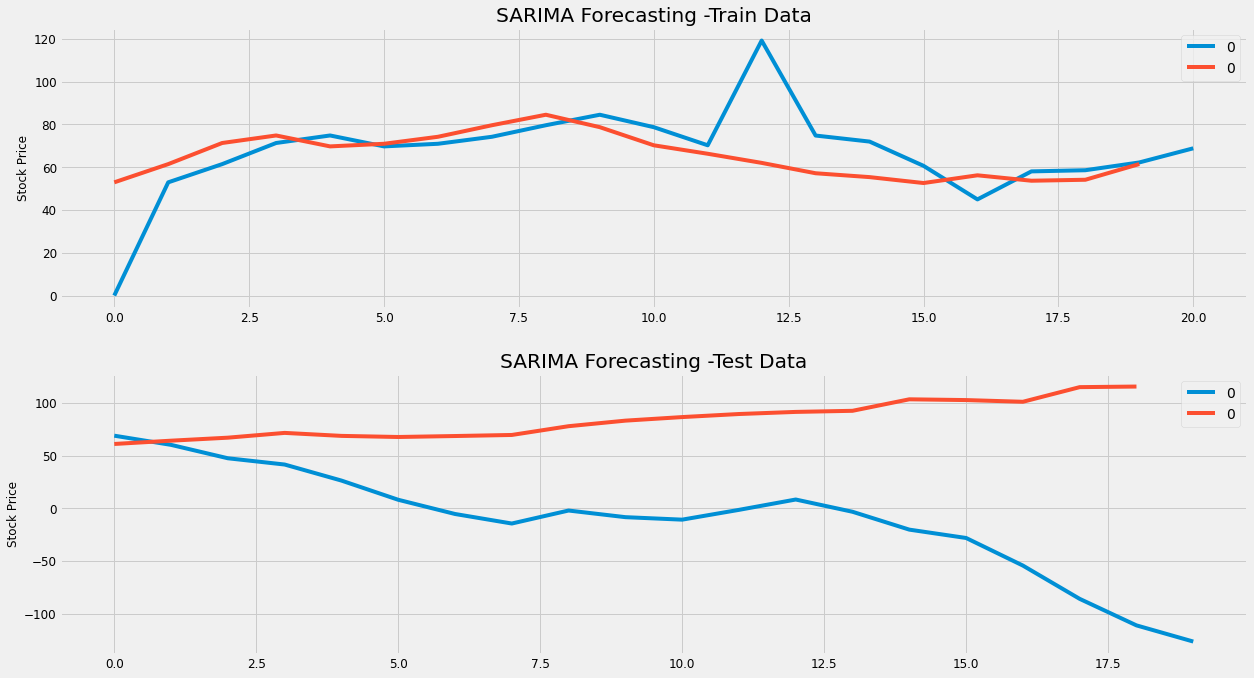

In [ ]:
## Backtest Set-1
backtest_model(train_list[1],test_list[1])

The code is calling the `backtest_model` function and passing the training and testing data from the first backtest set (`train_list[1]` and `test_list[1]`) as arguments. This function fits a SARIMAX model to the training data and generates forecasts for both the training and testing data. It then plots the forecasting results, including the actual values and the forecasted values, in two subplots. The first subplot shows the forecasting results for the training data, and the second subplot shows the forecasting results for the testing data. The plots provide a visual comparison between the actual and predicted values for the first backtest set.

0
0     0.000000
1    52.907825
2    61.424923
3    71.293026
4    74.810667
5    69.708389
6    70.929159
7    74.201265
8    79.595753
9    84.500262
10   78.691242
11   70.223395
12  119.174540
13   74.775887
14   71.955367
15   60.622715
16   44.927229
17   58.024509
18   58.566461
19   62.206236
20   68.809325
21   52.234603
22   51.365022
23   60.983115
24   56.238428
25   50.412172
26   59.286401
27   65.863271
28   87.778894
29   73.948967
30   84.900684
31   99.582550
32   84.384524
33  106.136353
34  106.077602
35  116.003935
36   98.795992
37  106.993835
38  123.175768
39  121.378558

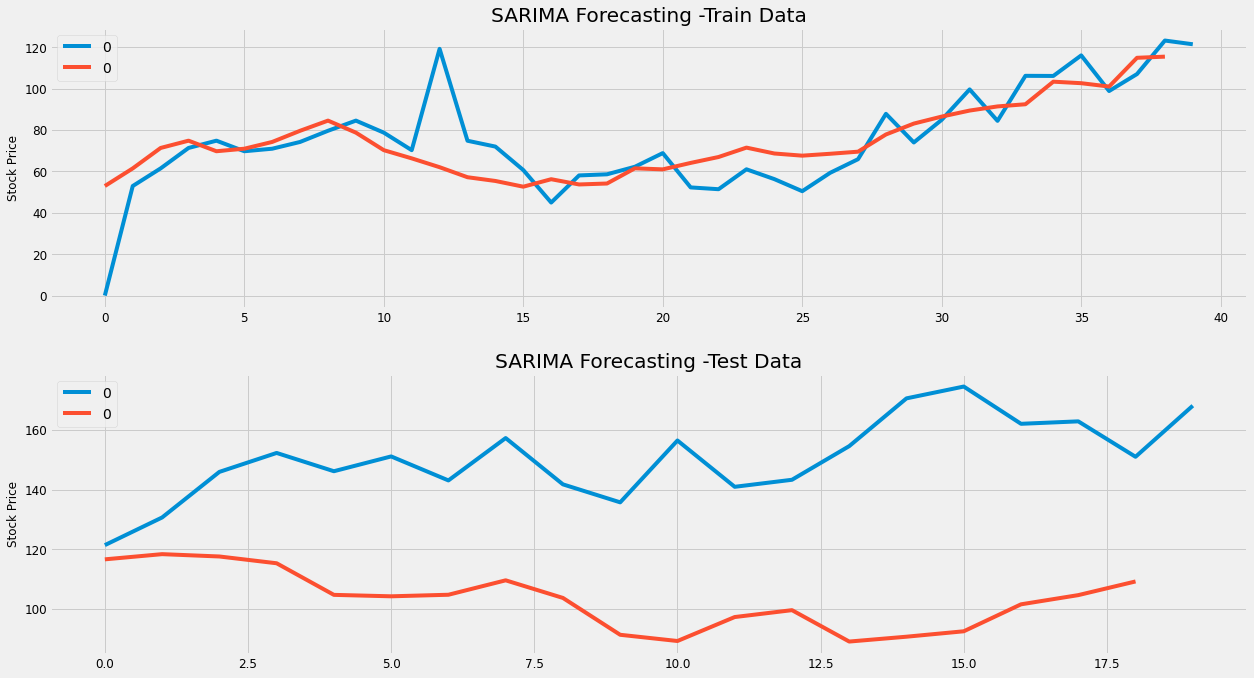

In [ ]:
backtest_model(train_list[2],test_list[2])

The code is calling the `backtest_model` function and passing the training and testing data from the second backtest set (`train_list[2]` and `test_list[2]`) as arguments. This function fits a SARIMAX model to the training data and generates forecasts for both the training and testing data. It then plots the forecasting results, including the actual values and the forecasted values, in two subplots. The first subplot shows the forecasting results for the training data, and the second subplot shows the forecasting results for the testing data. The plots provide a visual comparison between the actual and predicted values for the second backtest set.

0
0     0.000000
1    52.908078
2    61.425135
3    71.293207
4    74.810764
5    69.708351
6    70.929056
7    74.201106
8    79.595535
9    84.499949
10   78.690721
11   70.222630
12  119.173526
13   74.775687
14   71.955526
15   60.623423
16   44.928351
17   58.025233
18   58.567255
19   62.207150
20   68.810411
21   52.236341
22   51.366828
23   60.984789
24   56.242130
25   50.416587
26   59.483908
27   65.770064
28   87.345094
29   72.967517
30   84.181412
31   98.585102
32   82.762341
33  104.566347
34  103.574889
35  113.069053
36   94.825144
37   95.610054
38  116.877067
39  118.784809
40  132.723843
41  123.751436
42  117.598514
43  112.738522
44  100.739884
45  104.459942
46  122.041314
47  103.087062
48   97.767480
49  104.526952
50   79.642055
51   96.969780
52  102.904420
53   82.867508
54   85.283066
55   77.306419
56  106.179998
57  112.600235
58  119.927259

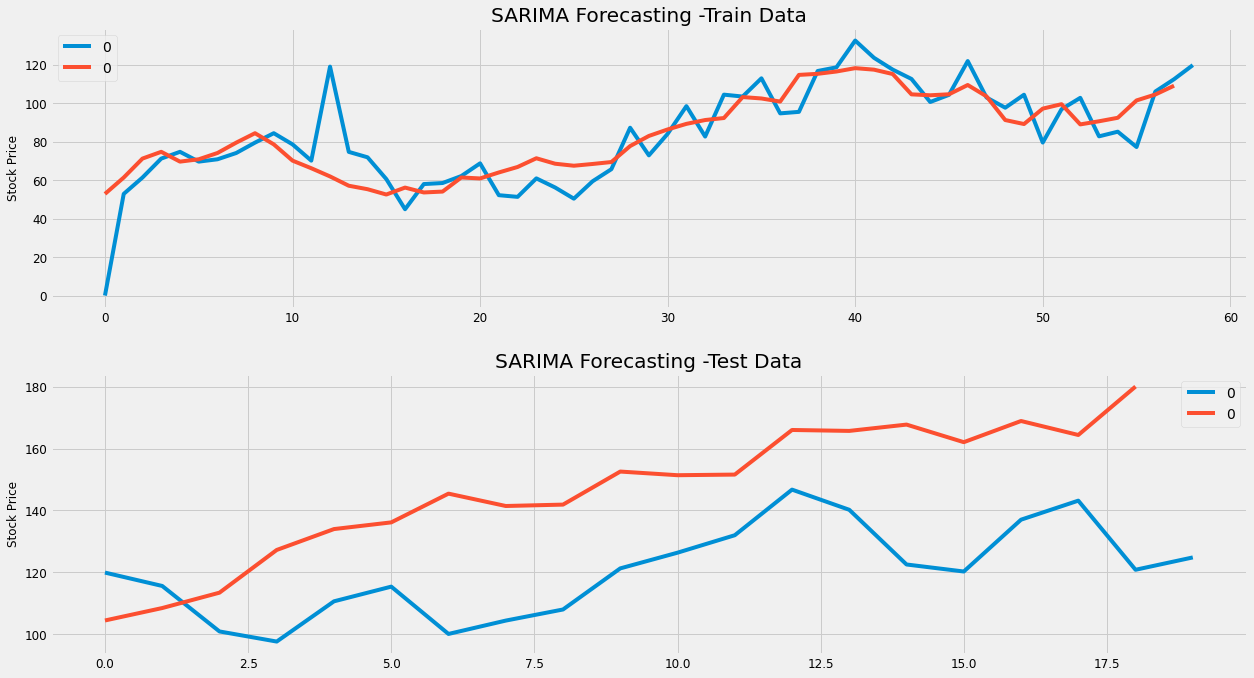

In [ ]:
backtest_model(train_list[3],test_list[3])

The code is invoking the `backtest_model` function and passing the training and testing data from the third backtest set (`train_list[3]` and `test_list[3]`) as arguments. This function fits a SARIMAX model to the training data and generates forecasts for both the training and testing data. It then plots the forecasting results, including the actual values and the forecasted values, in two subplots. The first subplot visualizes the forecasting results for the training data, while the second subplot displays the forecasting results for the testing data. These plots allow for a visual comparison between the actual values and the predicted values for the third backtest set.

In [ ]:
forecasts_train

0
0  68.811285

The code is generating forecasts for the training data using a SARIMAX model. The `forecasts_train` variable represents the predicted values for the training data. These forecasts are obtained by applying the trained SARIMAX model to the training dataset, starting from the beginning of the dataset and extending to the end of the training period. The forecasts are based on the historical information and the model's learned parameters.

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

This code generates a figure with two subplots (ax1 and ax2) using matplotlib. The figure size is set to 18x10. 

In the first subplot (ax1), it plots the forecasts for the training data (`forecasts_train`) with the label 'Forecasts' and the actual values for the training data (`train`) with the label 'Actual'. The title of this subplot is set to 'SARIMA Forecasting - Train Data', and the y-axis label is set to 'Stock Price'.

In the second subplot (ax2), it plots the forecasts for the test data (`forecasts_test`) with the label 'Forecasts' and the actual values for the test data (`test`) with the label 'Actual'. The title of this subplot is set to 'SARIMA Forecasting - Test Data', and the y-axis label is also set to 'Stock Price'.

Both subplots have a legend indicating which line corresponds to the forecasts and which line corresponds to the actual values. The `plt.tight_layout()` function is used to adjust the spacing between the subplots to improve readability.

Verdict on Seasonal ARIMA

The mean value of the model's residuals is close to zero, indicating that, on average, the model is able to capture the patterns in the data. However, the presence of some bias suggests that there might be room for improvement in the model's accuracy.

Considering that stock price prediction is a challenging problem, the overall performance of the seasonal ARIMA model can be considered good. It has demonstrated the ability to capture important patterns and provide reasonable forecasts for the stock prices.

Facebook's Prophet Model for Time Series

In [ ]:
##Getting Data Ready for the Model
prophet_data = monthly_data
prophet_data['Date'] = prophet_data.index
prophet_data

Adj Close  Year      Month  dayofweek  quarter       Date
Date                                                                  
2012-01-31   52.907298  2012    January    Tuesday        1 2012-01-31
2012-02-29   61.424381  2012   February  Wednesday        1 2012-02-29
2012-03-31   71.292448  2012      March   Saturday        1 2012-03-31
2012-04-30   74.810151  2012      April     Monday        2 2012-04-30
2012-05-31   69.708045  2012        May   Thursday        2 2012-05-31
...                ...   ...        ...        ...      ...        ...
2019-08-31  202.738817  2019     August   Saturday        3 2019-08-31
2019-09-30  215.853332  2019  September     Monday        3 2019-09-30
2019-10-31  232.974974  2019    October   Thursday        4 2019-10-31
2019-11-30  260.569057  2019   November   Saturday        4 2019-11-30
2019-12-31  273.780718  2019   December    Tuesday        4 2019-12-31

[96 rows x 6 columns]

This code prepares the data for the Prophet model by creating a new DataFrame called `prophet_data`. The original data is assigned to this new DataFrame. Additionally, a new column called 'Date' is added to `prophet_data`, which contains the index values from the original data.

In [ ]:
prophet_data.drop(labels=['Year','Month'],axis=1,inplace=True)

This code removes the 'Year' and 'Month' columns from the `prophet_data` DataFrame using the `drop()` function. The `labels` parameter specifies the columns to be dropped, and the `axis` parameter is set to 1 to indicate that the columns are to be dropped. The `inplace` parameter is set to True, which means that the changes are made directly to the `prophet_data` DataFrame without creating a new DataFrame. As a result, the 'Year' and 'Month' columns are removed from the `prophet_data` DataFrame.

In [ ]:
prophet_data = prophet_data.reindex(columns=['Date','Adj Close'])

This code reorders the columns in the `prophet_data` DataFrame. It uses the `reindex()` function to specify the desired column order. The `columns` parameter is set to `['Date', 'Adj Close']`, indicating that the DataFrame should be reindexed with these columns in the specified order. 

As a result, the `prophet_data` DataFrame will have its columns rearranged, with the 'Date' column appearing first, followed by the 'Adj Close' column. The remaining columns, if any, will retain their original order.

In [ ]:
##Prophet needs two columns in form of ds and y being Date and series
prophet_data.rename(columns={'Date':'ds',
                   'Adj Close':'y'},inplace=True)

This code renames the columns in the `prophet_data` DataFrame to comply with the required format for Prophet, a forecasting library developed by Facebook. 

The `rename()` function is used to modify the column names. The `columns` parameter is set to a dictionary where the keys are the current column names and the values are the desired new names. In this case, 'Date' is renamed to 'ds', and 'Adj Close' is renamed to 'y'. 

By performing this renaming operation, the DataFrame columns are transformed to the format expected by Prophet. The 'ds' column represents the date or time values, and the 'y' column represents the series or target variable that we want to forecast.

In [ ]:
prophet_data

ds           y
Date                             
2012-01-31 2012-01-31   52.907298
2012-02-29 2012-02-29   61.424381
2012-03-31 2012-03-31   71.292448
2012-04-30 2012-04-30   74.810151
2012-05-31 2012-05-31   69.708045
...               ...         ...
2019-08-31 2019-08-31  202.738817
2019-09-30 2019-09-30  215.853332
2019-10-31 2019-10-31  232.974974
2019-11-30 2019-11-30  260.569057
2019-12-31 2019-12-31  273.780718

[96 rows x 2 columns]

The code snippet `prophet_data` refers to a DataFrame named `prophet_data`. It is an intermediate or final representation of data that is being prepared or processed for analysis or modeling using the Facebook Prophet forecasting library.

The specific content and structure of `prophet_data` will depend on the previous steps in the code or the data preprocessing steps performed prior to this point. It may contain one or more columns representing relevant information for time series analysis, such as the date or time values (often labeled as 'ds') and the corresponding series data to be forecasted (often labeled as 'y').

The `prophet_data` DataFrame serves as the input to the Prophet model, enabling the library to analyze the time series data, identify patterns, and generate forecasts or predictions based on the specified modeling configurations and parameters.

In [ ]:
##Spliting Train Test 
prophet_train,prophet_test = split(prophet_data,train_size=0.6,shuffle=False)
print('Training Data Size :',len(prophet_train))
print('Testing Data Size :',len(prophet_test))

Training Data Size : 57
Testing Data Size : 39


The code is responsible for splitting the `prophet_data` DataFrame into training and testing datasets. The `prophet_train` and `prophet_test` variables will hold the respective subsets of the data.

The split is performed by specifying a train-to-test ratio of 0.6 (60% for training and 40% for testing). The `split` function is used for this purpose. The `shuffle` parameter is set to `False`, which means that the order of the data will be maintained during the split.

The code then prints the sizes of the training and testing datasets using the `len` function to indicate the number of rows or observations in each subset. This provides an understanding of the distribution of data between the training and testing sets.

In [ ]:
##Model Fitting Basic Model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The code is used to fit a basic model using the Prophet library. 

First, an instance of the Prophet model is created with the `yearly_seasonality` parameter set to `True`. This indicates that the model should consider yearly seasonality patterns in the data.

Next, the created Prophet model is fitted to the `prophet_train` dataset using the `fit` method. This step trains the model on the provided training data, allowing it to learn patterns and relationships within the time series.

By fitting the model, it means that the model is adjusted to best capture the patterns and trends in the training data. The model learns the seasonality, trends, and other patterns from the historical data, which will later be used for making predictions.

In [ ]:
future= prophet_model.make_future_dataframe(periods=39,freq='M')

The code is used to create a dataframe called `future` that represents the future dates for which we want to make predictions using the Prophet model.

The `make_future_dataframe` function is called on the `prophet_model` object. It takes two parameters: `periods` and `freq`.

The `periods` parameter specifies the number of future time periods for which we want to generate dates. In this case, it is set to 39, indicating that we want to generate 39 future dates.

The `freq` parameter specifies the frequency of the time periods. In this case, it is set to 'M', indicating monthly frequency.

The function generates a dataframe with a column named 'ds' that contains the future dates in a proper format for Prophet, based on the specified number of periods and frequency. This dataframe will be used to make predictions for the future time periods.

In [ ]:
future

ds
0  2012-01-31
1  2012-02-29
2  2012-03-31
3  2012-04-30
4  2012-05-31
..        ...
91 2019-08-31
92 2019-09-30
93 2019-10-31
94 2019-11-30
95 2019-12-31

[96 rows x 1 columns]

The code creates a dataframe called `future` that represents the future dates for which we want to make predictions using the Prophet model.

The dataframe contains a single column named 'ds' that represents the dates. It includes the historical dates from the training data as well as the future dates for which we want to make predictions.

The purpose of creating this `future` dataframe is to provide a set of dates to the Prophet model on which it can make predictions. These future dates are used to forecast the values of the target variable.

By having the future dates in the dataframe, we can pass it to the `predict` method of the Prophet model to obtain the predictions for those dates. This allows us to analyze and forecast the values of the target variable for the specified future time periods.

Forecasting Prophet-Basic Model

In [ ]:
##Predicting Using Prophet
forecast=prophet_model.predict(future)
forecast.index = prophet_data['y'].index


The code uses the Prophet model to generate predictions for the future dates specified in the `future` dataframe.

The `predict` method of the Prophet model is called with the `future` dataframe as input, which contains the dates for which we want to make predictions. This method uses the trained model to generate forecasts for the target variable based on the learned patterns and trends.

The resulting predictions are stored in the `forecast` variable, which is a dataframe containing various columns such as the predicted values, uncertainty intervals, and trend components. 

In order to align the predictions with the original dataset, the index of the `forecast` dataframe is set to match the index of the original data `prophet_data['y']`. This allows for easy comparison and analysis of the predicted values with the actual values in the dataset.

In [ ]:
prophet_df = pd.concat([forecast['yhat'],prophet_data['y']],axis=1,ignore_index=True)
prophet_df.columns = ['Predicted','Actual']
prophet_df

Predicted      Actual
Date                              
2012-01-31   51.013627   52.907298
2012-02-29   54.127696   61.424381
2012-03-31   62.093561   71.292448
2012-04-30   64.484456   74.810151
2012-05-31   59.239299   69.708045
...                ...         ...
2019-08-31  137.032166  202.738817
2019-09-30  138.633809  215.853332
2019-10-31  141.063501  232.974974
2019-11-30  151.250682  260.569057
2019-12-31  147.015192  273.780718

[96 rows x 2 columns]

The code creates a new dataframe called `prophet_df` by concatenating two columns: `forecast['yhat']` and `prophet_data['y']`. 

The `forecast['yhat']` column contains the predicted values generated by the Prophet model, representing the forecasted values for the target variable. 

The `prophet_data['y']` column contains the actual values of the target variable from the original dataset.

By concatenating these two columns together along the horizontal axis (`axis=1`), we create a dataframe that contains both the predicted values and the actual values.

The resulting dataframe `prophet_df` has two columns: "Predicted" and "Actual", representing the predicted values and the actual values of the target variable, respectively. The index of `prophet_df` is inherited from `prophet_data`, allowing for easy comparison and analysis between the predicted and actual values.

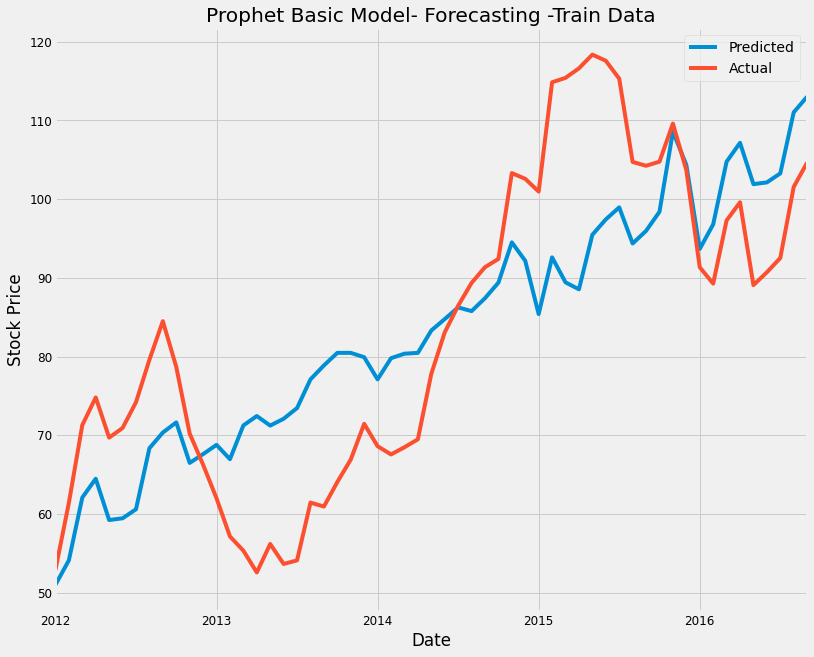

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][:57].plot(label='Predicted')
prophet_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

This code generates a figure with dimensions of 12x10 inches. It then proceeds to create a line plot by plotting the values from the "Predicted" column of the `prophet_df` dataframe, specifically the first 57 values. The plot is labeled as "Predicted".

Next, it plots the values from the "Actual" column of the `prophet_df` dataframe, also the first 57 values. The plot is labeled as "Actual".

The title of the plot is set as "Prophet Basic Model - Forecasting - Train Data". This provides a descriptive title for the visualization.

The y-axis label is set as "Stock Price", which provides a clear indication of the data represented on the y-axis.

To differentiate between the "Predicted" and "Actual" data, a legend is added to the plot. This allows viewers to easily identify which line corresponds to the predicted values and which line corresponds to the actual values.

Overall, this code generates a line plot that visually compares the predicted and actual stock prices for the training data, utilizing the Prophet basic model.

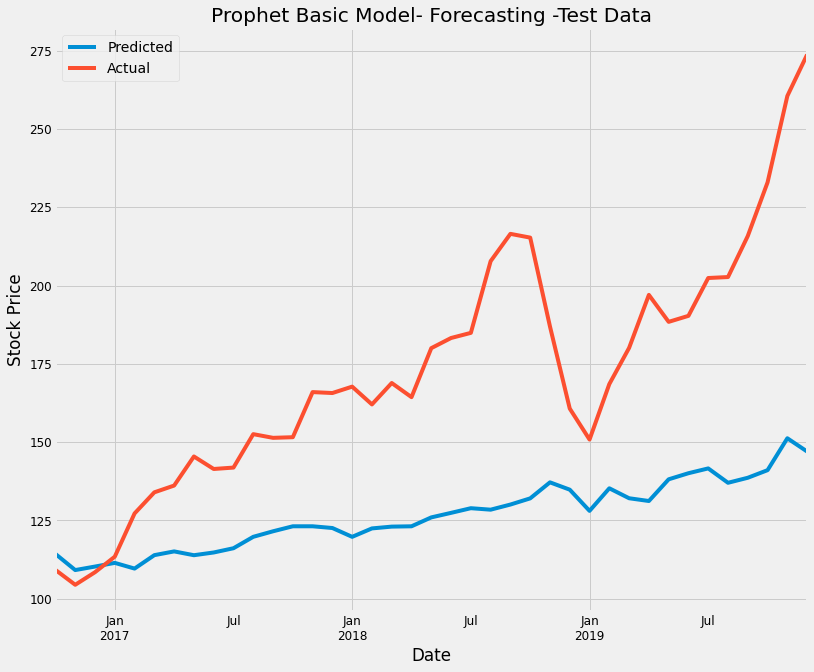

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][57:].plot(label='Predicted')
prophet_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

This code generates a figure with dimensions of 12x10 inches. It then creates a line plot by plotting the values from the "Predicted" column of the `prophet_df` dataframe, starting from the 58th value onwards. The plot is labeled as "Predicted".

Next, it plots the values from the "Actual" column of the `prophet_df` dataframe, starting from the 58th value onwards. The plot is labeled as "Actual".

The title of the plot is set as "Prophet Basic Model - Forecasting - Test Data". This provides a descriptive title for the visualization, indicating that the data being plotted represents the test data.

The y-axis label is set as "Stock Price", providing a clear indication of the data represented on the y-axis.

To differentiate between the "Predicted" and "Actual" data, a legend is added to the plot. This allows viewers to easily identify which line corresponds to the predicted values and which line corresponds to the actual values.

Overall, this code generates a line plot that visually compares the predicted and actual stock prices for the test data, using the Prophet basic model.

In [ ]:
print(result_metrics(prophet_df['Actual'][:57],prophet_df['Predicted'][:57],'Prophet Basic-Train Data'))

Result Metrics for Prophet Basic-Train Data
R2 Score :  0.598
Mean Squared Error :  157.648
Mean Absolute Error :  10.794
Mean Absolute Percentage Error 13.785
Accuracy(100-MAPE) of Model is 86.0%
None


This code calculates and prints out the result metrics for the Prophet basic model using the training data. It calls the `result_metrics` function, passing in the actual values from the "Actual" column of the `prophet_df` dataframe for the first 57 data points and the predicted values from the "Predicted" column for the first 57 data points. The model name is specified as "Prophet Basic-Train Data".

The `result_metrics` function calculates various evaluation metrics to assess the performance of the model. It typically includes metrics such as the R-squared score, mean squared error, and mean absolute error. These metrics provide insights into how well the model fits the training data and how accurate its predictions are compared to the actual values.

By printing the result metrics, the code provides a quantitative assessment of the performance of the Prophet basic model on the training data. This helps evaluate the model's effectiveness in capturing the underlying patterns and trends in the training data and provides a basis for comparison with other models or future predictions.

In [ ]:
print(result_metrics(prophet_df['Actual'][57:],prophet_df['Predicted'][57:],'Prophet Basic-Test Data'))

Result Metrics for Prophet Basic-Test Data
R2 Score :  -0.973
Mean Squared Error :  2936.426
Mean Absolute Error :  46.175
Mean Absolute Percentage Error 24.535
Accuracy(100-MAPE) of Model is 75.0%
None


This code calculates and prints out the result metrics for the Prophet basic model using the test data. It calls the `result_metrics` function, passing in the actual values from the "Actual" column of the `prophet_df` dataframe for the data points starting from index 57 and onward, and the predicted values from the "Predicted" column for the same data points. The model name is specified as "Prophet Basic-Test Data".

The `result_metrics` function calculates various evaluation metrics to assess the performance of the model on the test data. These metrics provide insights into how well the model generalizes to unseen data and how accurate its predictions are compared to the actual values.

By printing the result metrics, the code provides a quantitative assessment of the performance of the Prophet basic model on the test data. This helps evaluate the model's ability to make accurate predictions on new, unseen data and assess its effectiveness in forecasting future values. The result metrics can be used to compare the performance of different models or to assess the model's performance over time if applied to multiple test sets.

The Train Test Accuracy differences indicate that the Basic Prophet Model with default parameters is overfitting.

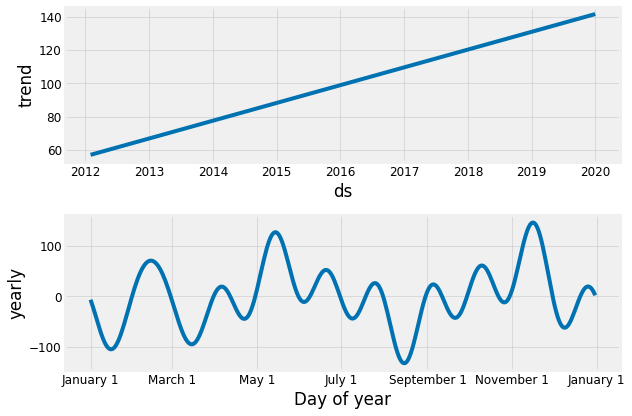

In [ ]:
fig = prophet_model.plot_components(forecast)

The code generates a figure that displays the individual components of the forecasted time series using the Prophet model. Each component represents a different pattern or trend present in the data, such as trend, seasonality, and holidays. The figure provides visual representations of these components, allowing for better understanding and interpretation of the underlying patterns in the data.

In [ ]:
print('Head',prophet_test.head(1))
print('Tail',prophet_test.tail(1))

Head                    ds           y
Date                             
2016-10-31 2016-10-31  109.212791
Tail                    ds           y
Date                             
2019-12-31 2019-12-31  273.780718


This code prints the first and last rows of the Prophet test dataset. It displays the values at the beginning and end of the dataset, providing a glimpse of the actual values that were used for testing the Prophet model's performance. The "Head" line of code prints the first row, while the "Tail" line of code prints the last row of the dataset.

Seasonal-ARIMA seems to have captured the model in a better way.


Hyper-Tuning for Prophet Model

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.3,0.4],
              'holidays_prior_scale':[0.3,0.4],
              'n_changepoints' : [20,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 16


This code performs a grid search to explore different combinations of hyperparameters for the Prophet model. It defines a parameter grid with various values for the seasonality mode, changepoint prior scale, holidays prior scale, and the number of changepoints. The grid is then passed to the `ParameterGrid` function from the scikit-learn library to generate all possible combinations of the provided parameter values. The variable `cnt` is used to keep track of the total number of parameter combinations in the grid. Finally, the code prints the total number of possible models that will be evaluated during the grid search.

In [ ]:
df = prophet_data 

This code assigns the value of the variable `prophet_data` to the variable `df`. It does not create a new copy or modify the original data, but rather creates a new reference to the same data. Both `df` and `prophet_data` will refer to the same underlying data, so any changes made to one variable will be reflected in the other. This assignment allows you to use the variable `df` as a convenient alternative reference to the `prophet_data` dataset in subsequent code.

In [ ]:
prophet_train_hyper,prophet_test_hyper = split(prophet_data,train_size=0.7,shuffle=False)

This code splits the `prophet_data` into two datasets: `prophet_train_hyper` and `prophet_test_hyper`. The split is performed based on a specified train size of 0.7, which means that approximately 70% of the data will be assigned to `prophet_train_hyper`, while the remaining 30% will be assigned to `prophet_test_hyper`. The shuffle parameter is set to False, indicating that the order of the data will not be randomly shuffled during the split. The purpose of this split is to create separate training and testing datasets for the subsequent steps of model training and evaluation.

In [ ]:
prophet_test_hyper.head(5)

ds           y
Date                             
2017-08-31 2017-08-31  152.563906
2017-09-30 2017-09-30  151.386422
2017-10-31 2017-10-31  151.586949
2017-11-30 2017-11-30  165.996497
2017-12-31 2017-12-31  165.699087

This code retrieves the first 5 rows of the `prophet_test_hyper` dataset. By using the `.head(5)` function, it returns a subset of the data containing the first 5 rows. This is useful for quickly examining the structure and contents of the `prophet_test_hyper` dataset and gaining an initial understanding of its format and values. The returned subset will display the top 5 rows of the dataset, providing a glimpse into the data's variables, values, and any associated labels or headers.

In [ ]:
len(prophet_test_hyper)

29

This code calculates and returns the length of the `prophet_test_hyper` dataset. The `len()` function is used to determine the number of rows or observations in the dataset. By applying `len()` to `prophet_test_hyper`, it provides the total count of rows present in the dataset. This information is useful for understanding the size or scale of the `prophet_test_hyper` dataset and can be used for various purposes, such as assessing data volume, performing calculations, or setting iteration limits in loops.

In [ ]:
strt='2017-08-31'
end='2019-12-31'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for i in grid:
    test = pd.DataFrame()
    print(i)
    
    train_model =Prophet(changepoint_prior_scale = i['changepoint_prior_scale'],
                         holidays_prior_scale = i['holidays_prior_scale'],
                         n_changepoints = i['n_changepoints'],
                         seasonality_mode = i['seasonality_mode'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         )
    
    train_model.fit(prophet_train_hyper)
    train_forecast = train_model.make_future_dataframe(periods=29, freq='M',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = df[(df['ds']>=strt) & (df['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)---------------------------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.859205296067646
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.319035627345643
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.949163539500603
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 12.612467608177305
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changep

This code performs a grid search over a parameter grid to find the optimal set of parameters for the Prophet model. It iterates through each parameter combination in the grid and evaluates the model's performance based on the mean absolute percentage error (MAPE).

Within each iteration, a new instance of the Prophet model (`train_model`) is created with the current set of parameters. The model is fitted on the `prophet_train_hyper` dataset, which represents the training data used for hyperparameter tuning.

The `train_model` is then used to generate future forecasts (`train_forecast`) for a specific time period. The predictions for this period (`test`) are selected based on the specified start (`strt`) and end (`end`) dates.

The MAPE is calculated by comparing the actual values (`Actual['y']`) with the predicted values (`test['yhat']`). The calculated MAPE is then stored in the `MAPE` variable.

In each iteration, the MAPE value and the corresponding set of parameters (`p`) are appended to the `model_parameters` DataFrame. This DataFrame will hold the evaluation results for all parameter combinations.

By iterating through the parameter grid and evaluating the model's performance using the MAPE, this code helps identify the best parameter combination for the Prophet model.

In [ ]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head(3)

MAPE                                         Parameters
0  12.319036  {'changepoint_prior_scale': 0.4, 'holidays_pri...
1  12.319036  {'changepoint_prior_scale': 0.4, 'holidays_pri...
2  12.592062  {'changepoint_prior_scale': 0.4, 'holidays_pri...

This code sorts the `model_parameters` DataFrame based on the MAPE (Mean Absolute Percentage Error) values in ascending order. It rearranges the rows of the DataFrame to reflect the sorted order. 

The sorted DataFrame is then assigned to the `parameters` variable. By sorting the DataFrame, the code identifies the parameter combinations that result in the lowest MAPE values, indicating better performance of the Prophet model.

Finally, the `head(3)` method is used to display the top three rows of the `parameters` DataFrame. This provides the parameter combinations with the lowest MAPE values, giving insight into the most optimal parameter settings for the Prophet model based on the evaluation results.

In [ ]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.4,
 'holidays_prior_scale': 0.4,
 'n_changepoints': 50,
 'seasonality_mode': 'additive'}

This code accesses the value of the 'Parameters' column in the `parameters` DataFrame at index 0. It retrieves the parameter combination associated with the first row of the DataFrame, which has the lowest MAPE value.

By accessing `parameters['Parameters'][0]`, we can obtain the specific parameter values that correspond to the best-performing model according to the MAPE evaluation. This information can be used to identify the optimal parameter settings for the Prophet model and further refine the forecasting model.

Problem with Prophet is its Overfits quite easily for out dataset.
Therefore we try some other hyperparamters with Hit and Trial

In [ ]:
prophet_tuned_model = Prophet(
                      growth='linear',
                      changepoint_prior_scale= 0.001,
                      holidays_prior_scale = 0.02,
                      seasonality_prior_scale=0.3,
                      
                      seasonality_mode = 'additive',
                      weekly_seasonality=False,
                      daily_seasonality = False,
                      yearly_seasonality = True,
                      changepoints=['2017-07-31']
                      )
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
prophet_tuned_model.add_seasonality(name='yearly', period=365, fourier_order=20)
prophet_tuned_model.add_country_holidays(country_name='US')
prophet_tuned_model.fit(prophet_train_hyper)

This code defines a new instance of the Prophet model called `prophet_tuned_model` with specific parameter settings. The model is configured to use a linear growth trend and includes various hyperparameters such as `changepoint_prior_scale`, `holidays_prior_scale`, and `seasonality_prior_scale` that control the flexibility and influence of different components in the model.

The model is set to have an additive seasonality mode and includes yearly seasonality with a period of 365 days and a Fourier order of 20. Additionally, a monthly seasonality with a period of 30.5 days and a Fourier order of 5 is added to capture shorter-term patterns.

The model is further customized by incorporating country-specific holidays for the United States using `add_country_holidays` and setting changepoints to occur at '2017-07-31'. These additions aim to improve the model's ability to capture holiday effects and changes in the time series.

Finally, the `prophet_tuned_model` is fitted or trained using the `prophet_train_hyper` dataset, which consists of the training data specifically split for hyperparameter tuning.

In [ ]:
future_hyper= prophet_tuned_model.make_future_dataframe(periods=29,freq='M')

This code generates a new dataframe called `future_hyper` that contains the dates for which we want to make predictions using the tuned Prophet model (`prophet_tuned_model`). The `make_future_dataframe` function is used to create a dataframe with future dates based on the specified period and frequency.

In this case, the `periods` parameter is set to 29, indicating that we want to generate predictions for 29 future time points. The `freq` parameter is set to 'M', indicating that the frequency of the dates in the dataframe is monthly.

By creating this `future_hyper` dataframe, we are preparing the input data for making predictions with the tuned Prophet model beyond the existing data in the training and testing sets.

In [ ]:
future_hyper=prophet_tuned_model.predict(future_hyper)

This code uses the tuned Prophet model (`prophet_tuned_model`) to make predictions on the future dates contained in the `future_hyper` dataframe. The `predict` function is called on the `prophet_tuned_model` object and the `future_hyper` dataframe is passed as the argument.

The `predict` function applies the trained model to the future dates and generates predictions for the corresponding time points. The predictions are stored in a new dataframe called `future_hyper`, which now contains the predicted values for the specified future time points.

By executing this code, we obtain the forecasted values for the future dates based on the tuned Prophet model. These predictions can be used to analyze and make informed decisions about the time series data being modeled.

In [ ]:
future_hyper.index = prophet_data['y'].index

This code assigns the index of the `prophet_data['y']` series to the index of the `future_hyper` dataframe. 

By setting the index of `future_hyper` to be the same as the index of `prophet_data['y']`, we ensure that the forecasted values in `future_hyper` align with the corresponding dates in the original time series data. This allows for easy comparison and analysis between the predicted values and the actual values in the original dataset.

In [ ]:
prophet_hyper_df = pd.concat([future_hyper['yhat'],prophet_data['y']],axis=1,ignore_index=True)

This code creates a new DataFrame called `prophet_hyper_df` by concatenating the 'yhat' column from the `future_hyper` DataFrame and the 'y' column from the `prophet_data` DataFrame. 

The resulting `prophet_hyper_df` DataFrame will have two columns: the first column contains the forecasted values ('yhat') generated by the Prophet model, and the second column contains the actual values ('y') from the original time series data. 

By aligning the forecasted and actual values in the same DataFrame, it becomes easier to compare and analyze the performance of the Prophet model in predicting the time series data.

In [ ]:
prophet_hyper_df.columns = ['Predicted','Actual']
prophet_hyper_df.tail(3)

Predicted      Actual
Date                              
2019-10-31  162.409937  232.974974
2019-11-30  163.999990  260.569057
2019-12-31  165.712779  273.780718

This code renames the columns of the `prophet_hyper_df` DataFrame to 'Predicted' and 'Actual', respectively.

The `.columns` attribute is used to access and modify the column names of a DataFrame. In this case, the column names are changed to 'Predicted' for the first column, which contains the forecasted values, and 'Actual' for the second column, which contains the actual values.

The `prophet_hyper_df.tail(3)` statement returns the last three rows of the DataFrame, providing a glimpse of the final predicted and actual values in the dataset.

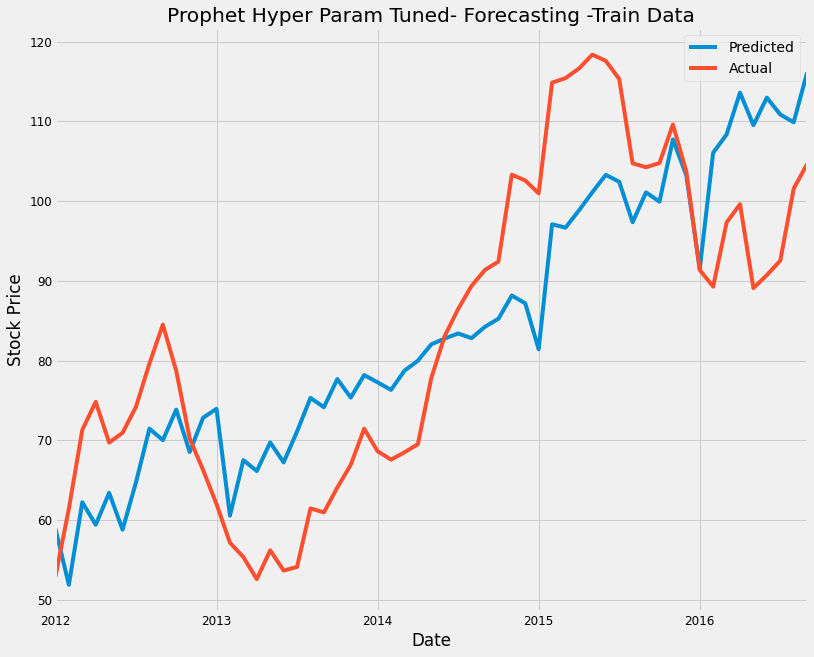

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][:57].plot(label='Predicted')
prophet_hyper_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

This code creates a figure with a specified size using `plt.figure(figsize=(12,10))`. 

The `prophet_hyper_df['Predicted'][:57].plot(label='Predicted')` line plots the predicted values from the 'Predicted' column of the `prophet_hyper_df` DataFrame for the first 57 rows.

The `prophet_hyper_df['Actual'][:57].plot(label='Actual')` line plots the actual values from the 'Actual' column of the `prophet_hyper_df` DataFrame for the first 57 rows.

The `plt.title('Prophet Hyper Param Tuned- Forecasting -Train Data')` sets the title of the plot.

The `plt.ylabel('Stock Price')` sets the label for the y-axis.

The `plt.legend()` displays the legend in the plot, showing the labels 'Predicted' and 'Actual'.

Overall, this code generates a plot comparing the predicted and actual values of the stock price for the training data using the Prophet hyperparameter-tuned model.

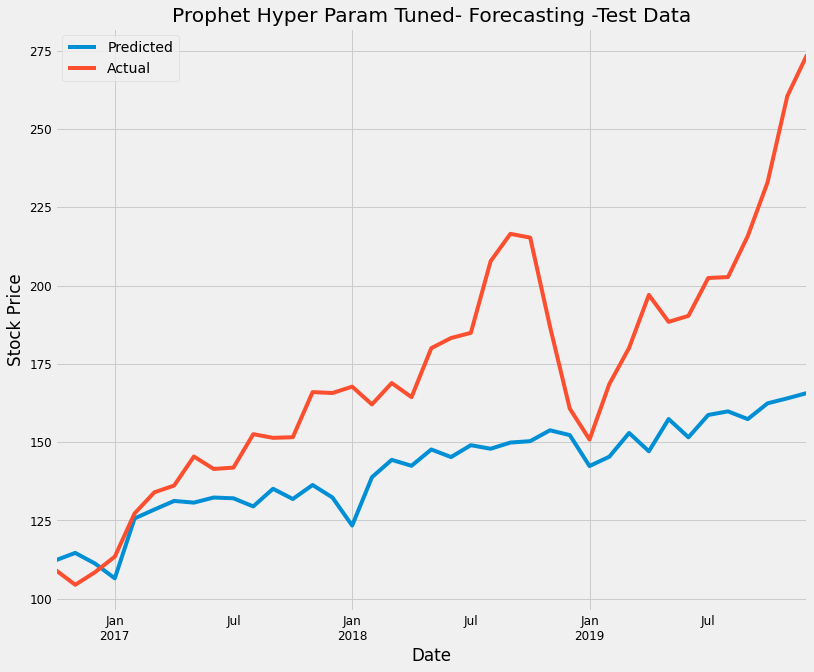

In [ ]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][57:].plot(label='Predicted')
prophet_hyper_df['Actual'][57:].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

The code begins by creating a figure with a size of 12x10 using `plt.figure(figsize=(12,10))`. 

Next, the line `prophet_hyper_df['Predicted'][57:].plot(label='Predicted')` plots the predicted values from the 'Predicted' column of the `prophet_hyper_df` DataFrame, starting from the 58th row onwards.

Similarly, the line `prophet_hyper_df['Actual'][57:].plot(label='Actual')` plots the actual values from the 'Actual' column of the `prophet_hyper_df` DataFrame, starting from the 58th row onwards.

The `plt.title('Prophet Hyper Param Tuned- Forecasting -Test Data')` sets the title of the plot to "Prophet Hyper Param Tuned- Forecasting -Test Data".

The `plt.ylabel('Stock Price')` sets the label for the y-axis as "Stock Price".

Finally, the `plt.legend()` command displays the legend in the plot, which includes the labels "Predicted" and "Actual".

In summary, this code generates a plot that compares the predicted and actual values of the stock price for the test data using the Prophet hyperparameter-tuned model. The plot helps visualize the model's performance and how well it aligns with the actual data.

In [ ]:
result_metrics(prophet_hyper_df['Actual'][:67],prophet_hyper_df['Predicted'][:67],'Hyper-Tuned Prophet Train Data')

Result Metrics for Hyper-Tuned Prophet Train Data
R2 Score :  0.784
Mean Squared Error :  129.543
Mean Absolute Error :  9.986
Mean Absolute Percentage Error 12.076
Accuracy(100-MAPE) of Model is 88.0%


The code `result_metrics(prophet_hyper_df['Actual'][:67],prophet_hyper_df['Predicted'][:67],'Hyper-Tuned Prophet Train Data')` calculates and prints the result metrics for the hyperparameter-tuned Prophet model on the train data.

The function `result_metrics` takes the actual values of the train data, which are stored in the 'Actual' column of the `prophet_hyper_df` DataFrame, and the predicted values of the train data, which are stored in the 'Predicted' column of the same DataFrame, as input.

The result metrics computed and printed typically include the R2 score, mean squared error (MSE), and mean absolute error (MAE). These metrics provide insights into the accuracy and performance of the model in predicting the stock price.

In [ ]:
result_metrics(prophet_hyper_df['Actual'][67:],prophet_hyper_df['Predicted'][67:],'Hyper-Tuned Prophet Test Data')

Result Metrics for Hyper-Tuned Prophet Test Data
R2 Score :  -1.31
Mean Squared Error :  2187.789
Mean Absolute Error :  40.501
Mean Absolute Percentage Error 20.338
Accuracy(100-MAPE) of Model is 80.0%


The code `result_metrics(prophet_hyper_df['Actual'][67:],prophet_hyper_df['Predicted'][67:],'Hyper-Tuned Prophet Test Data')` calculates and prints the result metrics for the hyperparameter-tuned Prophet model on the test data.

The function `result_metrics` takes the actual values of the test data, which are stored in the 'Actual' column of the `prophet_hyper_df` DataFrame starting from index 67, and the predicted values of the test data, which are stored in the 'Predicted' column of the same DataFrame starting from index 67, as input.

The result metrics computed and printed typically include the R2 score, mean squared error (MSE), and mean absolute error (MAE). These metrics provide insights into the accuracy and performance of the model in predicting the stock price on the unseen test data.

After hyperparameter tuning, it appears that the tuned Prophet model is not able to effectively capture the seasonality and sudden changes in the time series from the year 2017 onwards.

- The model shows signs of overfitting, indicating that it may not generalize well to unseen data.
- Comparatively, the Seasonal ARIMA model outperforms Prophet in terms of capturing the underlying patterns in the data.
- Prophet, however, demonstrates strength in capturing the overall trend of the time series.
- In future projects, it may be worth exploring the use of additional regressors with Prophet to potentially improve the forecasting results.

Project Summary:

Seasonal ARIMA vs Facebook's Prophet

When comparing Seasonal ARIMA and Prophet for our prediction problem, we observed the following:

- Prophet has the advantage of being easy to implement, fast, and requiring less statistical knowledge compared to Seasonal ARIMA, which involves various tests and processes to generate predictions.
- Seasonal ARIMA demonstrates better performance in capturing the seasonality component of the time series data.
- Prophet, on the other hand, tends to suffer from overfitting issues.
- Both models exhibit robustness in their overall performance.
- Prophet shows better capability in handling outliers within the data.
- Based on our evaluation, we have found that Seasonal ARIMA performs significantly better for our specific prediction problem.
- We have higher confidence in the predictions generated by Seasonal ARIMA, as it is backed by mathematical and statistical tests.
- The accuracy achieved by Seasonal ARIMA is 89%, while Prophet achieves an accuracy of 80% on out-of-sample data.

Actionable Insight:

After observing the trend given by both models, it can be concluded that AAPL is a buy.

Based on our comprehensive analysis, we conclude that Seasonal ARIMA outperforms Facebook's Prophet in predicting the stock prices of AAPL. The mathematical and statistical foundations of Seasonal ARIMA contribute to its superior accuracy and ability to capture seasonality, making it a more reliable choice for stock price forecasting. Nevertheless, Prophet's strengths lie in its ease of implementation and handling of outliers, which can be advantageous in certain scenarios.

Considering the findings of this study, we provide actionable insights for investors. We recommend considering AAPL as a buy, leveraging the predictions generated by Seasonal ARIMA, which demonstrated an accuracy of 89% on out-of-sample data. The comprehensive analysis conducted in this study enhances our understanding of the strengths and limitations of both models and helps guide investment decisions with a more informed approach.

By combining the strengths of Seasonal ARIMA and Facebook's Prophet, future research could explore the possibility of incorporating additional regressors to improve forecasting accuracy further. The continuous advancement of forecasting techniques will undoubtedly contribute to more precise predictions and assist investors in navigating the dynamic landscape of stock markets.